Results are copied to this google slide deck: https://docs.google.com/presentation/d/1RqWXr1TfcAjL9fJTaOIrohX2umt7S7TKKrbtAD4E5IA/edit?usp=sharing


In [1]:
# import things

import os
os.environ["OMP_NUM_THREADS"] = "8" 

import warnings
warnings.filterwarnings(action='once')

# os.environ['KMP_DUPLICATE_LIB_OK']='True'
# pwd = os.getcwd()
# os.chdir('/cosma/apps/durham/dc-lill1/lib/python3.12/site-packages/')
# print(os.getcwd())
import time
import pyEXP
# os.chdir(pwd)

# os.chdir('/Users/slill/Documents/Projects/exp-extreme-MWLMC/extreme-mwlmc/analysis/')

import itertools

print(os.getcwd())
print(pyEXP.util.getVersionInfo())

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm


import seaborn as sns   

plt.style.use('my_latex_standard2')

# sns.set_palette("husl", 10)
sns.set_palette(sns.husl_palette(10, h=.8))
cmap = sns.husl_palette(h=.8, as_cmap=True)

datadir = '/cosma8/data/dp309/dc-lill1/'
datadir_mssa = '/cosma8/data/dp309/dc-lill1/mssa/newG5/'

runtag = 'RunG5'
runtag2 = 'newG5'

/cosma/home/durham/dc-lill1/extreme-mwlmc/extreme-mwlmc/analysis
None

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%% This is EXP 7.7.99 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%% Repository URL | https://github.com/EXP-code/EXP                         %
%%%%% Current branch | main                                                    %
%%%%% Current commit | 03caf5efba7e5d6619d0a07a18aa508b20bb4661                %
%%%%% Compile time   | 2025-03-11 22:24:54 GMT                                 %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



In [2]:
# test compilation
if 0: 
  mwdconfig=f"""
  id         : cylinder
  parameters :
    acyl       : 0.029
    hcyl       : 0.004
    lmaxfid    : 72
    mmax       : 6
    nmaxfid    : 32
    nmax       : 20
    ncylodd    : 8
    ncylnx     : 512
    ncylny     : 256
    rcylmin    : 0.001
    rcylmax    : 100.0
    cachename  : {datadir}/MWeofcachenewCLONE
  """

  disc_basis = pyEXP.basis.Basis.factory(mwdconfig)

  xmin,xmax,nx = 0.1,0.95,5
  ymin,ymax,ny = 0.2,0.95,4
  dx,dy = (xmax-xmin)/nx,(ymax-ymin)/ny

  xmin,xmax,numr = 0.,.2,129
  zmin,zmax,numz = -0.1,.1,65 # pick odd numbers to get a midplane evaluation
  rr,zz = np.meshgrid(np.linspace(xmin,xmax,numr),np.linspace(zmin,zmax,numz))
  B = disc_basis.getBasis(xmin=xmin,xmax=xmax,numr=numr,zmin=zmin,zmax=zmax,numz=numz)

  fig1 = plt.figure(figsize=(8,8))

  for inx in range(0,nx):
      for iny in range(0,ny):
          ax = fig1.add_axes([xmin+inx*dx,ymin+iny*dy,dx,dy])
          ax.contourf(rr,zz,B[1][ny*inx + iny]['potential'].T,64,cmap=cm.coolwarm)
          ax.text(0.0,0.0,'n={}'.format(ny*inx + iny),fontsize=14,color='white',horizontalalignment='left',verticalalignment='center')

  plt.show()

  # cfile = '/Users/mpetersen/Notebooks/Dynamics/extreme-mwlmc/models/tursa/MWLMC/outcoef.mwdisk.RunG5'
  cfile = f'{datadir}/outcoef.mwdisk.{runtag}'
  disccoefs = pyEXP.coefs.Coefs.factory(cfile)
  times = disccoefs.Times()


  # set up the grid choices
  size = 12.
  size = 0.1
  npix = 128

  # in-plane tests
  pmin  = [-size, 0.0, -size/10]
  pmax  = [ size, 0.0, size/10]

  # grid samples (sliced because last index is 0)
  grid  = [ npix,  0, npix]

  indx = 0
  times = [disccoefs.Times()[1100]]
  print(times)
  fields = pyEXP.field.FieldGenerator(times, pmin, pmax, grid)
  surfaces = fields.slices(disc_basis, disccoefs)

  # Get the shape
  keys = list(surfaces.keys())
  nx = surfaces[keys[0]]['dens'].shape[0]
  ny = surfaces[keys[0]]['dens'].shape[1]

  # Make the mesh
  x = np.linspace(pmin[0], pmax[0], nx)
  y = np.linspace(pmin[2], pmax[2], ny)
  xv, yv = np.meshgrid(x, y)

  v = keys[0]
  mapvals = surfaces[v]['dens m>0']#/surfaces0[v0]['dens m=0']
  prefactor = np.nanmax(np.abs(mapvals))

  mapvals/=prefactor
  mapvals[mapvals>1.] = 1.
  mapvals[mapvals<-1.] = -1.

  #plt.contourf(xv, yv, mapvals/prefactor,np.linspace(-cmax,cmax,nc),cmap=cm.coolwarm)
  plt.contourf(300*xv, 300*yv, mapvals.T,np.linspace(-1.,1.,64),cmap=cm.coolwarm)
  plt.xlabel('x (kpc)')
  plt.ylabel('z (kpc)')

In [3]:
! ls -lH /cosma8/data/dp309/dc-lill1/

/cosma/local/Python/3.12.4/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=3272389) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


total 2848658
-rw-r--r--  1 dc-lill1 durham    8979875 Nov  7 20:27 lmcdisc.orient.RunG5
-rw-r--r--  1 dc-lill1 durham  548765536 Mar  7  2024 LMCeofcache
-rw-r--r--  1 dc-lill1 durham  276428488 Nov  7 14:27 LMCeofcachenew
-rw-r--r--  1 dc-lill1 durham    8979875 Nov  7 20:27 lmchalo.orient.RunG5
drwxr-sr-x 10 dc-lill1 dp309       12288 Nov  8 11:26 mssa
-rw-r--r--  1 dc-lill1 durham    8979875 Nov  7 20:27 mwdisc.orient.RunG5
-rw-r--r--  1 dc-lill1 durham  379917440 Mar  7  2024 MWeofcache
-rw-r--r--  1 dc-lill1 durham 1097512648 Nov  7 14:32 MWeofcachenew
-rw-r--r--  1 dc-lill1 durham 1097512648 Mar 11 13:17 MWeofcachenewCLONE
-rw-r--r--  1 dc-lill1 durham    8979875 Nov  7 20:27 mwhalo.orient.RunG5
-rw-rw-r--  1 dc-lill1 durham    7792984 Nov  7 20:27 outcoef.lmcdisk.RunG5
-rw-rw-r--  1 dc-lill1 durham     610152 Mar 26  2024 outcoef.lmcdisk.RunG5t
-rw-rw-r--  1 dc-lill1 durham    7052296 Jan  9  2024 outcoef.lmcdisk.RunGG
-rw-rw-r--  1 dc-lill1 durham    7052296 Mar 26  2024 outco

In [4]:
virialradius=122.0
virialvelocity=119.
massscale = virialvelocity**2 * virialradius / 0.0000043009125  
timescale = virialradius/virialvelocity


In [5]:
# MW halo coefs
mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
mwhalo_keylst = mwhalo_coefs.makeKeys([])


# MW disc coefs
mwdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwdisk.{runtag}')
mwdisc_keylst = mwdisc_coefs.makeKeys([])

# LMC halo coefs
lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}')
lmchalo_coefs2 = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}')
lmchalo_keylst = lmchalo_coefs.makeKeys([])

# LMC disc coefs
# lmcdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmc.{runtag1}')
lmcdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmcdisk.{runtag}')
lmcdisc_keylst = lmcdisc_coefs.makeKeys([])


In [6]:
### MW halo
print("config MW halo")
mwhconfig = """
---
id: sphereSL
parameters :
  numr     : 2000
  rmin     : 0.00001
  rmax     : 2.0
  Lmax     : 6
  nmax     : 20
  rmapping : 0.0667
  modelname : Einasto_rs0.07_rhos24.913_alpha0.16_rtrunc20.txt
  cachename : EinastoR20
"""

mwhruntag = f'mwhalo.{runtag}'
mwhbasis = pyEXP.basis.Basis.factory(mwhconfig)


config MW halo
---- SLGridSph::ReadH5Cache: successfully read basis cache <EinastoR20>
---- Spherical::orthoTest: worst=0.000763606


In [7]:
### LMC halo
print("config LMC halo")
lmchconfig = """
---
id: sphereSL
parameters :
  numr     : 2000
  rmin     : 0.00001
  rmax     : 2.0
  Lmax     : 6
  nmax     : 20
  rmapping : 0.0667
  modelname : ./Einasto_rs0.035_rhos24.682_alpha0.16_rtrunc33.txt
  cachename : EinastoR33
"""

lmchruntag = f'lmchalo.{runtag}'
lmchbasis = pyEXP.basis.Basis.factory(lmchconfig)

config LMC halo
---- SLGridSph::ReadH5Cache: successfully read basis cache <EinastoR33>
---- Spherical::orthoTest: worst=0.00125842


In [8]:
fname = f'{datadir}/MWeofcachenewCLONE'
print(fname)

print(f'MWeofcachenew path works? {os.path.isfile(fname)}')

fname2 = f'{datadir}/LMCeofcachenew'
print(fname2)
print(f'LMCeofcachenew path works? {os.path.isfile(fname2)}')

/cosma8/data/dp309/dc-lill1//MWeofcachenewCLONE
MWeofcachenew path works? True
/cosma8/data/dp309/dc-lill1//LMCeofcachenew
LMCeofcachenew path works? True


In [9]:
### LMC disc
print("config LMC Disc")

lmcdconfig=f"""
id         : cylinder
parameters :
    acyl       : 0.014
    hcyl       : 0.003
    lmaxfid    : 72
    mmax       : 6
    nmaxfid    : 32
    nmax       : 20
    ncylodd    : 8
    ncylnx     : 256
    ncylny     : 128
    rcylmin    : 0.001
    rcylmax    : 200.0
    cachename  : {datadir}/LMCeofcachenew
"""


# lmcdruntag = f'lmcdisk.{runtag}'
lmcdbasis = pyEXP.basis.Basis.factory(lmcdconfig)




config LMC Disc
---- EmpCylSL::ReadH5Cache: read </cosma8/data/dp309/dc-lill1//LMCeofcachenew>
---- EmpCylSL::read_cache: table forwarded to all processes
---- Cylindrical::orthoTest: worst=0.000251818


In [10]:
### MW disc
print("config MW disc")

mwdconfig=f"""
id         : cylinder
parameters :
  acyl       : 0.029
  hcyl       : 0.004
  lmaxfid    : 72
  mmax       : 6
  nmaxfid    : 32
  nmax       : 20
  ncylodd    : 8
  ncylnx     : 512
  ncylny     : 256
  rcylmin    : 0.001
  rcylmax    : 100.0
  cachename  : {datadir}/MWeofcachenewCLONE
"""
# disc_basis = pyEXP.basis.Basis.factory(mwdconfig)
mwdbasis = pyEXP.basis.Basis.factory(mwdconfig)
# mwdbasis = pyEXP.basis.Basis.factory(mwdconfig)

config MW disc
---- EmpCylSL::ReadH5Cache: read </cosma8/data/dp309/dc-lill1//MWeofcachenewCLONE>
---- EmpCylSL::read_cache: table forwarded to all processes
---- Cylindrical::orthoTest: worst=0.000145592


In [15]:
# mwdbasis = pyEXP.basis.Basis.factory(mwdconfig)


In [16]:
# times_vir = mwdisc_coefs.Times()
# indx = 0
# fields_xz = pyEXP.field.FieldGenerator(times_vir[indx:indx+1], [-20./virialradius,0./virialradius,-2./virialradius], [20./virialradius,0./virialradius,2./virialradius], [32,0,32]) 
# # fields_xz.setColumnHeight(0.1/virialradius)
# # fields_xz.setMidplane(16.0/virialradius)
# slice = fields_xz.slices(lmcdbasis, lmcdisc_coefs)[times_vir[indx]][ 'dens']

# plt.imshow(slice, cmap=sns.diverging_palette(145, 345, s=60, as_cmap=True))
# plt.show()

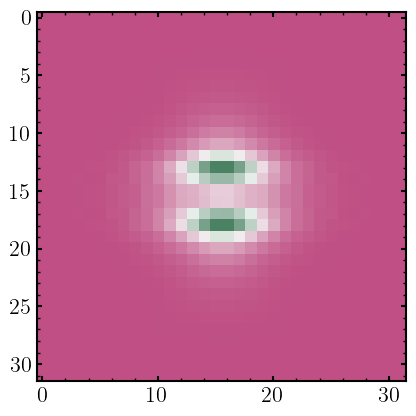

In [11]:
times_vir = mwdisc_coefs.Times()
indx = 0
fields_xz = pyEXP.field.FieldGenerator(times_vir[indx:indx+1], [-20./virialradius,0./virialradius,-2./virialradius], [20./virialradius,0./virialradius,2./virialradius], [32,0,32]) 
# fields_xz.setColumnHeight(0.1/virialradius)
# fields_xz.setMidplane(16.0/virialradius)
slice = fields_xz.slices(mwdbasis, mwdisc_coefs)[times_vir[indx]][ 'dens']

plt.imshow(slice, cmap=sns.diverging_palette(145, 345, s=60, as_cmap=True))
plt.show()

In [12]:
# times_vir = lmcdisc_coefs.Times()
# fields_xz = pyEXP.field.FieldGenerator(times_vir[1000:1001], [-20./virialradius,-20./virialradius,-2./virialradius], [20./virialradius,20./virialradius,2./virialradius], [32,32,32]) 
# # fields_xz.setColumnHeight(0.1/virialradius)
# # fields_xz.setMidplane(16.0/virialradius)
# vols = fields_xz.volumes(mwdbasis, mwdisc_coefs)[times_vir[1000]][ 'dens']
# for i, vol in enumerate(vols):
#     print(i)
#     if np.abs(np.sum(vol))>0.:
#         plt.imshow(vol, cmap=sns.diverging_palette(145, 345, s=60, as_cmap=True), norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=np.min(vols), vmax=np.max(vols)))
#         plt.title(f'{i} out of {len(vols)}')
#         plt.show()


In [13]:
def read_orient(infile):
    O = np.genfromtxt(infile,skip_header=3)
    t = O[:,0]
    x = O[:,15]
    y = O[:,16]
    z = O[:,17]
    r = np.linalg.norm([x,y,z],axis=0)
    if "disk" in infile or "disc" in infile:
        xangle = O[:,6]
        yangle = O[:,7]
        zangle = O[:,8]
        phi = np.arctan2(yangle,xangle)
        theta = -np.arccos(zangle/np.sqrt(xangle**2 + yangle**2 + zangle**2))
        psi = 0.0
        return {
            't': t, 
            'x': x, 
            'y': y, 
            'z': z, 
            'r': r,
            'xangle': xangle, 
            'yangle': yangle, 
            'zangle': zangle, 
            'phi': phi, 
            'theta': theta, 
            'psi': psi
        }
    else:
        return {'t': t, 'x': x, 'y': y, 'z': z, 'r': r} 

mwhcenter = read_orient(f'{datadir}mwhalo.orient.{runtag}')
lmchcenter = read_orient(f'{datadir}lmchalo.orient.{runtag}')
mwdcenter = read_orient(f'{datadir}mwdisc.orient.{runtag}')
lmcdcenter = read_orient(f'{datadir}lmcdisc.orient.{runtag}')

lmccenter_corr = {'x': lmcdcenter['x']-mwdcenter['x'], 
                  'y': lmcdcenter['y']-mwdcenter['y'], 
                  'z': lmcdcenter['z']-mwdcenter['z'], 
                  'r': np.linalg.norm([lmcdcenter['x']-mwdcenter['x'],
                                       lmcdcenter['y']-mwdcenter['y'],
                                       lmcdcenter['z']-mwdcenter['z']],
                                      axis=0)
                  }

16310
1.7183
5.30558114 -39.277473 -35.118249


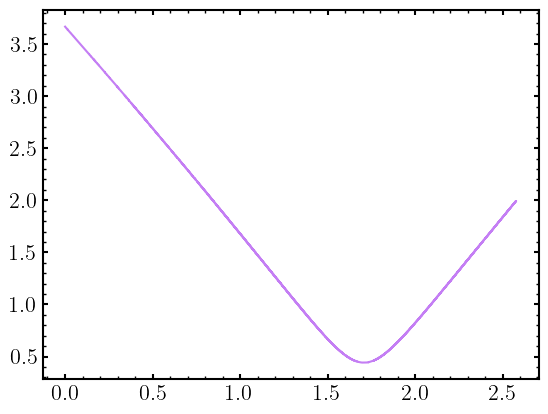

In [14]:
plt.plot(lmcdcenter['t'],lmcdcenter['r'],label='MW Halo')
print(np.argmin(lmcdcenter['r']-mwdcenter['r']))
print(lmcdcenter['t'][np.argmin(lmcdcenter['r']-mwdcenter['r'])])
itref = np.argmin(lmcdcenter['r']-mwdcenter['r'])
# itref = np.where(lmcdcenter['t']>=1.7)[0][0]
tref = lmcdcenter['t'][np.argmin(lmcdcenter['r']-mwdcenter['r'])]
print((lmcdcenter['x'][itref]-mwdcenter['x'][itref])*virialradius, 
      (lmcdcenter['y'][itref]-mwdcenter['y'][itref])*virialradius, 
      (lmcdcenter['z'][itref]-mwdcenter['z'][itref])*virialradius)

# print((lmcdcenter['x'][16300:16350]-mwdcenter['x'][16300:16350])*virialradius, 
#       (lmcdcenter['y'][16300:16350]-mwdcenter['y'][16300:16350])*virialradius, 
#       (lmcdcenter['z'][16300:16350]-mwdcenter['z'][16300:16350])*virialradius)

# Different order combinations

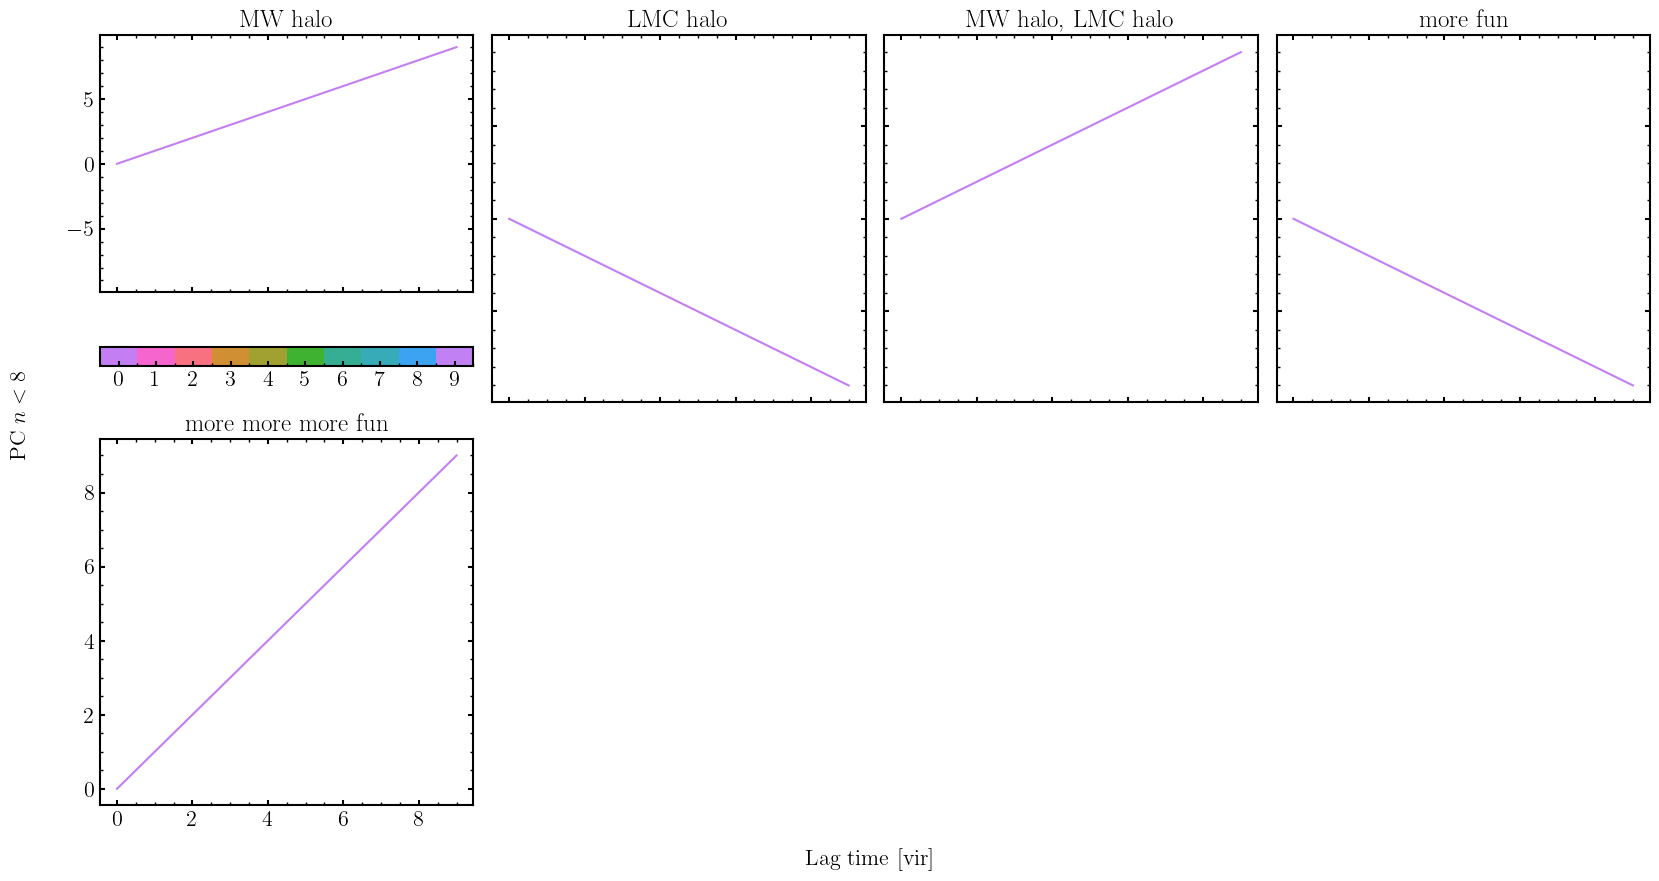

In [15]:
### testing the plot setup 

gal_combs = [['MW halo'], ['LMC halo'], ['MW halo', 'LMC halo'], ['more fun'], ['more more more fun']]
num_axes = len(gal_combs)
num_rows = int(np.ceil(num_axes/4))
num_cols = min(num_axes, 4)

figsize = (num_cols*5, num_rows*5)
fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
ax = np.array(axes).flatten()

for i, gals in enumerate(gal_combs):
    
    
    ax[i].plot((-1)**i * np.arange(10))
    ax[i].set_title(', '.join(gals))
    
if num_rows%2:
    ax[int(np.floor(num_rows/2))].set_ylabel(rf'PC $n<8$')
else:
    fig.text(0.08, 0.5, rf'PC $n<8$', va='center', rotation='vertical')

if num_cols%2:
    ax[int(np.floor(num_cols/2))].set_xlabel('Lag time [vir]')
else:
    fig.text(0.51, 0.05, 'Lag time [vir]', ha='center')
    
for j in range(i+1, len(ax)):
    ax[j].axis('off')
    
norm = colors.BoundaryNorm(np.arange(-0.5, 10.5), cmap.N)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax[0], orientation='horizontal')

tick_locs = np.arange(10)
cbar.set_ticks(tick_locs)

## mSSA to do list

### Combinations
 - **Components**: MW disc, MW halo, MW disc + halo, LMC halo, MW + LMC halo, MW disc + halo + LMC halo
 - **Harmonics**: 0, 1, 2, [1,2], [0,1,2], evens ([2,4,6]), odds ([1,3,5])
 - **Time windows**: Pericentre, full simulation
 - **norders**: [0:8], [0:8] disc + [6:14] halo, all disc [0:20] (with [0:8] halo), antisymmetric disc [12:20] (with [6:14] halo) 
 - **detrending**: totPow, totVar
 - **simulations**: bar simulation, non-bar simulation

### Pipeline
 - Save ssaState
 - Match PCs with each other: group PCs; matching PCs group-by-group across mssa combinations; looking + reconstructions in all 3 components
 - Reconstruction movie: xy + yz for all components for each PC

In [16]:
# testing implementations
if 0:
    order_mwd = [1]
    max_r_order = 20
    min_r_order = 12


    mwd_keys = [x for xs in [mwdisc_coefs.makeKeys([i]) for i in order_mwd] for x in xs]
    # mwd_key_mask = [np.where(np.array(mwd_keys)[:,1]>=min_r_order)]
    mwd_key_mask =  [np.where(
        (np.array(mwd_keys)[:,1]<max_r_order) *
        (np.array(mwd_keys)[:,1]>=min_r_order)
        )]
    mwd_keys2 = np.array(mwd_keys)[mwd_key_mask].tolist()[0][0]
    print(mwd_keys2)

    order_mwh = [1]
    max_r_order_mwh=14 
    min_r_order_mwh=6

    mwh_keys = [x for xs in [mwhalo_coefs.makeKeys([i]) for i in order_mwh] for x in xs]
    print(mwh_keys)
    mwh_key_mask =  [np.where(
        (np.array(mwh_keys)[:,2]<max_r_order_mwh) *
        (np.array(mwh_keys)[:,2]>=min_r_order_mwh)
        )]
    mwh_keys2 = np.array(mwh_keys)[mwh_key_mask].tolist()[0][0]
    print(mwh_keys2)

    def test(x, a = 10, b=4):
        return x+a+b

    test_dict = {'a':2}

    test(2, **test_dict)

In [18]:
def make_order_keys(order_mwh, order_lmch, order_mwd, order_lmcd, 
                    max_r_order_mwh=20, min_r_order_mwh=0, 
                    max_r_order_lmch=20, min_r_order_lmch=0,
                    max_r_order_mwd=20, min_r_order_mwd=0,
                    max_r_order_lmcd=20, min_r_order_lmcd=0):
        
    mwh_keys = [x for xs in [mwhalo_coefs.makeKeys([i]) for i in order_mwh] for x in xs]
    mwh_key_mask =  [np.where(
        (np.array(mwh_keys)[:,2]<max_r_order_mwh) *
        (np.array(mwh_keys)[:,2]>=min_r_order_mwh)
        )]    
    mwh_keys = np.array(mwh_keys)[mwh_key_mask].tolist()[0][0]
    
    lmch_keys = [x for xs in [lmchalo_coefs.makeKeys([i]) for i in order_lmch] for x in xs]
    lmch_key_mask =  [np.where(np.array(lmch_keys)[:,2]<max_r_order)]
    lmch_key_mask =  [np.where(
        (np.array(lmch_keys)[:,2]<max_r_order_lmch) *
        (np.array(lmch_keys)[:,2]>=min_r_order_lmch)
        )]
    lmch_keys = np.array(lmch_keys)[lmch_key_mask].tolist()[0][0]
    
    mwd_keys = [x for xs in [mwdisc_coefs.makeKeys([i]) for i in order_mwd] for x in xs]
    mwd_key_mask =  [np.where(
        (np.array(mwd_keys)[:,1]<max_r_order_mwd) *
        (np.array(mwd_keys)[:,1]>=min_r_order_mwd)
        )]
    mwd_keys = np.array(mwd_keys)[mwd_key_mask].tolist()[0][0]
    
    lmcd_keys = [x for xs in [lmcdisc_coefs.makeKeys([i]) for i in order_lmcd] for x in xs]
    lmcd_key_mask =  [np.where(
        (np.array(lmcd_keys)[:,1]<max_r_order_lmcd) *
        (np.array(lmcd_keys)[:,1]>=min_r_order_lmcd)
        )]
    lmcd_keys = np.array(lmcd_keys)[lmcd_key_mask].tolist()[0][0]
    
    return mwh_keys, lmch_keys, mwd_keys, lmcd_keys

flag1 =""" 
---
totPow: true
totVar: false
BDCSVD: true
Sign: false
...
"""

flag2 =""" 
---
totPow: false
totVar: true
BDCSVD: true
Sign: false
...
"""


gal_combs = [['MW halo'], ['MW disc'], 
             ['MW halo', 'MW disc'], ['LMC halo'], 
             ['MW halo', 'LMC halo'], 
             ['MW halo', 'MW disc', 'LMC halo']]
orders = [[0], [1], [2], [1,2], [0,1,2], [2,4,6], [1,3,5]] 
full_sim = [False, True]
norders = [
    {'max_r_order_mwh': 8, 'max_r_order_lmch': 8, 
     'max_r_order_mwd': 8, 'max_r_order_lmcd': 8}, 
    {'max_r_order_mwd': 8, 'max_r_order_lmcd': 8, 
     'max_r_order_mwh': 14, 'max_r_order_lmch': 14, 
     'min_r_order_mwh': 6, 'min_r_order_lmch': 6},    
    {'max_r_order_mwh': 8, 'max_r_order_lmch': 8},
    {'min_r_order_mwd': 12, 'min_r_order_lmcd': 12, 
     'max_r_order_mwh': 14, 'max_r_order_lmch': 14, 
     'min_r_order_mwh': 6, 'min_r_order_lmch': 6}
]
flags = [flag1, flag2]

n_combs = len(gal_combs) * len(orders) * len(full_sim) * len(norders) * len(flags)
# combinations = itertools.product(gal_combs, orders, full_sim, norders, flags)
combinations = itertools.product(orders, norders, full_sim, flags)

print(f'There are {n_combs} different combinations for one simulation!')

# print(list(combinations))




There are 672 different combinations for one simulation!


In [ ]:
size = 25./virialradius
size_z = 2.5/virialradius
npix = 64

pmin_xy  = [-size, -size,  0.]
pmax_xy  = [size, size, 0.]
grid_xy  = [npix,  npix,  0]

pmin_xz  = [0., -size,   -size_z]
pmax_xz  = [0., size,  size_z]
grid_xz  = [0, npix,   npix]
vmin, vmax = [-1503030.0, 1503030.0]

times_vir_all = mwhalo_coefs.Times()
itref_vir = np.where(times_vir_all>=tref)[0][0]
tref_vir = times_vir_all[np.where(times_vir_all>=tref)[0][0]]
itref = np.where(lmchcenter['t'] >= tref)[0][0]


for order, flag, simtimeflag, norder in enumerate(combinations):
    print(f'Step {i} of {len(combinations)}')
    order_dict = {'MW halo': order, 'LMC halo': order, 'MW disc': order, 'LMC disc': order}

    if simtimeflag: 
        times_vir = times_vir_all
        xlabelextra = 'full simulation'
    else:
        times_vir = times_vir_all[:itref_vir]
        xlabelextra = 'until pericentre'

    times_phys = timescale * (np.array(times_vir)-tref)
    
    window = int(len(times_vir)/2)
    npc = 100 
    
    num_axes = len(gal_combs)
    num_rows = int(np.ceil(num_axes/4))
    num_cols = min(num_axes, 4)

    figsize = (num_cols*5, num_rows*5)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
    ax = np.array(axes).flatten()

    for j, gals in enumerate(gal_combs):
        print(gals)
        mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
        mwdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwdisk.{runtag}')
        lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
        lmcdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmcdisk.{runtag}')
        
        # set up a dummy structure to fill with coefs
        mwhC = pyEXP.coefs.SphCoefs(False)
        lmchC = pyEXP.coefs.SphCoefs(False)
        mwdC = pyEXP.coefs.CylCoefs(False)
        lmcdC = pyEXP.coefs.CylCoefs(False)
        
        for tindx,t in enumerate(times_vir):
            mwhA = mwhalo_coefs.getCoefStruct(t)
            lmchA = lmchalo_coefs.getCoefStruct(t)
            mwdA = mwdisc_coefs.getCoefStruct(t)
            lmcdA = lmcdisc_coefs.getCoefStruct(t)
                    
            mwhC.add(mwhA)
            lmchC.add(lmchA)
            mwdC.add(mwdA)
            lmcdC.add(lmcdA)
    
        gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                    'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr],
                    'MW disc': [mwdisc_coefs, mwdbasis, mwdcenter],
                    # 'LMC disc': [lmcdisccoefs, lmcdbasis, lmcdcenter]
                    }

        
        mwh_keys, lmch_keys, mwd_keys, lmcd_keys = make_order_keys(order, order, order, order, **norder)

        config = {
            "MW halo": (mwhC, mwh_keys, []),
            "LMC halo": (lmchC, lmch_keys, []),
            "MW disc": (mwdC, mwd_keys, []),
            "LMC disc": (lmcdC, lmcd_keys, [])
                } 

672

1.7184
16310
1074
537
['MW halo']
{'MW halo': (<pyEXP.coefs.SphCoefs object at 0x14feb02ed970>, [[1, 0, 0], [1, 0, 1], [1, 0, 2], [1, 0, 3], [1, 0, 4], [1, 0, 5], [1, 0, 6], [1, 0, 7], [1, 1, 0], [1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 1, 5], [1, 1, 6], [1, 1, 7]], [])}
---- Eigen is using 8 threads
shape U = 12888 x 538
shape Y = 538 x 12888
['MW disc']
{'MW disc': (<pyEXP.coefs.CylCoefs object at 0x14fea2a7b6b0>, [[1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7]], [])}
shape U = 8592 x 538
shape Y = 538 x 8592
['MW halo', 'MW disc']
{'MW halo': (<pyEXP.coefs.SphCoefs object at 0x14fea2a7b670>, [[1, 0, 0], [1, 0, 1], [1, 0, 2], [1, 0, 3], [1, 0, 4], [1, 0, 5], [1, 0, 6], [1, 0, 7], [1, 1, 0], [1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 1, 5], [1, 1, 6], [1, 1, 7]], []), 'MW disc': (<pyEXP.coefs.CylCoefs object at 0x14fea2a86fb0>, [[1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7]], [])}
shape U = 21480 x 538
shape Y = 538 x 21480
['MW halo', 'MW 

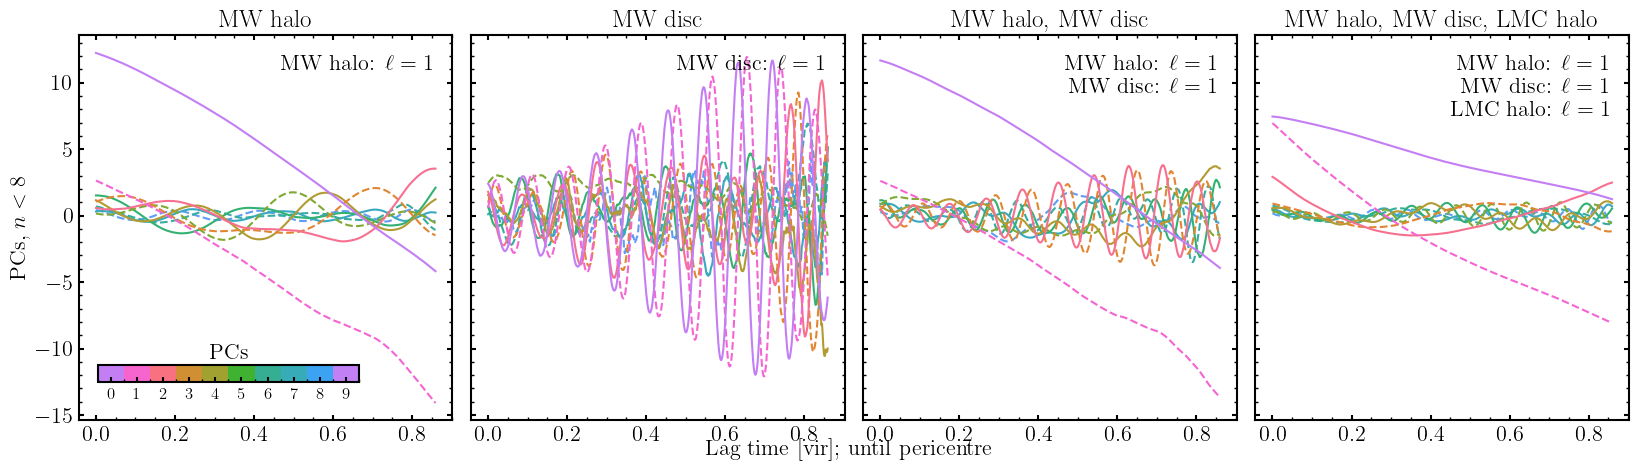

In [ ]:
max_r_order = 8

plt.ion()

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
# verbose: false
Sign: false

...
"""

# 20 and 64 for disc, 150 and 128 for haloes
# size = 150./virialradius
# npix = 128
size = 25./virialradius
size_z = 2.5/virialradius
npix = 64

full_sim = 0


pmin_xy  = [-size, -size,  0.]
pmax_xy  = [size, size, 0.]
grid_xy  = [npix,  npix,  0]

pmin_xz  = [0., -size,   -size_z]
pmax_xz  = [0., size,  size_z]
grid_xz  = [0, npix,   npix]
vmin, vmax = [-1503030.0, 1503030.0]
# vmin, vmax = [None, None]

times_vir_all = mwhalo_coefs.Times()
itref_vir = np.where(times_vir_all>=tref)[0][0]
tref_vir = times_vir_all[np.where(times_vir_all>=tref)[0][0]]

if full_sim: 
    times_vir = times_vir_all
    xlabelextra = 'full simulation'
else:
    times_vir = times_vir_all[:itref_vir]
    xlabelextra = 'until pericentre'

times_phys = timescale * (np.array(times_vir)-tref)

itref = np.where(lmchcenter['t'] >= tref)[0][0]
print(tref_vir)
print(itref)
print(len(times_vir))

window = int(len(times_vir)/2)
print(window)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length



# gal_combs = [['MW halo'], ['LMC halo'], ['MW halo', 'LMC halo']]
gal_combs = [['MW halo'], ['MW disc'], ['MW halo', 'MW disc'], ['MW halo', 'MW disc', 'LMC halo']]
# gal_combs = [['LMC halo'], ['LMC disc'], ['LMC halo', 'LMC disc']]
# gal_combs = [['MW halo'], ['LMC halo'], ['MW disc'], ['LMC disc'], 
#              ['MW halo', 'LMC halo'], ['MW halo', 'MW disc'], ['LMC halo', 'LMC disc'], 
#              ['MW halo', 'LMC halo', 'MW disc', 'LMC disc']]
             
orders = [[0], [1], [2]] 
order = [0]
order_mwd = [1]
order_lmcd = [1]
order_mwh = [1]
order_lmch = [1]

order_dict = {'MW halo': order_mwh, 'LMC halo': order_lmch, 'MW disc': order_mwd, 'LMC disc': order_lmcd}
def make_order_keys():
        
    mwh_keys = [x for xs in [mwhalo_coefs.makeKeys([i]) for i in order_mwh] for x in xs]
    mwh_key_mask =  [np.where(np.array(mwh_keys)[:,2]<max_r_order)]
    mwh_keys = np.array(mwh_keys)[mwh_key_mask].tolist()[0][0]
    
    lmch_keys = [x for xs in [lmchalo_coefs.makeKeys([i]) for i in order_lmch] for x in xs]
    lmch_key_mask =  [np.where(np.array(lmch_keys)[:,2]<max_r_order)]
    lmch_keys = np.array(lmch_keys)[lmch_key_mask].tolist()[0][0]
    
    mwd_keys = [x for xs in [mwdisc_coefs.makeKeys([i]) for i in order_mwd] for x in xs]
    mwd_key_mask =  [np.where(np.array(mwd_keys)[:,1]<max_r_order)]
    mwd_keys = np.array(mwd_keys)[mwd_key_mask].tolist()[0][0]
    
    lmcd_keys = [x for xs in [lmcdisc_coefs.makeKeys([i]) for i in order_lmcd] for x in xs]
    lmcd_key_mask =  [np.where(np.array(lmcd_keys)[:,1]<max_r_order)]
    lmcd_keys = np.array(lmcd_keys)[lmcd_key_mask].tolist()[0][0]
    
    return mwh_keys, lmch_keys, mwd_keys, lmcd_keys

num_axes = len(gal_combs)
num_rows = int(np.ceil(num_axes/4))
num_cols = min(num_axes, 4)

figsize = (num_cols*5, num_rows*5)
fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
ax = np.array(axes).flatten()

# startTime = time.time()
for j, gals in enumerate(gal_combs):
    print(gals)
    mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
    mwdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwdisk.{runtag}')
    lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
    lmcdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmcdisk.{runtag}')
    
    # set up a dummy structure to fill with coefs
    mwhC = pyEXP.coefs.SphCoefs(False)
    lmchC = pyEXP.coefs.SphCoefs(False)
    mwdC = pyEXP.coefs.CylCoefs(False)
    lmcdC = pyEXP.coefs.CylCoefs(False)
    
    for tindx,t in enumerate(times_vir):
        mwhA = mwhalo_coefs.getCoefStruct(t)
        lmchA = lmchalo_coefs.getCoefStruct(t)
        mwdA = mwdisc_coefs.getCoefStruct(t)
        lmcdA = lmcdisc_coefs.getCoefStruct(t)
                
        mwhC.add(mwhA)
        lmchC.add(lmchA)
        mwdC.add(mwdA)
        lmcdC.add(lmcdA)
    
    
    

    gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr],
                'MW disc': [mwdisc_coefs, mwdbasis, mwdcenter],
                # 'LMC disc': [lmcdisccoefs, lmcdbasis, lmcdcenter]
                }

    
    mwh_keys, lmch_keys, mwd_keys, lmcd_keys = make_order_keys()

    config = {
        "MW halo": (mwhC, mwh_keys, []),
        "LMC halo": (lmchC, lmch_keys, []),
        "MW disc": (mwdC, mwd_keys, []),
        "LMC disc": (lmcdC, lmcd_keys, [])
            } 

    subconfig = {key: config[key] for key in gals}
    print(subconfig)
    # startTime = time.time()
    ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
    ev = ssa.eigenvalues() # do the decomposition (expensive step)
    pc = ssa.getPC() # also triggers the expensive step

    # print(pc.shape)
    # # reconstruct here
    # ssa.reconstruct([*range(npc)])
    
    # plot reconstruction density of MW disc 
    if 1:
        if gals == ['MW halo', 'MW disc', 'LMC halo']:
            # do reconstruction
            ssa.reconstruct([0,1,2])
            reconstruct = ssa.getReconstructed()['MW disc']
            reconstruct.zerodata()
            print('zero out dipole too?', np.sum(reconstruct.getAllCoefs()[1]))
            ssa.getReconstructed()['MW disc']
            mwdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwdisk.{runtag}')

            # get fields in xy and xz planes
            fields_xz = pyEXP.field.FieldGenerator(times_vir, pmin_xz, pmax_xz, grid_xz)    
            # surfaces_xz = fields_xz.slices(mwhbasis, reconstruct)
            surfaces_xz = fields_xz.slices(mwdbasis, reconstruct)
            
            # surfaces_xz = fields_xz.slices(mwdbasis, mwdisc_coefs)
             
            fields_xy = pyEXP.field.FieldGenerator(times_vir, pmin_xy, pmax_xy, grid_xy)    
            # surfaces_xy = fields_xy.slices(mwhbasis, reconstruct)
            surfaces_xy = fields_xy.slices(mwdbasis, reconstruct)
            # surfaces_xy = fields_xy.slices(mwdbasis, mwdisc_coefs)
            

                    
                    
                    
            # # make lmc field if necessary, needs to be shifted by LMC center
            # if gal == 'LMC halo':
                
            #     center_tmp = np.array([center['x'][tmask], center['y'][tmask], center['z'][tmask]])
            #     pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
            #     pmax_tmp  = [0.0, float(size-center_tmp[1]), float(size-center_tmp[2])]
            #     # print(center_tmp*virialradius)
            #     fields = pyEXP.field.FieldGenerator([t], pmin_tmp, pmax_tmp, grid)
            #     surfaces = fields.slices(basis, reconstruct)

            keys = list(surfaces_xy.keys())

            # if l == 0:
                # print('l=0')
            nx = surfaces_xy[keys[0]]['dens'].shape[0]
            ny = surfaces_xy[keys[0]]['dens'].shape[1]            
            # Make the mesh
            x = np.linspace(pmin_xy[0], pmax_xy[0], nx)
            y = np.linspace(pmin_xy[1], pmax_xy[1], ny)
            
            # take z from the other set
            nz = surfaces_xz[keys[0]]['dens'].shape[1]    
            z = np.linspace(pmin_xz[2], pmax_xz[2], nz)
            
            xxy, yxy = np.meshgrid(x, y)  
            yxz, zxz = np.meshgrid(y, z)  
            
            # now loop over time to make the movie frames
            for it, t in enumerate(times_vir):
                # if it < len(times_vir)-5: continue
                fig2, ax2 = plt.subplots(1, 2, figsize=(10,5))
                
                mat_xz = surfaces_xz[t]['dens'] * massscale / pow(virialradius,3)
                mat_xy = surfaces_xy[t]['dens'] * massscale / pow(virialradius,3)
                
                # plot xy-plane
                

                # plot xz-plane
                # cont1xz = ax2[1].contour(xxz*virialradius, zxz*virialradius, 
                #                         mat_xz.transpose(), 
                #                         # norm=colors.TwoSlopeNorm(vcenter=0., vmin=vmin, vmax=vmax),
                #                         cmap=plt.cm.Greys_r, 
                #                         )
                cont2xz = ax2[1].pcolormesh(yxz*virialradius, zxz*virialradius, 
                                            mat_xz.transpose(),
                                            norm=colors.TwoSlopeNorm(vcenter=0., vmin=vmin, vmax=vmax),
                                            cmap=sns.diverging_palette(145, 345, s=60, as_cmap=True),
                                            )
                cont1xy = ax2[0].contour(xxy*virialradius, yxy*virialradius, 
                                        mat_xy.transpose(), 
                                        norm=colors.TwoSlopeNorm(vcenter=0., vmin=vmin, vmax=vmax),
                                        cmap=plt.cm.Greys_r, 
                                        )
                cont2xy = ax2[0].pcolormesh(xxy*virialradius, yxy*virialradius, 
                                            mat_xy.transpose(),
                                            norm=colors.TwoSlopeNorm(vcenter=0., vmin=vmin, vmax=vmax),
                                            cmap=sns.diverging_palette(145, 345, s=60, as_cmap=True),
                                            )
                

                # ax2.text(0.95, 0.925, title, horizontalalignment='right', 
                        # verticalalignment='center', transform=ax[i,j].transAxes, c= tc[order[0]], fontsize = 16)

            
                ax2[0].invert_xaxis()
                ax2[0].set_aspect('equal')
                ax2[0].set_facecolor('k')
                ax2[1].invert_xaxis()
                # ax2[1].set_aspect('equal')
                # ax2[1].set_facecolor('k')      
                
                    # # same for ax2
                ax2[0].set_xlabel('$x$ [kpc]')
                ax2[1].set_xlabel('$x$ [kpc]')
                ax2[0].set_ylabel('$y$ [kpc]')
                ax2[1].set_ylabel('$z$ [kpc]')
                
                fig2.suptitle(f"Lookback time $t = {times_phys[it]:.2f}$ Gyr", fontsize=16)
                fig2.tight_layout()
                fig2.savefig(f'{datadir}/plots/{runtag}/mwlmc_mssa_reconstructions_l1_pc012_mwdisc_{it}.png')
                    
                plt.close()
                # if it == 2: break
                # if it < 2: 
                #     plt.show()
                # else:
                #     plt.close()
            # else:
            #     mat += surfaces[t]['dens'] * massscale / pow(virialradius,3)        
        


    ax[j].set_title(', '.join(gals))
    rows, cols = pc.shape
    for k in range(min(cols,10)):
        if pc[0,k] < 0:
            sgn = -1
        else:
            sgn = 1
            
        if k%2==0: 
            ls = '-'
        else:
            ls = '--'
        ax[j].plot(times_vir[0:rows], sgn * pc[:,k], ls, label="{:d}".format(k), alpha=1, zorder=10-k)

    ax[j].text(0.95, 0.95,  "\n".join(rf"{gal}: $\ell = {', '.join(map(str, order_dict[gal]))}$" for gal in gals), transform=ax[j].transAxes, fontsize=16, horizontalalignment='right', zorder=20, verticalalignment='top')

if num_rows%2:
    ax[int(np.floor(num_rows/2))].set_ylabel(rf'PCs, $n<{max_r_order}$')
else:
    fig.text(0.08, 0.5, rf'PCs, $n<{max_r_order}$', va='center', rotation='vertical')

if num_cols%2:
    ax[int(np.floor(num_cols/2))].set_xlabel('Lag time [vir]; ' + xlabelextra)
else:
    fig.text(0.51, 0.04, 'Lag time [vir]; ' + xlabelextra, ha='center')
    
for j in range(j+1, len(ax)):
    ax[j].axis('off')


axins = ax[0].inset_axes((0.05,0.1,0.7,.045))


norm = colors.BoundaryNorm(np.arange(-0.5, 10.5), cmap.N)


cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=axins, orientation='horizontal', label='PCs')

tick_locs = np.arange(10)
cbar.set_ticks(tick_locs)

cbar.ax.xaxis.set_label_position('top')  # Move label to the top
cbar.ax.tick_params(labelsize=12)

plt.show()


In [22]:
print(np.min(cont2xz), np.max(cont2xz))

<matplotlib.collections.QuadMesh object at 0x147d98779280> <matplotlib.collections.QuadMesh object at 0x147d98779280>


In [24]:
cont2xz.get_clim()

(-15030300.0, 15030300.0)

In [21]:
# let's make the video 
import cv2 as cv
import glob
import re

### this function sorts your input files numerically (0,1,,...9,10,11...99, 100,...)
def sorted_nicely( l ):
    """Sorts the given iterable in the way that is expected.
        Required arguments:
        l -- The iterable to be sorted
    """

    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)
    
### prepare file list and load images
    
# read in files
files = [f for f in glob.glob(f'{datadir}/plots/{runtag}/mwlmc_mssa_reconstructions_l1_pc2_mwdisc_*.png', recursive=True)] # images saved as png
files = sorted_nicely(files)

# files = files[624:]

img = cv.imread(cv.samples.findFile(files[0]))
rows, cols = img.shape[:2]


fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter(f'{datadir}/plots/{runtag}/reconstruction_{runtag}_l1_pc2_mwdisc.mp4', fourcc, 20.0, (cols, rows))
out2 = cv.VideoWriter(f'{datadir}/plots/{runtag}/reconstruction_{runtag}_l1_pc2_mwdisc.avi', fourcc, 20.0, (cols, rows))

for file in files:
    img = cv.imread(cv.samples.findFile(file))
    rows, cols = img.shape[:2]
    out.write(img)
    out2.write(img)
     
out.release() 
out2.release() 

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [37]:
mwdisc_coefs.getAllCoefs()[2][15]

array([ 9.87180778e-06+1.37315886e-05j,  2.17175144e-06+5.22943652e-06j,
        2.21249482e-05-1.88497655e-05j, ...,
        1.08529477e-03+6.18283106e-04j, -1.82199111e-04-5.84284407e-04j,
        2.48290172e-04+2.24571288e-04j])

Text(0, 0.5, 'z (?)')

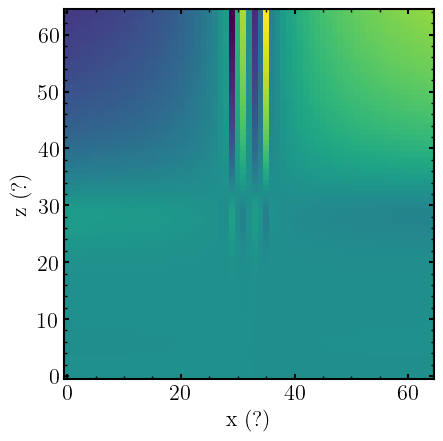

In [35]:
plt.imshow(surfaces_xz[t]['dens'].transpose(), origin='lower', cmap='viridis')
plt.xlabel('x (?)')
plt.ylabel('z (?)')

Make some mooovies
----

In [24]:
np.sum(reconstruct.getAllCoefs()[3])

0j

# old code again


In [25]:
# make nice movie
# more entries here: MW halo MW disc, LMC halo LMC disc; each with coeffs and keylists; made keylist MW: m=6, disc m=4; LMC to 6 in both)
max_r_order = 8

plt.ion()

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
# verbose: false
...
"""

window = int(len(mwhalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]

gal_combs = [['MW halo'], ['LMC halo'], ['MW halo', 'LMC halo']]

##
size = 150./virialradius
npix = 128

times_vir = mwhalo_coefs.Times()
times = mwhalo_coefs.Times()
# tref_vir = 1.7008
# itref = np.where(lmchcenter['t'] >= tref_vir)[0][0]
tref_vir = times_vir[np.where(times_vir>=tref)[0][0]]
itref = np.where(lmchcenter['t'] >= tref)[0][0]
times_phys = timescale * (np.array(times)-tref)


pmin  = [0.0, -size,  -size]
pmax  = [0.0, size, size]
grid  = [ 0,  npix,  npix]

## set up figures

cmap = sns.color_palette("rocket", as_cmap=True)
N = cmap.N
cmap.set_under(cmap(1))
cmap.set_over(cmap(N-1))
densmin = 1e5
densmax = 1
vmin={orders[0][0]: 1e3, orders[1][0]: -1e5, orders[2][0]: -1e5} # minima near orders[1][0]: -1e6, orders[2][0]: -5e6
vmax={orders[0][0]: 1e7, orders[1][0]: 1e5, orders[2][0]: 1e5} # maxima near  orders[1][0]: 1e7, orders[2][0]: 3e8
norms={
    orders[0][0]: colors.LogNorm(vmin=vmin[orders[0][0]], vmax=vmax[orders[0][0]]),
    orders[1][0]: colors.TwoSlopeNorm(vcenter=0., vmin=vmin[orders[1][0]], vmax=vmax[orders[1][0]]),
    orders[2][0]: colors.TwoSlopeNorm(vcenter=0., vmin=vmin[orders[2][0]], vmax=vmax[orders[2][0]])
}
cmaps = {
    orders[0][0]: cmap,
    orders[1][0]: sns.diverging_palette(145, 345, s=60, as_cmap=True),  
    orders[2][0]: sns.diverging_palette(145, 345, s=60, as_cmap=True)
}
tc = {
    orders[0][0]: 'white',
    orders[1][0]: 'k',  
    orders[2][0]: 'k'
}
levels = np.logspace(3,7,endpoint=True,num=9)



#calculate all ssas
ssas = {'MW halo': {}, 'LMC halo': {}, 'both': {}}    

for i, order in enumerate(orders):
    for j, gals in enumerate(gal_combs):
        # print(f"order: {order}") 
        mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
        lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
        
        gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                    'LMC halo': [lmchalo_coefs, lmchbasis, lmchcenter]}
        
        mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
        lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
        mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
        lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
        
        config = {
            "MW halo": (mwhalo_coefs, mwh_keys, []),
            "LMC halo": (lmchalo_coefs, lmch_keys, []),
                } 
        
    
        subconfig = {key: config[key] for key in gals}
        # print(subconfig)
        startTime = time.time()
        ssa_key = gals
        if len(gals) > 1:
            gals= 'both'
        else:
            gals = gals[0]
            
        print(gals)
        ssas[gals][order[0]] = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
        ev = ssas[gals][order[0]].eigenvalues() # do the decomposition (expensive step)
        pc = ssas[gals][order[0]].getPC() # also triggers the expensive step
        
        

                    
        # reconstruct here
        print(f'reconstructing {gals} for order {order[0]}')
        ssas[gals][order[0]].reconstruct([*range(10)])
       


KeyboardInterrupt: 

In [ ]:
gals2 = ['MW halo', 'LMC halo', 'both']
pmin  = [0.0, -size,  -size]
pmax  = [0.0, size, size]
grid  = [ 0,  npix,  npix]
counter = 0

times = mwhalo_coefs.Times()

times_phys = timescale * (np.array(times)-tref)

for it, t in enumerate(times_vir):
    if t < 1.:
        continue
    if t > tref_vir:
        break
    fig, ax = plt.subplots(len(orders), len(gal_combs), figsize=(12, 12), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
    tmask = mwhcenter['t'] == t
    if t==0.0:
        continue
    if sum(tmask) > 1: 
        tmask[np.where(tmask)[0][1:]]=False
        
    print('t =', times_phys[it])
    for i, order in enumerate(orders):
        for j, gals in enumerate(gal_combs):
            # print(f"order: {order}") 
            # print(gals)
            mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
            lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
            
            gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                        'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr]}
            
            mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
            lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
            mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
            lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
            
            config = {
                "MW halo": (mwhalo_coefs, mwh_keys, []),
                "LMC halo": (lmchalo_coefs, lmch_keys, []),
                    } 
            
        
            # subconfig = {key: config[key] for key in gals}
            # print(subconfig)
            # startTime = time.time()
            # ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
            # ev = ssa.eigenvalues() # do the decomposition (expensive step)
            # pc = ssa.getPC() # also triggers the expensive step
            
            # ssas[gals2[j]][order[0]].reconstruct([*range(6)])
              
            # # reconstruct here
            # ssa.reconstruct([*range(npc)])

            
            ax[i,0].set_ylabel(rf'$z$ [kpc] for PC $\ell={order[0]}$')


            # Loop over galaxies
            title = ""
            
            for l, gal in enumerate(gals):
                # print(order, l, gal)

                    
                
                coefs, basis, center = gal_dict[gal]
                if order[0] == 0:
                    reconstruct = coefs
                else: 
                    # print(f'updating coefs for {gals2[j]} order {order[0]}')
                    reconstruct = ssas[gals2[j]][order[0]].getReconstructed()[gal]
                    reconstruct.zerodata()
                    ssas[gals2[j]][order[0]].getReconstructed()[gal]
                    # coefs.zerodata() 
                    # reconstruct = ssas[gals2[j]][order[0]].getReconstructed()[gal]
                
                    # print(reconstruct.Power())

                title += f'{gal.split(' ')[0]}'
                if len(gals)>1 and l == 0:
                    title += ' + '


                fields = pyEXP.field.FieldGenerator([t], pmin, pmax, grid)    
                surfaces = fields.slices(basis, reconstruct)
                
                # make lmc field if necessary, needs to be shifted by LMC center
                if gal == 'LMC halo':
                    
                    center_tmp = np.array([center['x'][tmask], center['y'][tmask], center['z'][tmask]])
                    pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
                    pmax_tmp  = [0.0, float(size-center_tmp[1]), float(size-center_tmp[2])]
                    # print(center_tmp*virialradius)
                    fields = pyEXP.field.FieldGenerator([t], pmin_tmp, pmax_tmp, grid)
                    surfaces = fields.slices(basis, reconstruct)

                keys = list(surfaces.keys())

                if l == 0:
                    # print('l=0')
                    nx = surfaces[keys[0]]['dens'].shape[0]
                    ny = surfaces[keys[0]]['dens'].shape[1]            
                    # Make the mesh
                    x = np.linspace(pmin[1], pmax[1], nx)
                    y = np.linspace(pmin[2], pmax[2], ny)
                    xv, yv = np.meshgrid(x, y)    
                    mat = surfaces[t]['dens'] * massscale / pow(virialradius,3)
                    
                else:
                    mat += surfaces[t]['dens'] * massscale / pow(virialradius,3)
                    
                
            # print(np.min(mat), np.max(mat))
            cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius, 
                                    mat.transpose(), 
                                    norm=norms[order[0]],
                                    cmap=plt.cm.Greys_r, 
                                    )
            cont2 = ax[i, j].pcolormesh(xv*virialradius, yv*virialradius, 
                                        mat.transpose(),
                                        norm=norms[order[0]],
                                        cmap=cmaps[order[0]],
                                        )

            ax[i, j].text(0.95, 0.925, title, horizontalalignment='right', 
                    verticalalignment='center', transform=ax[i,j].transAxes, c= tc[order[0]], fontsize = 16)

        
            ax[i, j].invert_xaxis()
            ax[i, j].set_aspect('equal')
            ax[i, j].set_facecolor('k')
            
    # break

    # # same for ax2
    ax[-1,1].set_xlabel('$y$ [kpc]')
    # ax2[0,0].set_title("MW halo")
    ax[0,1].set_title(f"Lookback time $t = {times_phys[it]:.2f}$ Gyr")
    # ax2[0,2].set_title("MW halo + LMC halo")
    fig.align_ylabels()
    fig.savefig(f'{datadir}/plots/{runtag}/mwlmc_mssa_reconstructions_{it}.png')

    if counter < 2:
        plt.show()
    else: 
        plt.close()

    # if counter >2:
    #     break
    counter +=1
     

# Older code


### mSSA without and with discs


In [ ]:
for i in range(8):
    print(i, int((i/4)%4))
    

0 0
1 0
2 0
3 0
4 1
5 1
6 1
7 1


1.7184
16310
order: [0]
{'MW halo': (<pyEXP.coefs.SphCoefs object at 0x152a08037830>, [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7]], [])}
shape U = 6440 x 806
shape Y = 806 x 6440
In [0] for ['MW halo'], there are off-diagonal elements.
order: [0]
{'LMC halo': (<pyEXP.coefs.SphCoefs object at 0x152a08160ab0>, [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7]], [])}
shape U = 6440 x 806
shape Y = 806 x 6440
In [0] for ['LMC halo'], there are off-diagonal elements.
order: [0]
{'MW disc': (<pyEXP.coefs.CylCoefs object at 0x152a06d16e30>, [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7]], [])}
shape U = 6440 x 806
shape Y = 806 x 6440
In [0] for ['MW disc'], there are off-diagonal elements.
order: [0]
{'LMC disc': (<pyEXP.coefs.CylCoefs object at 0x152a0a3c38f0>, [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7]], [])}
shape U = 6440 x 806
shape Y = 806 x 6440
In [0] for ['LMC disc

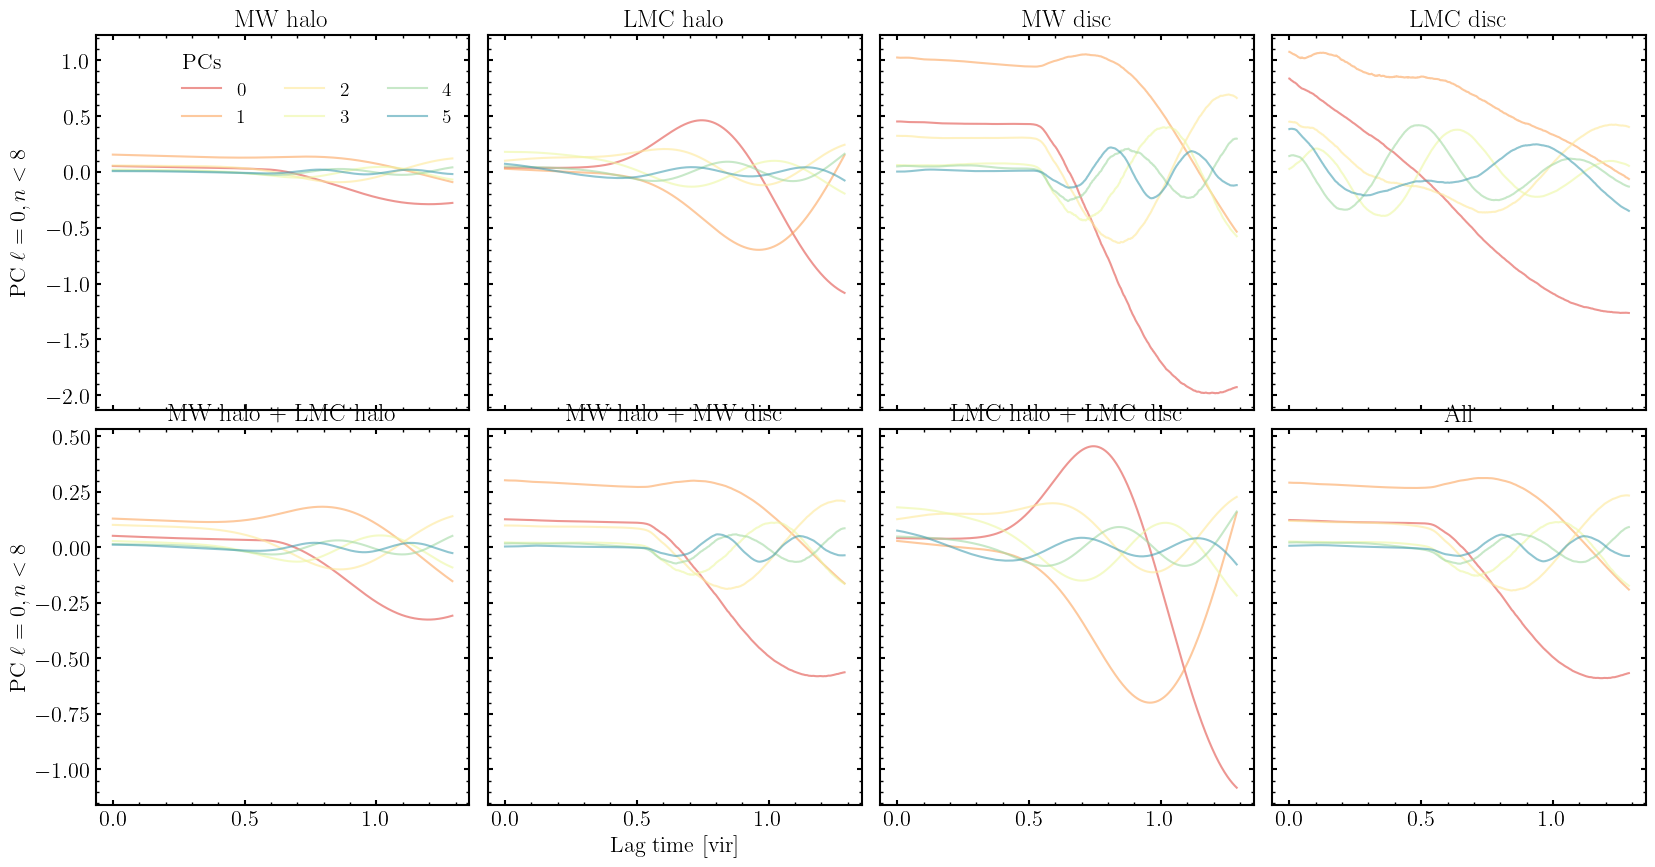

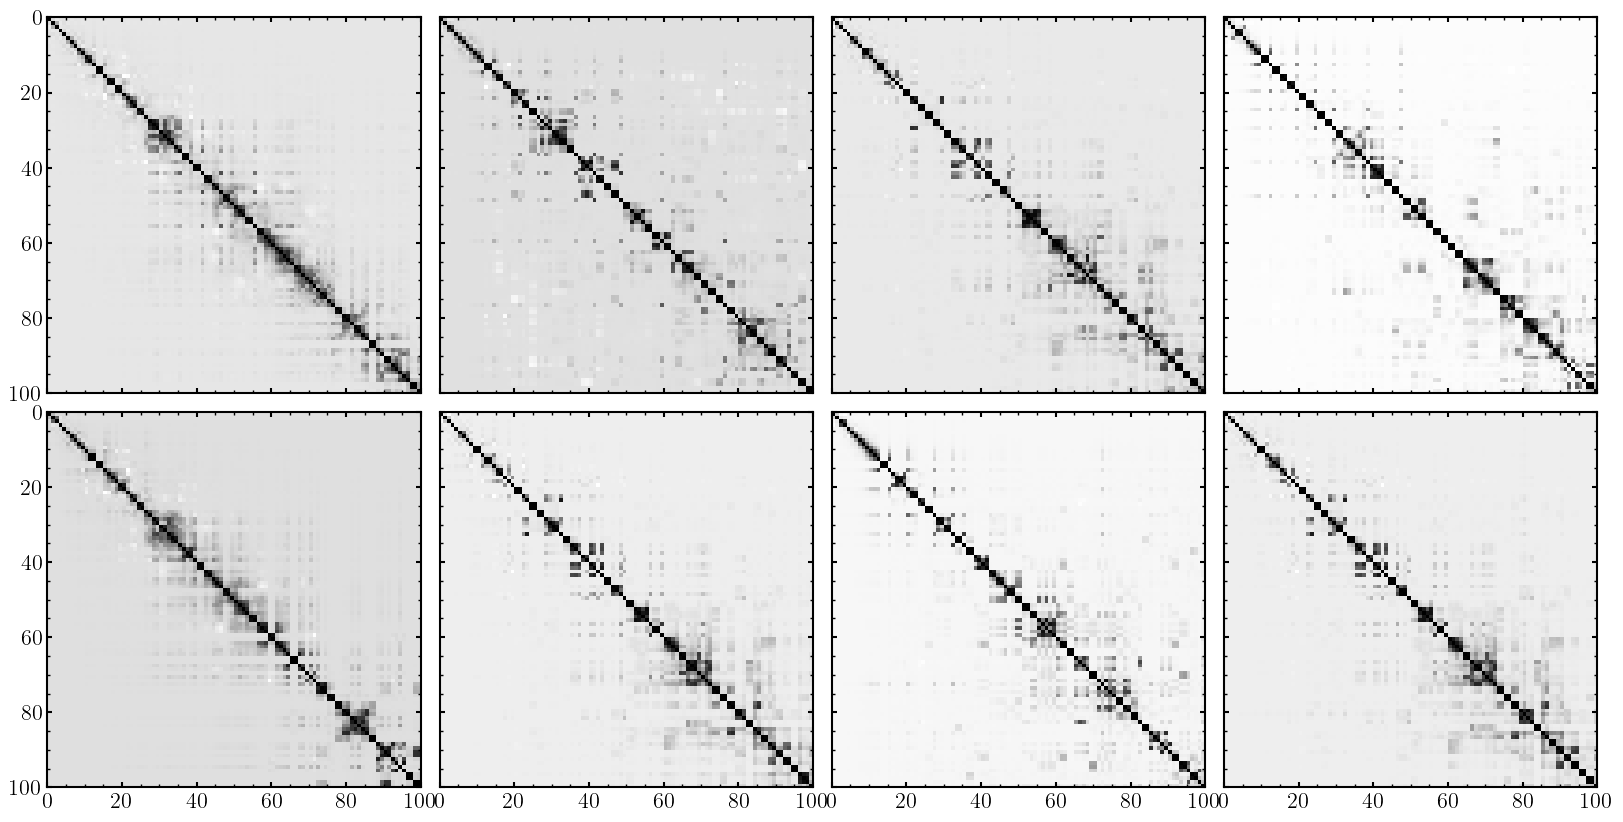

In [ ]:
# look at monopole mssa
max_r_order = 8

plt.ion()

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
# verbose: false
...
"""

window = int(len(mwhalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]
order = [0]

gal_combs = [['MW halo'], ['LMC halo'], ['MW disc'], ['LMC disc'], 
             ['MW halo', 'LMC halo'], ['MW halo', 'MW disc'], ['LMC halo', 'LMC disc'], 
             ['MW halo', 'LMC halo', 'MW disc', 'LMC disc']]

size = 150./virialradius
npix = 128

times_vir = mwhalo_coefs.Times()
tref_vir = times_vir[np.where(times_vir>=tref)[0][0]]
itref = np.where(lmchcenter['t'] >= tref)[0][0]
print(tref_vir)
print(itref)

fig, ax = plt.subplots(2, int(len(gal_combs)/2), figsize=(20, 10), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
fig3, ax3 = plt.subplots(2, int(len(gal_combs)/2), figsize=(20, 10), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

cmap = sns.color_palette("rocket", as_cmap=True)

for j, gals in enumerate(gal_combs):
    print(f"order: {order}") 
    mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
    mwdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwdisk.{runtag}')
    lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
    lmcdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmcdisk.{runtag}')
    
    gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr],
                'MW disc': [mwdisc_coefs, disc_basis, mwdcenter],
                'LMC disc': [lmcdisc_coefs, lmcdbasis, lmcdcenter]
                }
    
    mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
    lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
    mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
    lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
    mwd_rad_mask = [np.where(np.array(mwdisc_coefs.makeKeys(order))[:,1]<max_r_order)]
    lmcd_rad_mask = [np.where(np.array(lmcdisc_coefs.makeKeys(order))[:,1]<max_r_order)]
    mwd_keys = np.array(mwdisc_coefs.makeKeys(order))[mwd_rad_mask].tolist()[0][0]
    lmcd_keys= np.array(lmcdisc_coefs.makeKeys(order))[lmcd_rad_mask].tolist()[0][0]
        
    config = {
        "MW halo": (mwhalo_coefs, mwh_keys, []),
        "LMC halo": (lmchalo_coefs, lmch_keys, []),
        "MW disc": (mwdisc_coefs, mwd_keys, []),
        "LMC disc": (lmcdisc_coefs, lmcd_keys, [])
            } 
    
    subconfig = {key: config[key] for key in gals}
    print(subconfig)
    startTime = time.time()
    ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
    ev = ssa.eigenvalues() # do the decomposition (expensive step)
    pc = ssa.getPC() # also triggers the expensive step
    
    # reconstruct here
    ssa.reconstruct([*range(npc)])
    
    corr_mat = ssa.wCorrAll()
    ax3[int((j/4)%4),j%4].pcolormesh(corr_mat, cmap=plt.cm.Greys)
    ax3[int((j/4)%4),j%4].set_ylim(npc,0)
    if np.sum(corr_mat) == npc:
        print("All diagonal elements are 1.")
    else:
        print(f"In {order} for {gals}, there are off-diagonal elements.")


    ax[0,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
    ax[1,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
    
    rows, cols = pc.shape
    for k in range(min(cols,6)):
        if pc[0,k] < 0:
            sgn = -1
        else:
            sgn = 1
        ax[int((j/4)%4), j%4].plot(times_vir[0:rows], sgn*pc[:,k], '-', label="{:d}".format(k), alpha=0.6)

ax[0,0].legend(ncols=3, fontsize=14, frameon=False, title='PCs', alignment='left')

ax[1,1].set_xlabel('Lag time [vir]')

ax[0,0].set_title("MW halo")
ax[0,1].set_title("LMC halo")
ax[0,2].set_title("MW disc")
ax[0,3].set_title("LMC disc")
ax[1,0].set_title("MW halo + LMC halo")
ax[1,1].set_title("MW halo + MW disc")
ax[1,2].set_title("LMC halo + LMC disc")
ax[1,3].set_title("All")
fig.align_ylabels()



plt.show()


1.7184
16310
order: [1]
{'MW halo': (<pyEXP.coefs.SphCoefs object at 0x152a098cf830>, [[1, 0, 0], [1, 0, 1], [1, 0, 2], [1, 0, 3], [1, 0, 4], [1, 0, 5], [1, 0, 6], [1, 0, 7], [1, 1, 0], [1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 1, 5], [1, 1, 6], [1, 1, 7]], [])}
shape U = 19320 x 806
shape Y = 806 x 19320
In [1] for ['MW halo'], there are off-diagonal elements.
order: [1]
{'LMC halo': (<pyEXP.coefs.SphCoefs object at 0x152a08437cf0>, [[1, 0, 0], [1, 0, 1], [1, 0, 2], [1, 0, 3], [1, 0, 4], [1, 0, 5], [1, 0, 6], [1, 0, 7], [1, 1, 0], [1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 1, 5], [1, 1, 6], [1, 1, 7]], [])}
shape U = 19320 x 806
shape Y = 806 x 19320
In [1] for ['LMC halo'], there are off-diagonal elements.
order: [1]
{'MW disc': (<pyEXP.coefs.CylCoefs object at 0x152a0991a970>, [[1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7]], [])}
shape U = 12880 x 806
shape Y = 806 x 12880
In [1] for ['MW disc'], there are off-diagonal elements.
order: [1]
{'LMC disc': (<

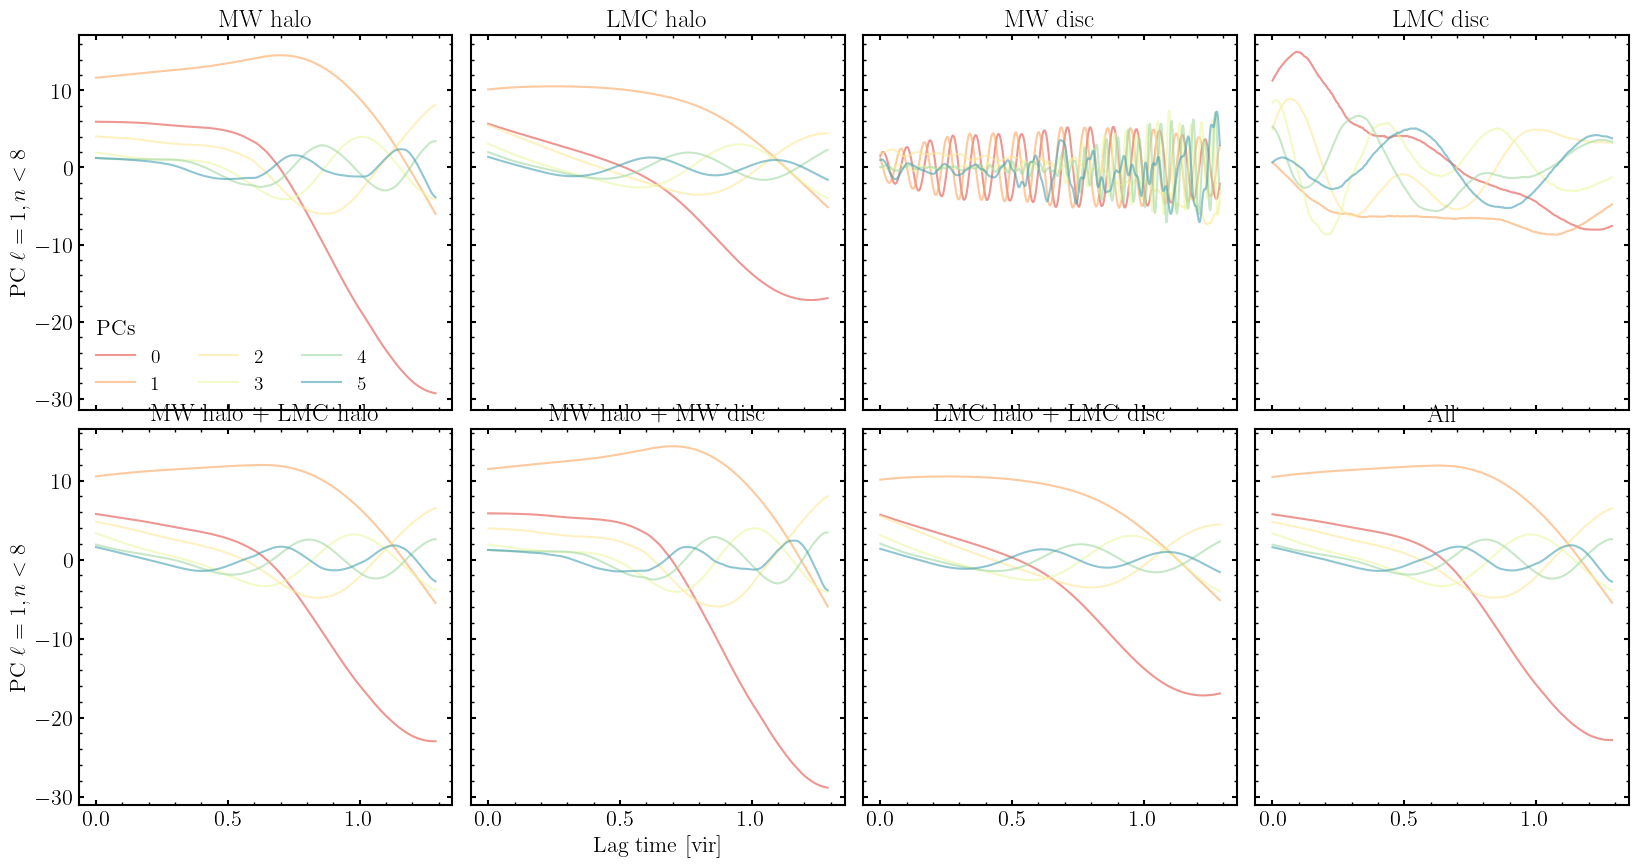

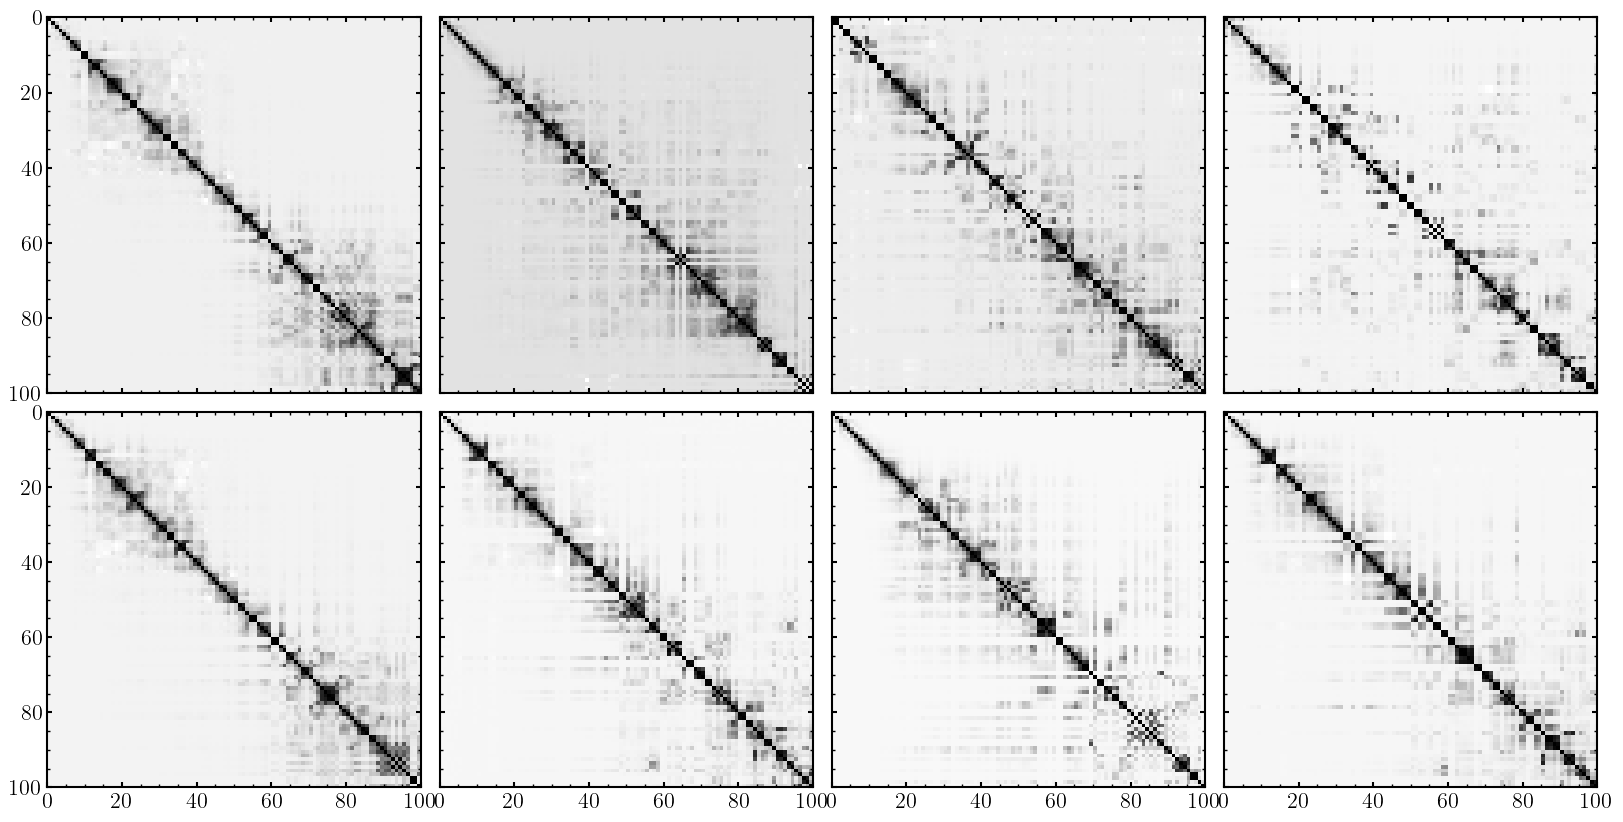

In [ ]:
# look at dipole mssa
max_r_order = 8

plt.ion()

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
# verbose: false
...
"""

window = int(len(mwhalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]
order = [1]

gal_combs = [['MW halo'], ['LMC halo'], ['MW disc'], ['LMC disc'], 
             ['MW halo', 'LMC halo'], ['MW halo', 'MW disc'], ['LMC halo', 'LMC disc'], 
             ['MW halo', 'LMC halo', 'MW disc', 'LMC disc']]

size = 150./virialradius
npix = 128

times_vir = mwhalo_coefs.Times()
tref_vir = times_vir[np.where(times_vir>=tref)[0][0]]
itref = np.where(lmchcenter['t'] >= tref)[0][0]
print(tref_vir)
print(itref)

fig, ax = plt.subplots(2, int(len(gal_combs)/2), figsize=(20, 10), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
fig3, ax3 = plt.subplots(2, int(len(gal_combs)/2), figsize=(20, 10), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

cmap = sns.color_palette("rocket", as_cmap=True)

for j, gals in enumerate(gal_combs):
    print(f"order: {order}") 
    mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
    mwdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwdisk.{runtag}')
    lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
    lmcdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmcdisk.{runtag}')
    
    gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr],
                'MW disc': [mwdisc_coefs, disc_basis, mwdcenter],
                'LMC disc': [lmcdisc_coefs, lmcdbasis, lmcdcenter]
                }
    
    mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
    lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
    mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
    lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
    mwd_rad_mask = [np.where(np.array(mwdisc_coefs.makeKeys(order))[:,1]<max_r_order)]
    lmcd_rad_mask = [np.where(np.array(lmcdisc_coefs.makeKeys(order))[:,1]<max_r_order)]
    mwd_keys = np.array(mwdisc_coefs.makeKeys(order))[mwd_rad_mask].tolist()[0][0]
    lmcd_keys= np.array(lmcdisc_coefs.makeKeys(order))[lmcd_rad_mask].tolist()[0][0]
        
    config = {
        "MW halo": (mwhalo_coefs, mwh_keys, []),
        "LMC halo": (lmchalo_coefs, lmch_keys, []),
        "MW disc": (mwdisc_coefs, mwd_keys, []),
        "LMC disc": (lmcdisc_coefs, lmcd_keys, [])
            } 
    
    subconfig = {key: config[key] for key in gals}
    print(subconfig)
    startTime = time.time()
    ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
    ev = ssa.eigenvalues() # do the decomposition (expensive step)
    pc = ssa.getPC() # also triggers the expensive step
    
    # reconstruct here
    ssa.reconstruct([*range(npc)])
    
    corr_mat = ssa.wCorrAll()
    ax3[int((j/4)%4),j%4].pcolormesh(corr_mat, cmap=plt.cm.Greys)
    ax3[int((j/4)%4),j%4].set_ylim(npc,0)
    if np.sum(corr_mat) == npc:
        print("All diagonal elements are 1.")
    else:
        print(f"In {order} for {gals}, there are off-diagonal elements.")


    ax[0,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
    ax[1,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
    
    rows, cols = pc.shape
    for k in range(min(cols,6)):
        if pc[0,k] < 0:
            sgn = -1
        else:
            sgn = 1
        ax[int((j/4)%4), j%4].plot(times_vir[0:rows], sgn*pc[:,k], '-', label="{:d}".format(k), alpha=0.6)

ax[0,0].legend(ncols=3, fontsize=14, frameon=False, title='PCs', alignment='left')

ax[1,1].set_xlabel('Lag time [vir]')

ax[0,0].set_title("MW halo")
ax[0,1].set_title("LMC halo")
ax[0,2].set_title("MW disc")
ax[0,3].set_title("LMC disc")
ax[1,0].set_title("MW halo + LMC halo")
ax[1,1].set_title("MW halo + MW disc")
ax[1,2].set_title("LMC halo + LMC disc")
ax[1,3].set_title("All")
fig.align_ylabels()



plt.show()


1.7184
16310
order: [2]
{'MW halo': (<pyEXP.coefs.SphCoefs object at 0x152a0875f830>, [[2, 0, 0], [2, 0, 1], [2, 0, 2], [2, 0, 3], [2, 0, 4], [2, 0, 5], [2, 0, 6], [2, 0, 7], [2, 1, 0], [2, 1, 1], [2, 1, 2], [2, 1, 3], [2, 1, 4], [2, 1, 5], [2, 1, 6], [2, 1, 7], [2, 2, 0], [2, 2, 1], [2, 2, 2], [2, 2, 3], [2, 2, 4], [2, 2, 5], [2, 2, 6], [2, 2, 7]], [])}
shape U = 32200 x 806
shape Y = 806 x 32200
In [2] for ['MW halo'], there are off-diagonal elements.
order: [2]
{'LMC halo': (<pyEXP.coefs.SphCoefs object at 0x152a06f6f730>, [[2, 0, 0], [2, 0, 1], [2, 0, 2], [2, 0, 3], [2, 0, 4], [2, 0, 5], [2, 0, 6], [2, 0, 7], [2, 1, 0], [2, 1, 1], [2, 1, 2], [2, 1, 3], [2, 1, 4], [2, 1, 5], [2, 1, 6], [2, 1, 7], [2, 2, 0], [2, 2, 1], [2, 2, 2], [2, 2, 3], [2, 2, 4], [2, 2, 5], [2, 2, 6], [2, 2, 7]], [])}
shape U = 32200 x 806
shape Y = 806 x 32200
In [2] for ['LMC halo'], there are off-diagonal elements.
order: [2]
{'MW disc': (<pyEXP.coefs.CylCoefs object at 0x152a06f6cf70>, [[2, 0], [2, 1], [2, 2

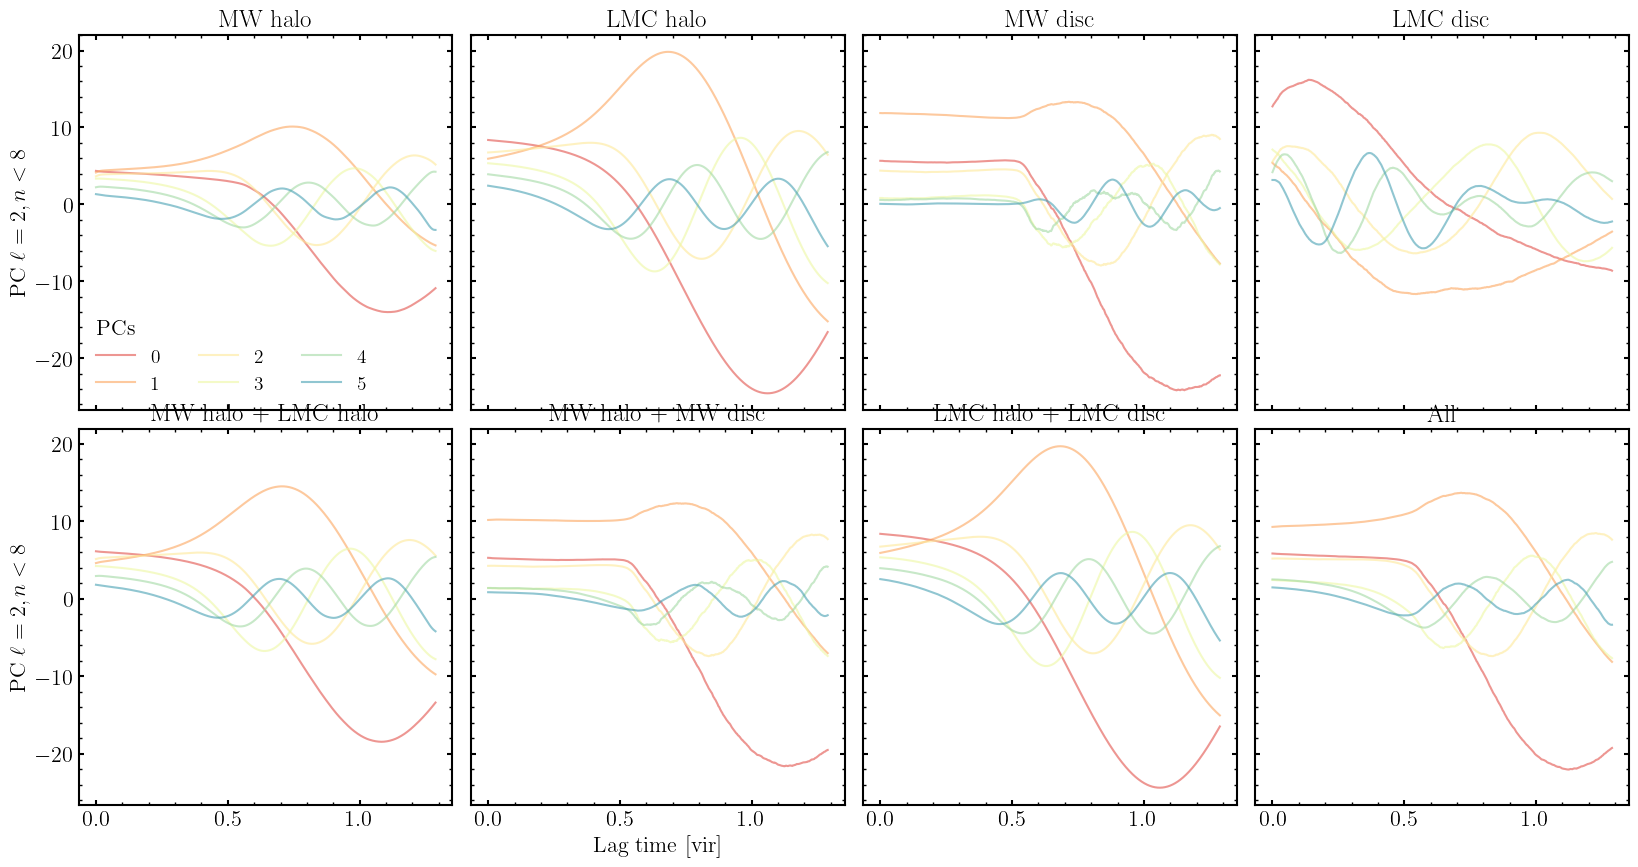

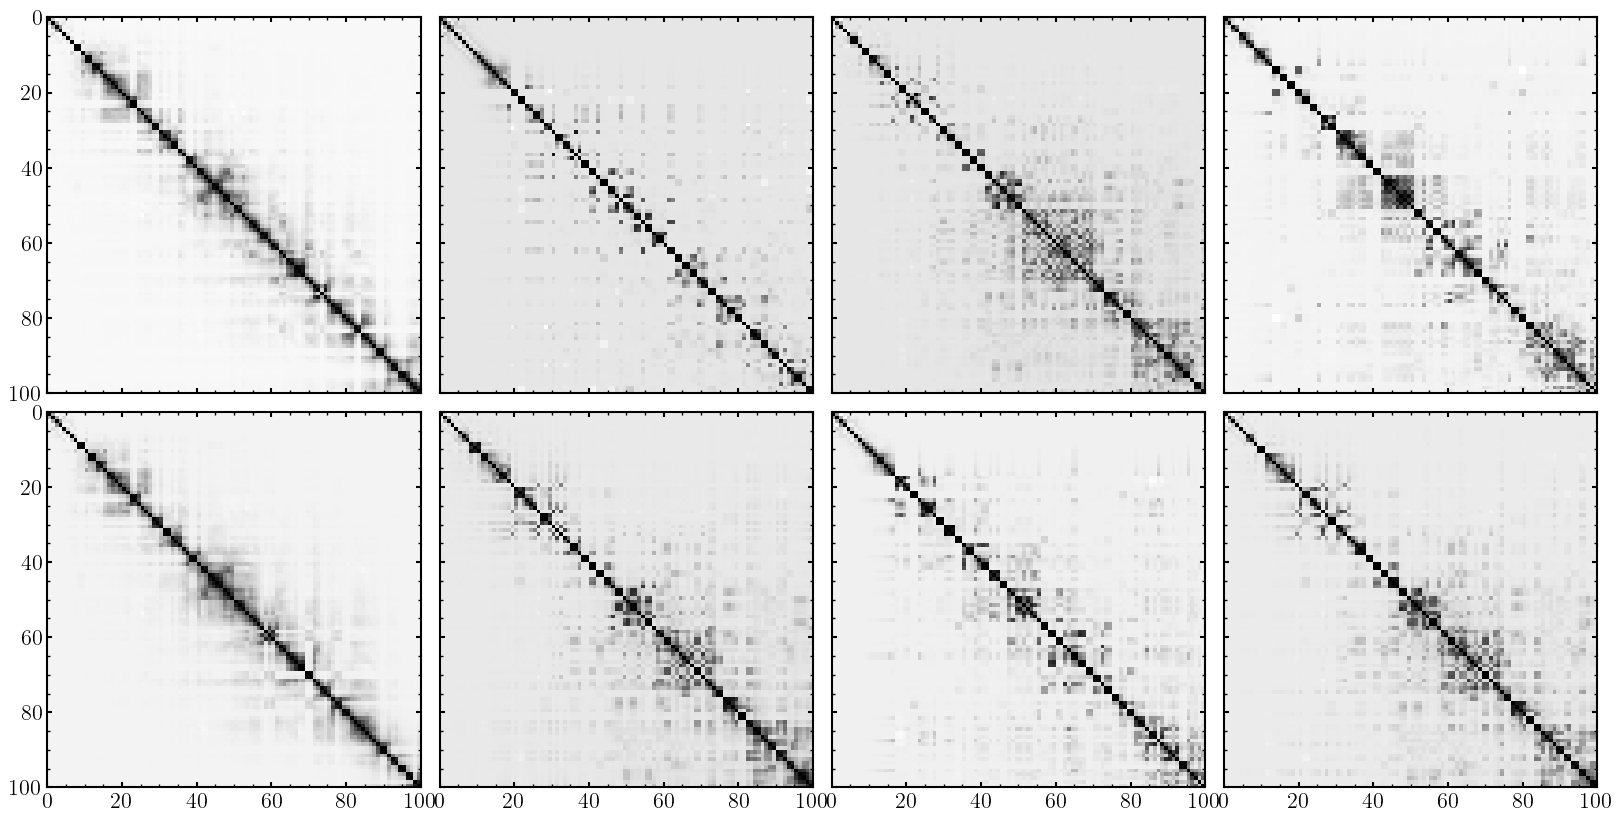

In [ ]:
# look at quadrupole mssa
max_r_order = 8

plt.ion()

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
# verbose: false
...
"""

window = int(len(mwhalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]
order = [2]

gal_combs = [['MW halo'], ['LMC halo'], ['MW disc'], ['LMC disc'], 
             ['MW halo', 'LMC halo'], ['MW halo', 'MW disc'], ['LMC halo', 'LMC disc'], 
             ['MW halo', 'LMC halo', 'MW disc', 'LMC disc']]

size = 150./virialradius
npix = 128

times_vir = mwhalo_coefs.Times()
tref_vir = times_vir[np.where(times_vir>=tref)[0][0]]
itref = np.where(lmchcenter['t'] >= tref)[0][0]
print(tref_vir)
print(itref)

fig, ax = plt.subplots(2, int(len(gal_combs)/2), figsize=(20, 10), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
fig3, ax3 = plt.subplots(2, int(len(gal_combs)/2), figsize=(20, 10), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

cmap = sns.color_palette("rocket", as_cmap=True)

for j, gals in enumerate(gal_combs):
    print(f"order: {order}") 
    mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
    mwdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwdisk.{runtag}')
    lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
    lmcdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmcdisk.{runtag}')
    
    gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr],
                'MW disc': [mwdisc_coefs, disc_basis, mwdcenter],
                'LMC disc': [lmcdisc_coefs, lmcdbasis, lmcdcenter]
                }
    
    mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
    lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
    mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
    lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
    mwd_rad_mask = [np.where(np.array(mwdisc_coefs.makeKeys(order))[:,1]<max_r_order)]
    lmcd_rad_mask = [np.where(np.array(lmcdisc_coefs.makeKeys(order))[:,1]<max_r_order)]
    mwd_keys = np.array(mwdisc_coefs.makeKeys(order))[mwd_rad_mask].tolist()[0][0]
    lmcd_keys= np.array(lmcdisc_coefs.makeKeys(order))[lmcd_rad_mask].tolist()[0][0]
        
    config = {
        "MW halo": (mwhalo_coefs, mwh_keys, []),
        "LMC halo": (lmchalo_coefs, lmch_keys, []),
        "MW disc": (mwdisc_coefs, mwd_keys, []),
        "LMC disc": (lmcdisc_coefs, lmcd_keys, [])
            } 
    
    subconfig = {key: config[key] for key in gals}
    print(subconfig)
    startTime = time.time()
    ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
    ev = ssa.eigenvalues() # do the decomposition (expensive step)
    pc = ssa.getPC() # also triggers the expensive step
    
    # reconstruct here
    ssa.reconstruct([*range(npc)])
    
    corr_mat = ssa.wCorrAll()
    ax3[int((j/4)%4),j%4].pcolormesh(corr_mat, cmap=plt.cm.Greys)
    ax3[int((j/4)%4),j%4].set_ylim(npc,0)
    if np.sum(corr_mat) == npc:
        print("All diagonal elements are 1.")
    else:
        print(f"In {order} for {gals}, there are off-diagonal elements.")


    ax[0,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
    ax[1,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
    
    rows, cols = pc.shape
    for k in range(min(cols,10)):
        if pc[0,k] < 0:
            sgn = -1
        else:
            sgn = 1
        ax[int((j/4)%4), j%4].plot(times_vir[0:rows], sgn*pc[:,k], '-', label="{:d}".format(k), alpha=0.6)

ax[0,0].legend(ncols=3, fontsize=14, frameon=False, title='PCs', alignment='left')

ax[1,1].set_xlabel('Lag time [vir]')

ax[0,0].set_title("MW halo")
ax[0,1].set_title("LMC halo")
ax[0,2].set_title("MW disc")
ax[0,3].set_title("LMC disc")
ax[1,0].set_title("MW halo + LMC halo")
ax[1,1].set_title("MW halo + MW disc")
ax[1,2].set_title("LMC halo + LMC disc")
ax[1,3].set_title("All")
fig.align_ylabels()



plt.show()

In [ ]:
stop

NameError: name 'stop' is not defined

1.7184
16310


IndexError: list index out of range

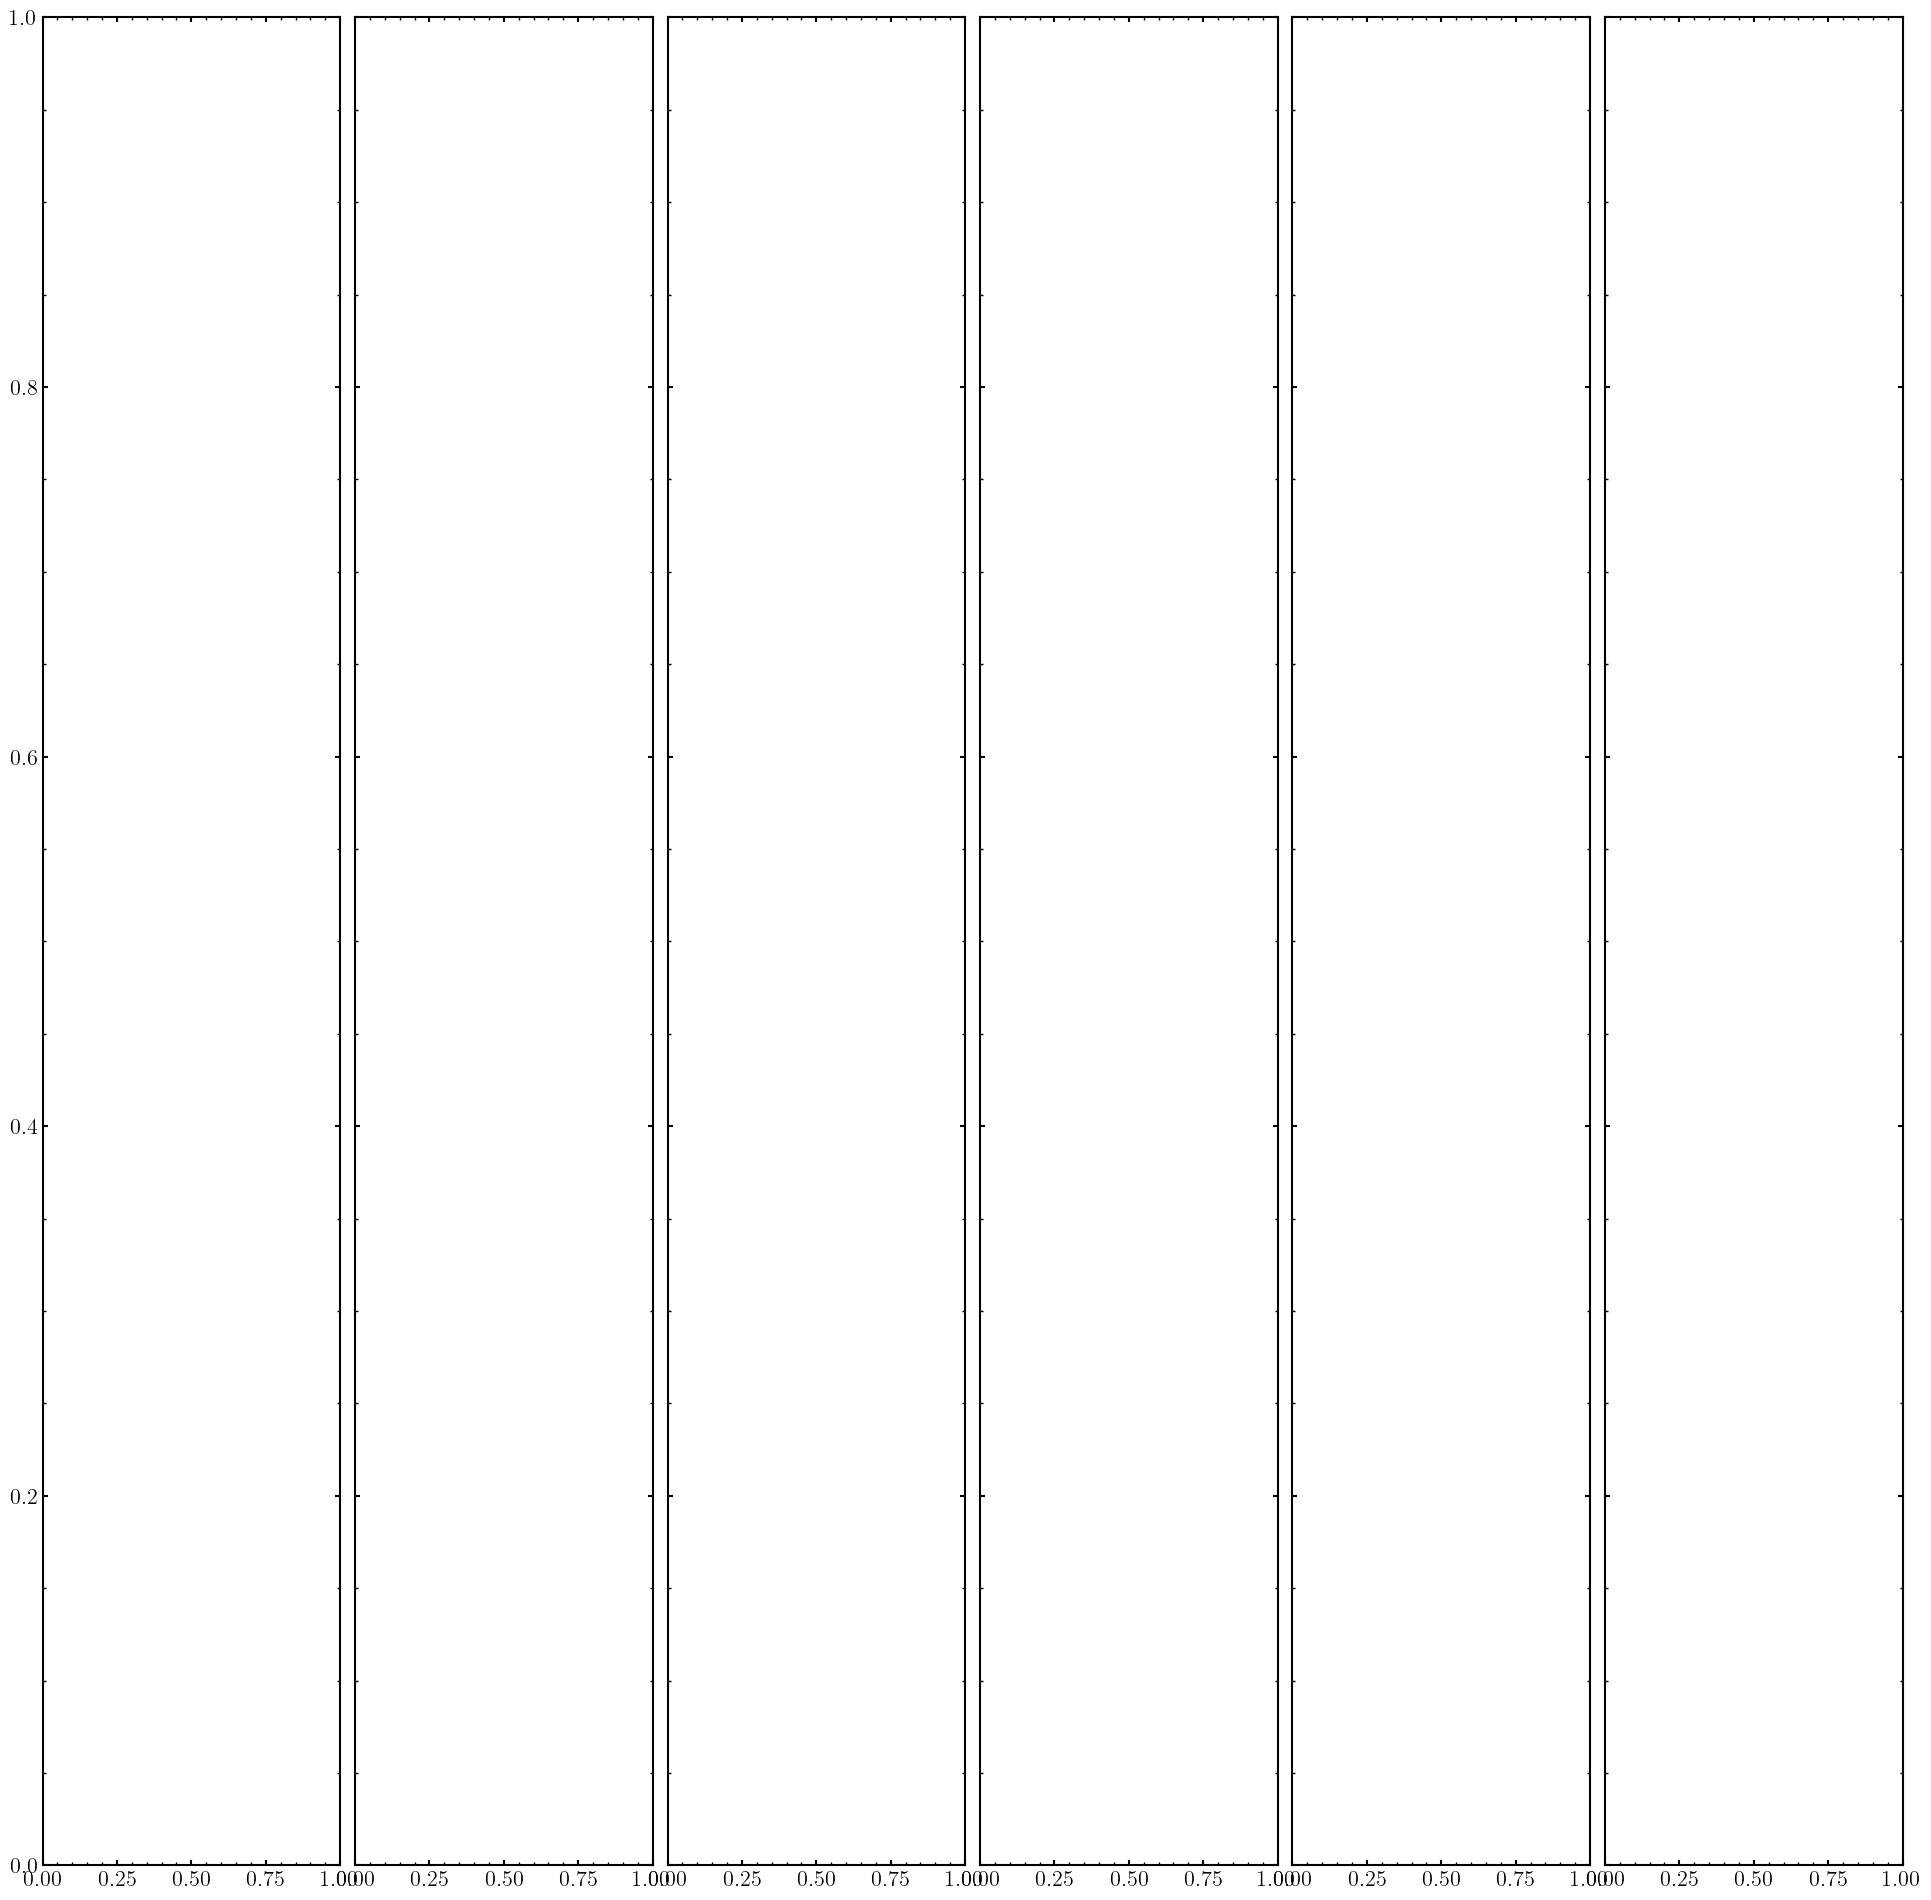

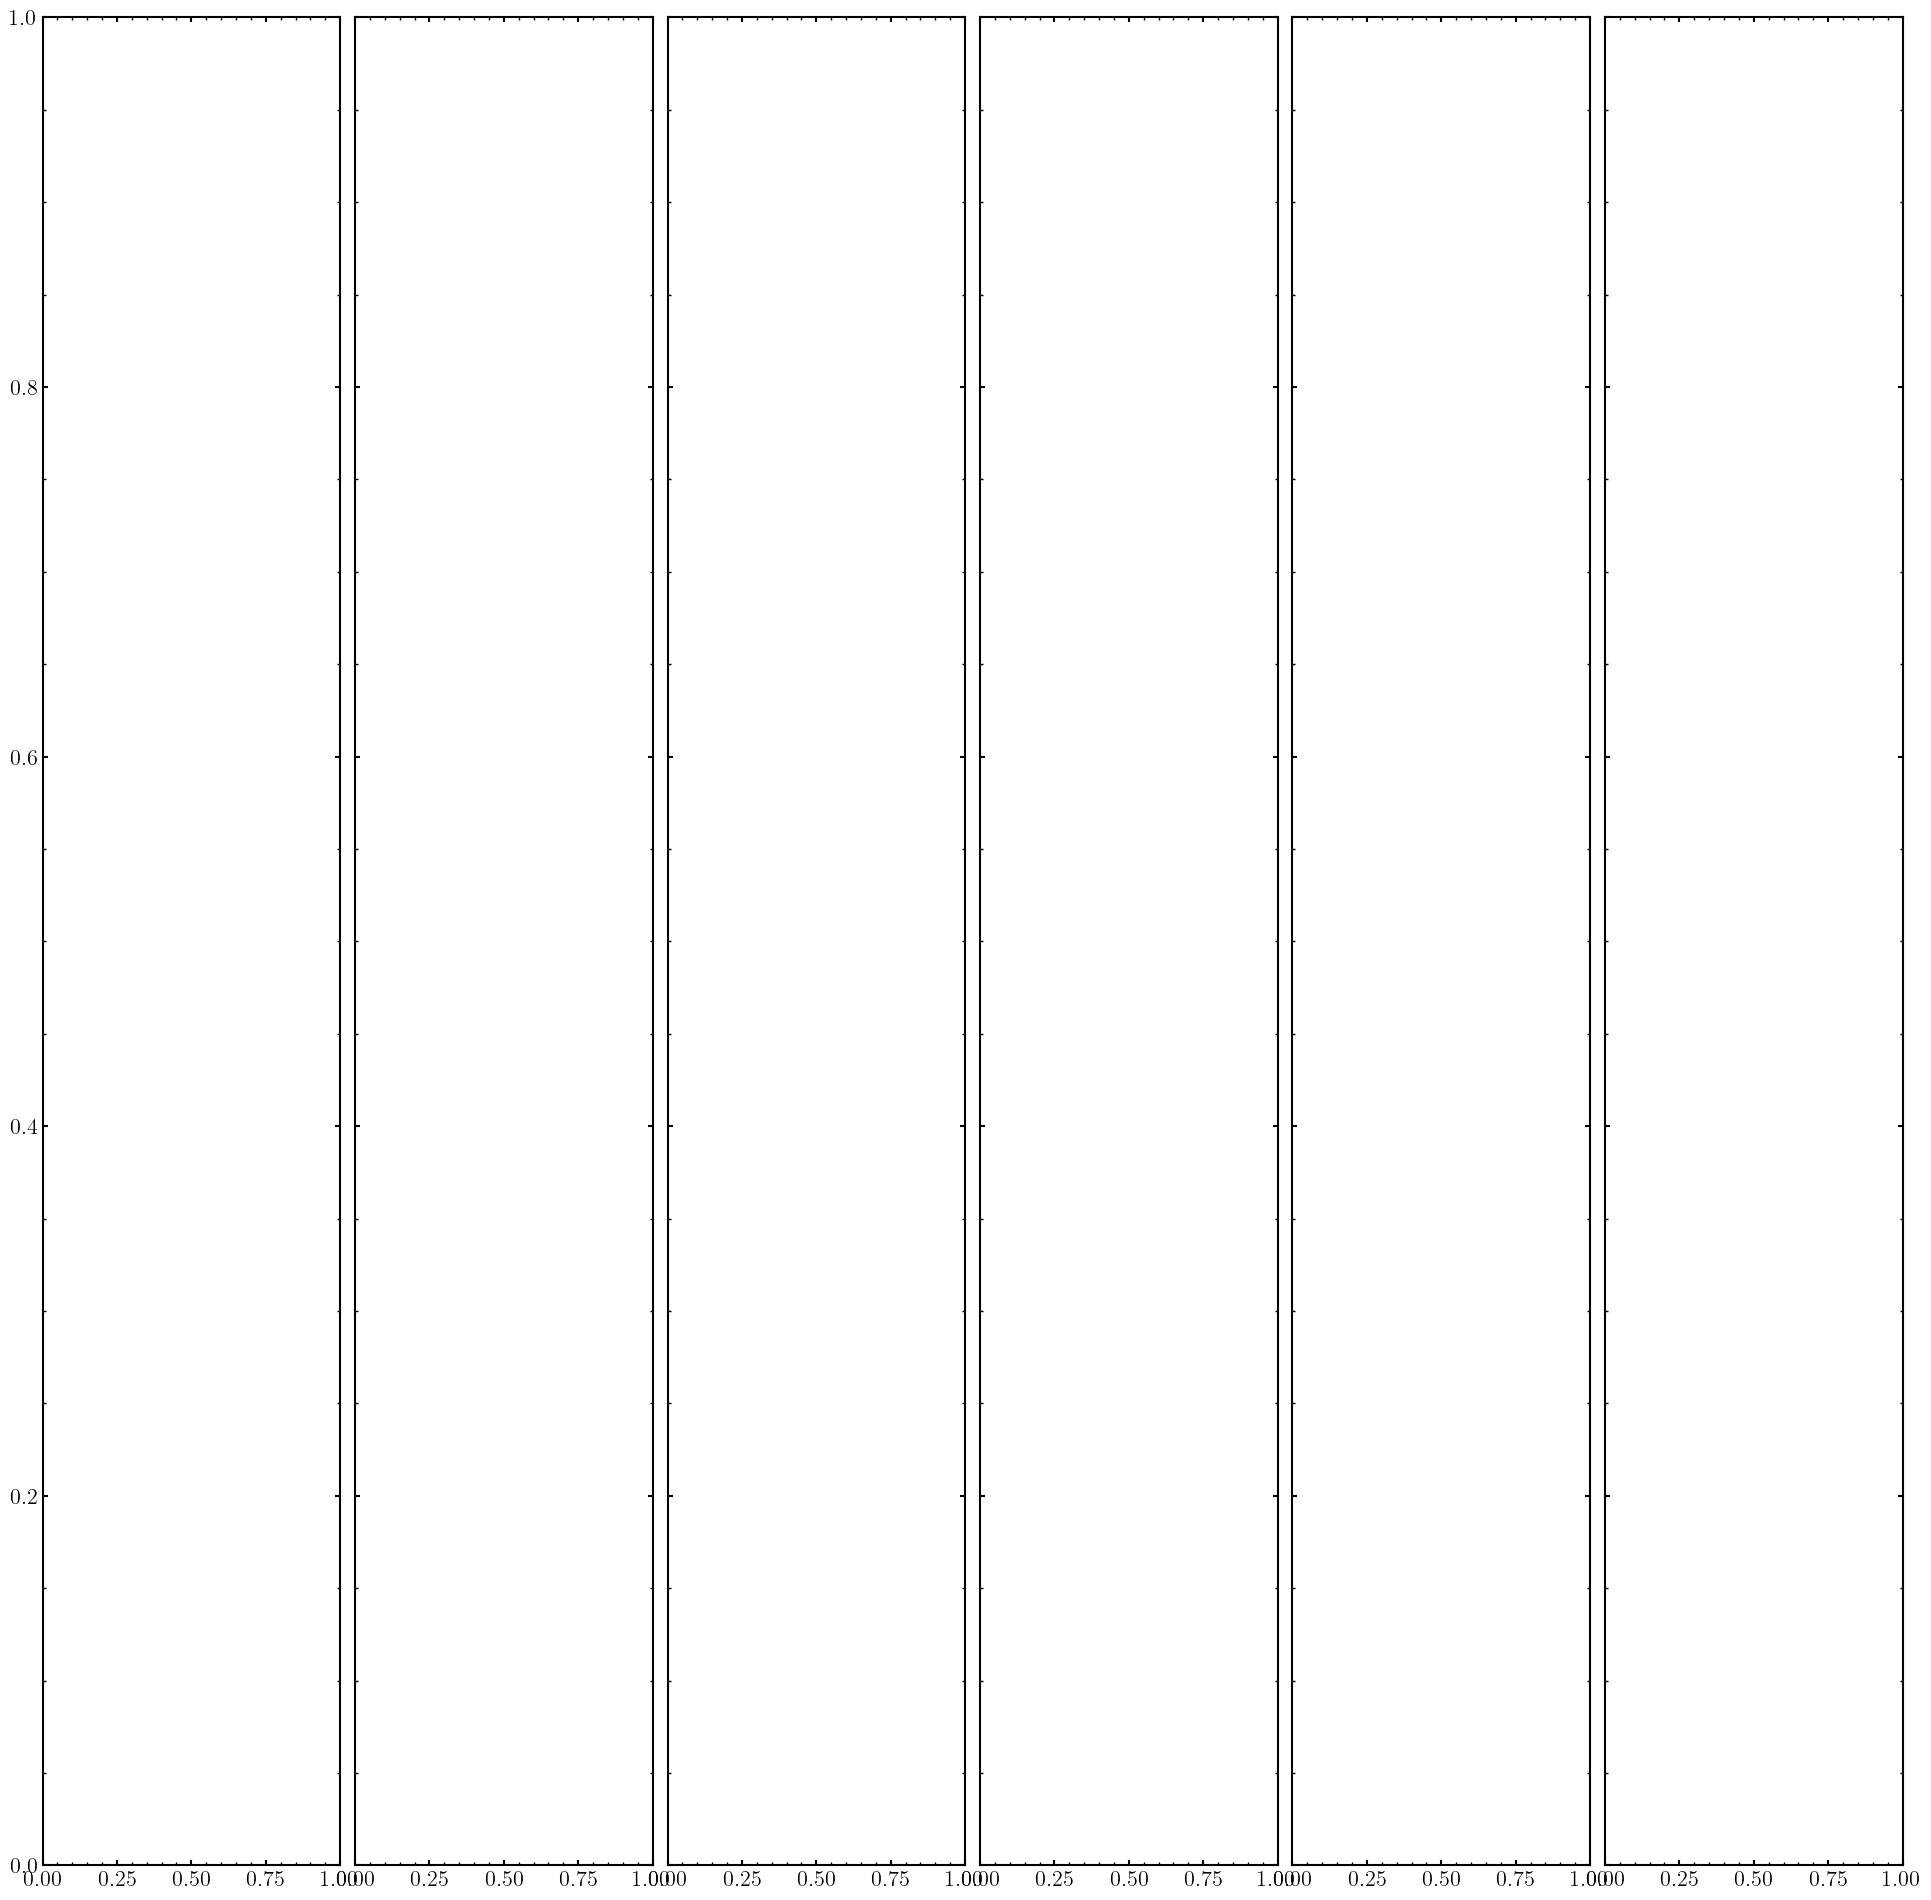

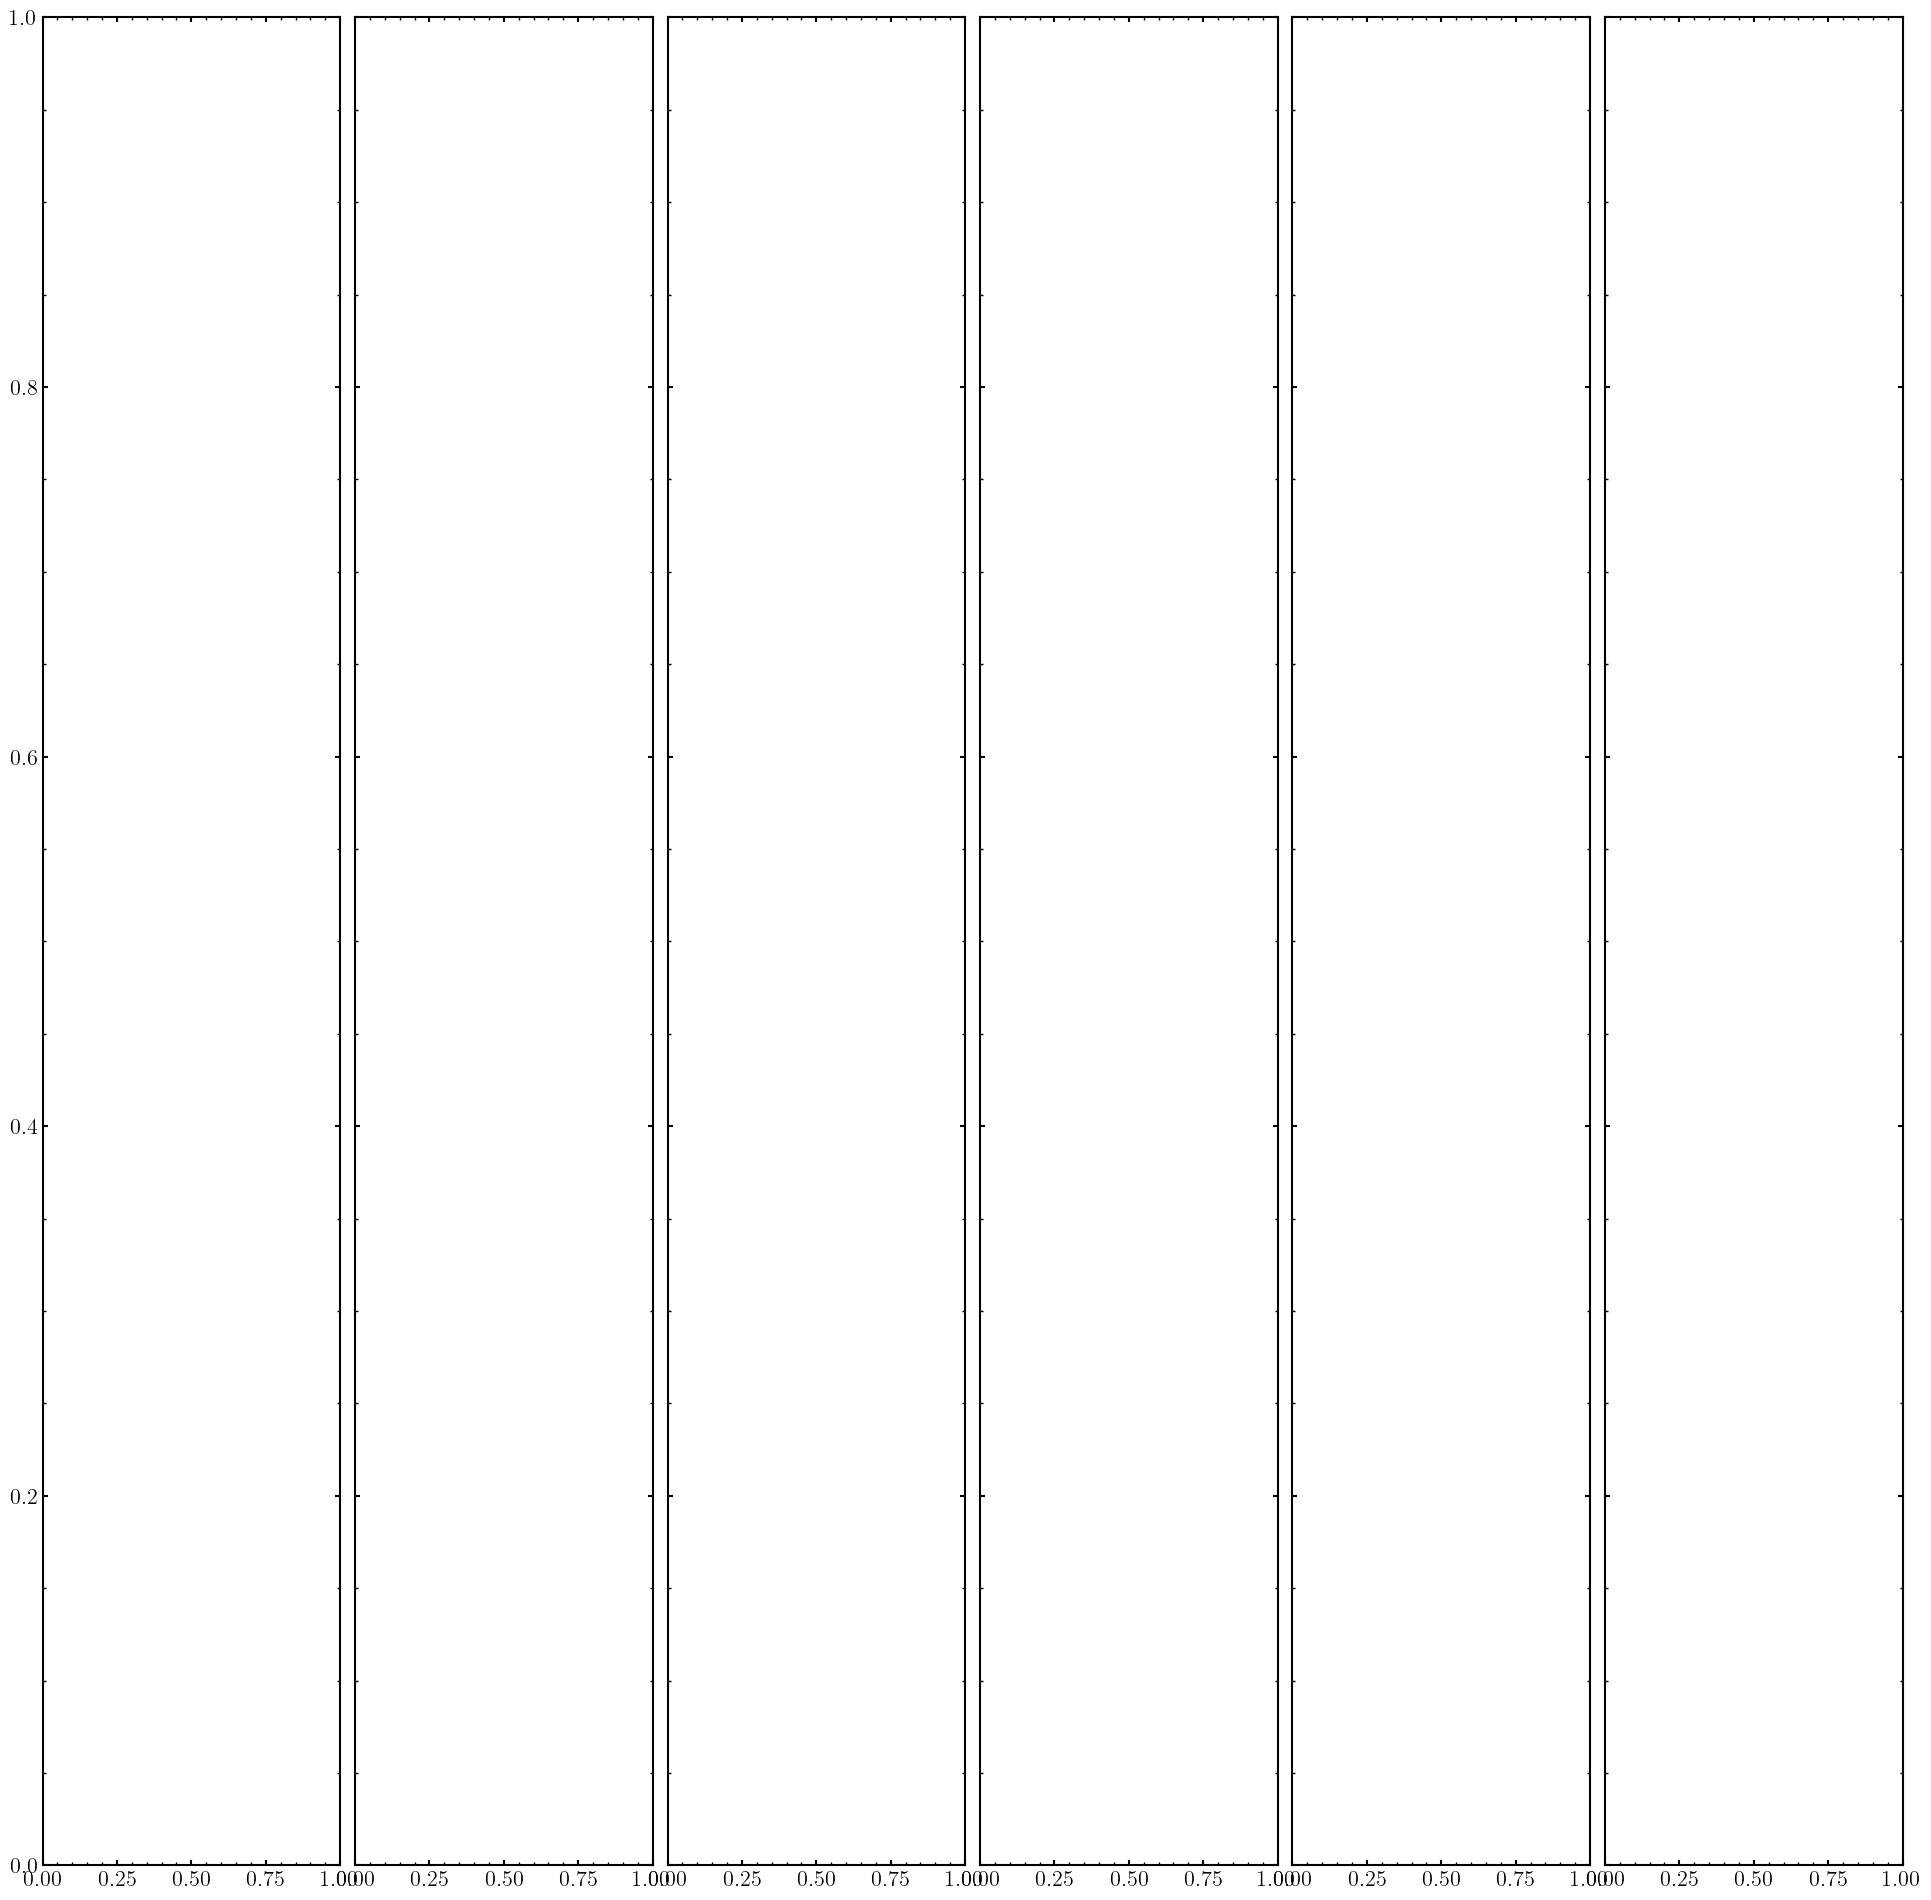

In [ ]:
# more entries here: MW halo MW disc, LMC halo LMC disc; each with coeffs and keylists; made keylist MW: m=6, disc m=4; LMC to 6 in both)
max_r_order = 8

plt.ion()

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
# verbose: false
...
"""

window = int(len(mwhalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]
orders = [[1]]

gal_combs = [['MW halo'], ['LMC halo'], ['MW halo', 'LMC halo'], ['MW halo', 'MW disc'], ['LMC halo', 'LMC disc'], ['MW halo', 'LMC halo', 'MW disc', 'LMC disc']]

# gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
#             'LMC halo': [lmchalo_coefs, lmchbasis, lmchcenter]}


##
size = 150./virialradius
npix = 128

times_vir = mwhalo_coefs.Times()
# tref_vir = 1.7008
# itref = np.where(lmchcenter['t'] >= tref_vir)[0][0]
tref_vir = times_vir[np.where(times_vir>=tref)[0][0]]
itref = np.where(lmchcenter['t'] >= tref)[0][0]
print(tref_vir)
print(itref)

pmin  = [0.0, -size,  -size]
pmax  = [0.0, size, size]
grid  = [ 0,  npix,  npix]

## set up figures
fig, ax = plt.subplots(len(orders), len(gal_combs), figsize=(24, 24), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
fig2, ax2 = plt.subplots(len(orders), len(gal_combs), figsize=(24, 24), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
fig3, ax3 = plt.subplots(len(orders), len(gal_combs), figsize=(24, 24), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

cmap = sns.color_palette("rocket", as_cmap=True)
N = cmap.N
cmap.set_under(cmap(1))
cmap.set_over(cmap(N-1))
densmin = 1e5
densmax = 1
vmin={orders[0][0]: 1e3, orders[1][0]: -1e5, orders[2][0]: -1e5} # minima near orders[1][0]: -1e6, orders[2][0]: -5e6
vmax={orders[0][0]: 1e7, orders[1][0]: 1e5, orders[2][0]: 1e5} # maxima near  orders[1][0]: 1e7, orders[2][0]: 3e8
norms={
    orders[0][0]: colors.LogNorm(vmin=vmin[orders[0][0]], vmax=vmax[orders[0][0]]),
    orders[1][0]: colors.TwoSlopeNorm(vcenter=0., vmin=vmin[orders[1][0]], vmax=vmax[orders[1][0]]),
    orders[2][0]: colors.TwoSlopeNorm(vcenter=0., vmin=vmin[orders[2][0]], vmax=vmax[orders[2][0]])
}
cmaps = {
    orders[0][0]: cmap,
    orders[1][0]: sns.diverging_palette(145, 345, s=60, as_cmap=True),  
    orders[2][0]: sns.diverging_palette(145, 345, s=60, as_cmap=True)
}
levels = np.logspace(3,7,endpoint=True,num=9)


for i, order in enumerate(orders):
    for j, gals in enumerate(gal_combs):
        print(f"order: {order}") 
        mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
        lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
        
        gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                    'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr],
                    'MW disc': [mwdisc_coefs, disc_basis, mwdcenter],
                    'LMC disc': [lmcdisc_coefs, lmcdbasis, lmcdcenter]
                    }
        
        mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
        lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
        mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
        lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
        
        config = {
            "MW halo": (mwhalo_coefs, mwh_keys, []),
            "LMC halo": (lmchalo_coefs, lmch_keys, []),
            "MW disc": (mwdisc_coefs, mwdisc_keylst, []),
            "LMC disc": (lmcdisc_coefs, lmcdisc_keylst, [])
                } 
        
    
        subconfig = {key: config[key] for key in gals}
        print(subconfig)
        startTime = time.time()
        ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
        ev = ssa.eigenvalues() # do the decomposition (expensive step)
        pc = ssa.getPC() # also triggers the expensive step
        
        

                    
        # reconstruct here
        ssa.reconstruct([*range(npc)])
        
        corr_mat = ssa.wCorrAll()
        ax3[i,j].pcolormesh(corr_mat, cmap=plt.cm.Greys)
        ax3[i,j].set_ylim(npc,0)
        if np.sum(corr_mat) == npc:
            print("All diagonal elements are 1.")
        else:
            print(f"In {order} for {gals}, there are off-diagonal elements.")
    

        ax[i,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
        
        ax2[i,0].set_ylabel(rf'$z$ [kpc] for PC $\ell={order[0]}$')

        rows, cols = pc.shape
        for k in range(min(cols,6)):
            if pc[0,k] < 0:
                sgn = -1
            else:
                sgn = 1
            ax[i, j].plot(times_vir[0:rows], sgn*pc[:,k], '-', label="{:d}".format(k), alpha=0.6)



        if False:
            subconfig2 = {key: full_config[key] for key in gals}
            startTime = time.time()
            ssa = pyEXP.mssa.expMSSA(subconfig2, window, npc, flags)
            ev = ssa.eigenvalues() # do the decomposition (expensive step)
            pc = ssa.getPC() # also triggers the expensive step
            print(f'Computed l={order},n=20 eigenvalues and PCs for {gals} in {time.time() - startTime:6.2f} seconds.')

            rows, cols = pc.shape
            for k in range(min(cols,6)):
                if pc[0,k] < 0:
                    sgn = -1
                else:
                    sgn = 1
                full_lines = ax[i, j].plot(times[0:rows], sgn*pc[:,k], '--', alpha=0.6)

        if False:
        # Loop over galaxies
            title = ""
            
            for l, gal in enumerate(gals):
                print(order, l, gal)

                
                coefs, basis, center = gal_dict[gal]
                coefs.zerodata() 
                reconstruct = ssa.getReconstructed()[gal]
                
                print(coefs.Power())

                title += f'{gal.split(' ')[0]}'
                if len(gals)>1 and l == 0:
                    title += ' + '


                fields = pyEXP.field.FieldGenerator([tref_vir], pmin, pmax, grid)    
                surfaces = fields.slices(basis, reconstruct)
                
                # make lmc field if necessary, needs to be shifted by LMC center
                if gal == 'LMC halo':
                    
                    center_tmp = np.array([center['x'][itref], center['y'][itref], center['z'][itref]])
                    pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
                    pmax_tmp  = [0.0, float(size-center_tmp[1]), float(size-center_tmp[2])]
                    # print(center_tmp*virialradius)
                    fields = pyEXP.field.FieldGenerator([tref_vir], pmin_tmp, pmax_tmp, grid)
                    surfaces = fields.slices(basis, reconstruct)

                keys = list(surfaces.keys())

                if l == 0:
                    print('l=0')
                    nx = surfaces[keys[0]]['dens'].shape[0]
                    ny = surfaces[keys[0]]['dens'].shape[1]            
                    # Make the mesh
                    x = np.linspace(pmin[1], pmax[1], nx)
                    y = np.linspace(pmin[2], pmax[2], ny)
                    xv, yv = np.meshgrid(x, y)    
                    mat = surfaces[tref_vir]['dens'] * massscale / pow(virialradius,3)
                    
                else:
                    mat += surfaces[tref_vir]['dens'] * massscale / pow(virialradius,3)
                
        if False:   
            print(np.min(mat), np.max(mat))
            cont1 = ax2[i, j].contour(xv*virialradius, yv*virialradius, 
                                    mat.transpose(), 
                                    norm=norms[order[0]],
                                    cmap=plt.cm.Greys_r, 
                                    )
            cont2 = ax2[i, j].pcolormesh(xv*virialradius, yv*virialradius, 
                                        mat.transpose(),
                                        norm=norms[order[0]],
                                        cmap=cmaps[order[0]],
                                        )

            ax2[i, j].text(0.95, 0.925, title, horizontalalignment='right', 
                    verticalalignment='center', transform=ax2[i,j].transAxes, c= 'white', fontsize = 16)

        
            ax2[i, j].invert_xaxis()
            ax2[i, j].set_aspect('equal')
            ax2[i, j].set_facecolor('k')
        
    # break

ax[0,0].legend(ncols=3, fontsize=14, frameon=False, title='PCs', alignment='left')

ax[-1,1].set_xlabel('Lag time [vir]')

ax[0,0].set_title("MW halo")
ax[0,1].set_title("LMC halo")
ax[0,2].set_title("MW halo + LMC halo")

fig.align_ylabels()

# # same for ax2
ax2[-1,1].set_xlabel('$y$ [kpc]')
# ax2[0,0].set_title("MW halo")
# ax2[0,1].set_title("LMC halo")
# ax2[0,2].set_title("MW halo + LMC halo")
fig2.align_ylabels()



plt.show()


#### Different L between MW and LMC

In [ ]:
# look at quadrupole mssa
max_r_order = 8

plt.ion()

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
# verbose: false
...
"""

window = int(len(mwhalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]
order = [2]

gal_combs = [['MW halo'], ['LMC halo'], 
            #  ['MW disc'], ['LMC disc'], 
             ['MW halo', 'LMC halo'], 
            #  ['MW halo', 'MW disc'], ['LMC halo', 'LMC disc'], 
            #  ['MW halo', 'LMC halo', 'MW disc', 'LMC disc']
             ]

size = 150./virialradius
npix = 128

times_vir = mwhalo_coefs.Times()
tref_vir = times_vir[np.where(times_vir>=tref)[0][0]]
itref = np.where(lmchcenter['t'] >= tref)[0][0]
print(tref_vir)
print(itref)

fig, ax = plt.subplots(1, int(len(gal_combs)), figsize=(20, 10), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

cmap = sns.color_palette("rocket", as_cmap=True)

for j, gals in enumerate(gal_combs):
    print(f"order: {order}") 
    mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
    mwdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwdisk.{runtag}')
    lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
    lmcdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmcdisk.{runtag}')
    
    gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr],
                'MW disc': [mwdisc_coefs, disc_basis, mwdcenter],
                'LMC disc': [lmcdisc_coefs, lmcdbasis, lmcdcenter]
                }
    
    mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
    lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
    mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
    lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
    mwd_rad_mask = [np.where(np.array(mwdisc_coefs.makeKeys(order))[:,1]<max_r_order)]
    lmcd_rad_mask = [np.where(np.array(lmcdisc_coefs.makeKeys(order))[:,1]<max_r_order)]
    mwd_keys = np.array(mwdisc_coefs.makeKeys(order))[mwd_rad_mask].tolist()[0][0]
    lmcd_keys= np.array(lmcdisc_coefs.makeKeys(order))[lmcd_rad_mask].tolist()[0][0]
        
    config = {
        "MW halo": (mwhalo_coefs, mwh_keys, []),
        "LMC halo": (lmchalo_coefs, lmch_keys, []),
        "MW disc": (mwdisc_coefs, mwd_keys, []),
        "LMC disc": (lmcdisc_coefs, lmcd_keys, [])
            } 
    
    subconfig = {key: config[key] for key in gals}
    print(subconfig)
    startTime = time.time()
    ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
    ev = ssa.eigenvalues() # do the decomposition (expensive step)
    pc = ssa.getPC() # also triggers the expensive step
    
    # reconstruct here
    ssa.reconstruct([*range(npc)])
    
    # corr_mat = ssa.wCorrAll()
    # ax3[int((j/4)%4),j%4].pcolormesh(corr_mat, cmap=plt.cm.Greys)
    # ax3[int((j/4)%4),j%4].set_ylim(npc,0)
    # if np.sum(corr_mat) == npc:
    #     print("All diagonal elements are 1.")
    # else:
    #     print(f"In {order} for {gals}, there are off-diagonal elements.")


    ax[0,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
    ax[1,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
    
    rows, cols = pc.shape
    for k in range(min(cols,6)):
        if pc[0,k] < 0:
            sgn = -1
        else:
            sgn = 1
        ax[int((j/4)%4), j%4].plot(times_vir[0:rows], sgn*pc[:,k], '-', label="{:d}".format(k), alpha=0.6)

ax[0,0].legend(ncols=3, fontsize=14, frameon=False, title='PCs', alignment='left')

ax[1,1].set_xlabel('Lag time [vir]')

ax[0,0].set_title("MW halo")
ax[0,1].set_title("LMC halo")
ax[0,2].set_title("MW disc")
ax[0,3].set_title("LMC disc")
ax[1,0].set_title("MW halo + LMC halo")
ax[1,1].set_title("MW halo + MW disc")
ax[1,2].set_title("LMC halo + LMC disc")
ax[1,3].set_title("All")
fig.align_ylabels()



plt.show()

### Compare low order mssa outputs for different l



In [ ]:
# # get proper times?
# size = 150./virialradius
# npix = 128

# times = mwhalo_coefs.Times()
# tref = 1.7
# times_phys = timescale * (np.array(times)-tref)

# pmin  = [0.0, -size,  -size]
# pmax  = [0.0, size, size]
# grid  = [ 0,  npix,  npix]

# # make MW fields (LMC fields are shifted by its center at each time step in the for loop)
# fields = pyEXP.field.FieldGenerator(times, pmin, pmax, grid)
# mwhsurfaces = fields.slices(mwhbasis, mwhalo_coefs)



In [ ]:
# in the cell below, something weird is going on with the LMC reconstruction
# looking at this in more detail here
lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 

window = int(len(lmchalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length

max_r_order = 8

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
...
"""

order = [1]
rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
mwh_subcoefs = np.array(mwhalo_coefs.makeKeys(order))[rad_mask].tolist()[0][0]
lmch_subcoefs = np.array(lmchalo_coefs.makeKeys(order))[rad_mask].tolist()[0][0]
config = {
    # "MW halo": (mwhalo_coefs, mwh_subcoefs, []),
    "LMC halo": (lmchalo_coefs, lmch_subcoefs, []),
        } 
startTime = time.time()
ssa = pyEXP.mssa.expMSSA(config, window, npc, flags)
ev = ssa.eigenvalues() # do the decomposition (expensive step)
pc = ssa.getPC() # also triggers the expensive step

ssa.reconstruct(order)
coefs = lmchalo_coefs 
coefs.zerodata() 
print(ssa.getReconstructed()['LMC halo'].Power())
print(lmchalo_coefs.Power())

---- Eigen is using 16 threads
shape U = 19320 x 806
shape Y = 806 x 19320
[[0.         0.00279726 0.         ... 0.         0.         0.        ]
 [0.         0.00280442 0.         ... 0.         0.         0.        ]
 [0.         0.00281206 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00476186 0.         ... 0.         0.         0.        ]
 [0.         0.00475406 0.         ... 0.         0.         0.        ]
 [0.         0.00474625 0.         ... 0.         0.         0.        ]]
[[0.         0.00279726 0.         ... 0.         0.         0.        ]
 [0.         0.00280442 0.         ... 0.         0.         0.        ]
 [0.         0.00281206 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00476186 0.         ... 0.         0.         0.        ]
 [0.         0.00475406 0.         ... 0.         0.         0.        ]
 [0.         0.00474625 0.         ... 0.         0.         0.        ]]


In [ ]:
lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
print(lmchalo_coefs.Power())

[[1.00709779e+00 1.58019216e-07 8.90529753e-09 ... 8.26637606e-09
  7.84147685e-09 8.10330749e-09]
 [1.00645536e+00 2.17020482e-04 1.39529265e-05 ... 5.85101329e-06
  3.28416652e-06 1.06705834e-06]
 [1.00641524e+00 2.31557367e-04 1.89107479e-05 ... 3.78996170e-06
  3.08967120e-06 6.92559870e-07]
 ...
 [8.57169424e-01 1.71509523e-02 1.52224271e-03 ... 1.09489807e-04
  6.24841413e-05 2.62245202e-05]
 [8.56661719e-01 1.70993437e-02 1.53369621e-03 ... 1.08228167e-04
  6.11810794e-05 2.56653028e-05]
 [8.56262250e-01 1.71000765e-02 1.50313983e-03 ... 1.07505618e-04
  6.16182955e-05 2.62540253e-05]]


In [ ]:
ssa.getReconstructed?

Docstring:
getReconstructed(self: pyEXP.mssa.expMSSA, reconstructmean: bool = True) -> dict[str, pyEXP.coefs.Coefs]


provide reconstructed time series

Parameters
----------
reconstructmean : bool, default=True
     include the detrended mean in the data channel reconstruction

Returns
-------
dict({id: Coefs},...)
     reconstructed time series in the original coefficient form

Notes
-----
The reconstructed data will overwrite the memory of the original coefficient 
data.  We suggest a deepcopy() if you wish to preserve the input coefficient db.

Setting 'reconstructmean=False' may be helpful to compare the variance between 
data channels.
Type:      method

In [ ]:
# more entries here: MW halo MW disc, LMC halo LMC disc; each with coeffs and keylists; made keylist MW: m=6, disc m=4; LMC to 6 in both)
if 0:
    mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
    lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 

    max_r_order = 8


    flags ="""
    ---
    totPow: true
    # totVar: true
    BDCSVD: true
    # verbose: false
    ...
    """

    window = int(len(mwhalo_coefs.Times())/2)
    npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
    orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]

    gal_combs = [['MW halo'], ['LMC halo'], ['MW halo', 'LMC halo']]




    for i, order in enumerate(orders):
        for j, gals in enumerate(gal_combs):
            print(f"order: {order}") 
            mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
            lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
            
            gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                        'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr]}
        
            mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
            lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
            mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
            lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
            
            config = {
                "MW halo": (mwhalo_coefs, mwh_keys, []),
                "LMC halo": (lmchalo_coefs, lmch_keys, []),
                    } 
            subconfig = {key: config[key] for key in gals}
            print(subconfig)
            startTime = time.time()
            ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
            ev = ssa.eigenvalues() # do the decomposition (expensive step)
            pc = ssa.getPC() # also triggers the expensive step
            
            # reconstruct heere
            ssa.reconstruct(order)
            
            

            # Loop over galaxies        
            for l, gal in enumerate(gals):
                print(order, l, gal)
                print(mwhalo_coefs.Power())
                print(lmchalo_coefs.Power())
                
                coefs, basis, center = gal_dict[gal]
                # coefs = coefs.deepcopy()
                print(coefs.Power())
                coefs.zerodata() 
                print(coefs.Power())
                ssa.getReconstructed()[gal]
                # newdata = ssa.getReconstructed()[gal]
                
                print(coefs.Power())
                

                print(gal_dict[gal][0].Power())

                
                # mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
                # lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
                # gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                #             'LMC halo': [lmchalo_coefs, lmchbasis, lmchcenter]}

        if order[0]>0:
            break


1.7184
16310
order: [0]
{'MW halo': (<pyEXP.coefs.SphCoefs object at 0x150dc7c048b0>, [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7]], [])}
---- Eigen is using 16 threads
shape U = 6440 x 806
shape Y = 806 x 6440
In [0] for ['MW halo'], there are off-diagonal elements.
[0] 0 MW halo
[[27.88791591  0.          0.         ...  0.          0.
   0.        ]
 [27.88754223  0.          0.         ...  0.          0.
   0.        ]
 [27.88699589  0.          0.         ...  0.          0.
   0.        ]
 ...
 [27.81935775  0.          0.         ...  0.          0.
   0.        ]
 [27.81741436  0.          0.         ...  0.          0.
   0.        ]
 [27.81529593  0.          0.         ...  0.          0.
   0.        ]]
l=0
56.66997 96088280.0
order: [0]
{'LMC halo': (<pyEXP.coefs.SphCoefs object at 0x150dc8db55f0>, [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7]], [])}
shape U = 6440 x 806
shape Y = 806 x 6

/tmp/ipykernel_25370/1645106333.py:187: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax2[i, j].contour(xv*virialradius, yv*virialradius,


{'MW halo': (<pyEXP.coefs.SphCoefs object at 0x150dc7bc5c70>, [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7]], []), 'LMC halo': (<pyEXP.coefs.SphCoefs object at 0x150dc94ab0b0>, [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7]], [])}
shape U = 12880 x 806
shape Y = 806 x 12880
In [0] for ['MW halo', 'LMC halo'], there are off-diagonal elements.
[0] 0 MW halo
[[27.88820235  0.          0.         ...  0.          0.
   0.        ]
 [27.8877129   0.          0.         ...  0.          0.
   0.        ]
 [27.88708023  0.          0.         ...  0.          0.
   0.        ]
 ...
 [27.81938744  0.          0.         ...  0.          0.
   0.        ]
 [27.81762661  0.          0.         ...  0.          0.
   0.        ]
 [27.81573365  0.          0.         ...  0.          0.
   0.        ]]
l=0
[0] 1 LMC halo
[[1.00666237 0.         0.         ... 0.         0.         0.        ]
 [1.00649949 0.        

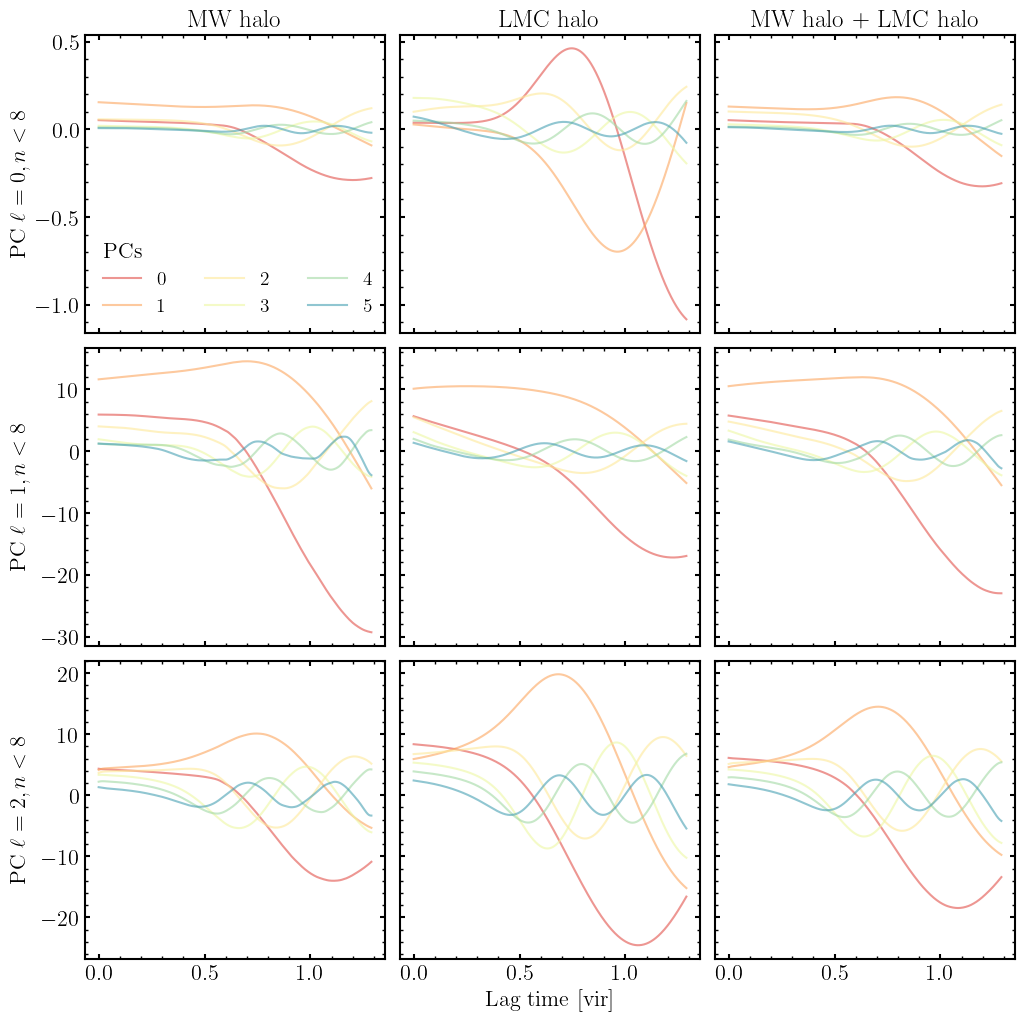

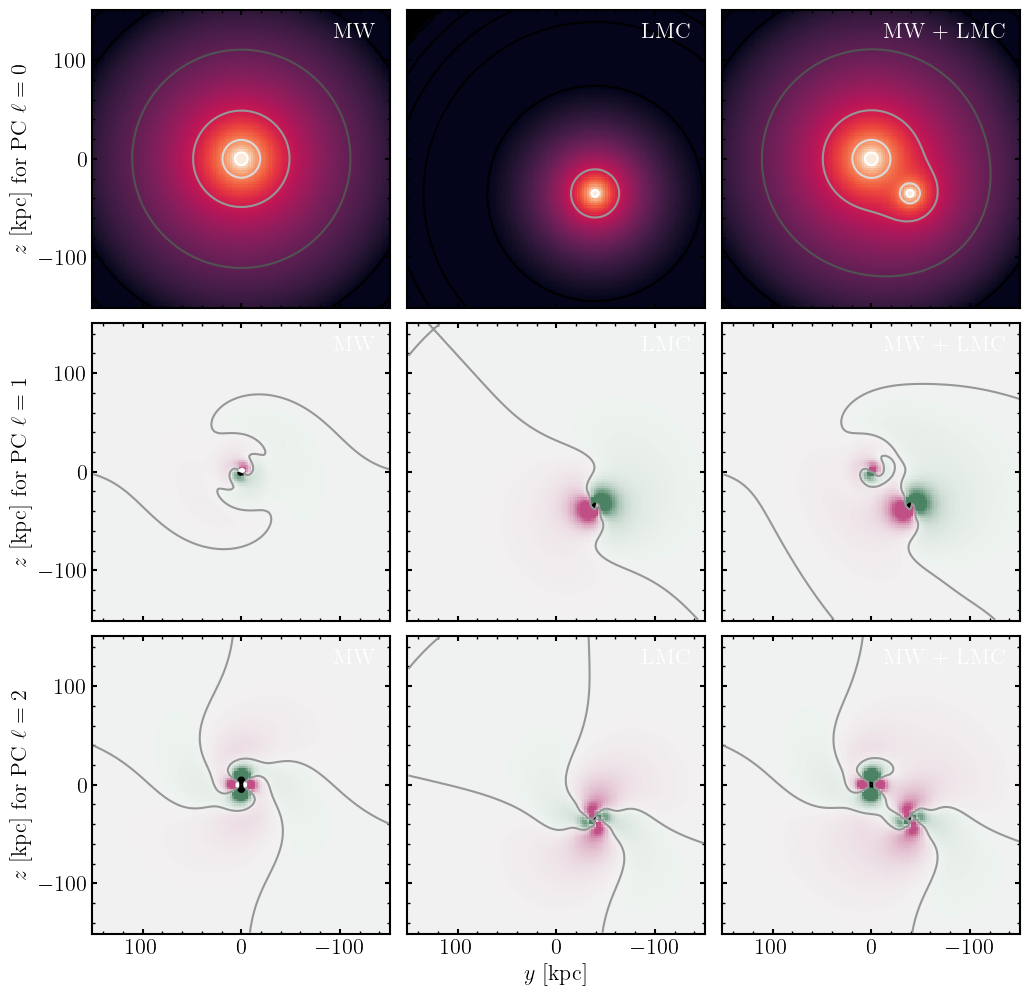

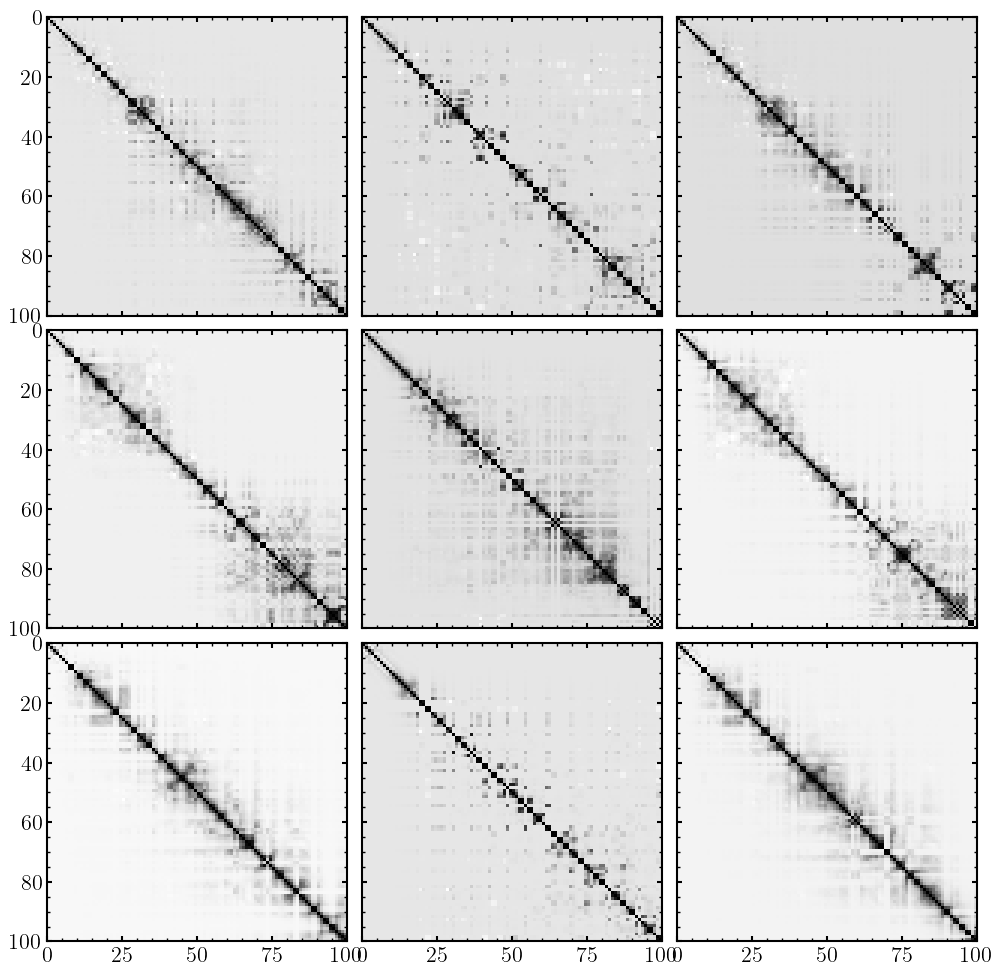

In [ ]:
# more entries here: MW halo MW disc, LMC halo LMC disc; each with coeffs and keylists; made keylist MW: m=6, disc m=4; LMC to 6 in both)
max_r_order = 8

plt.ion()

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
# verbose: false
...
"""

window = int(len(mwhalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]

gal_combs = [['MW halo'], ['LMC halo'], ['MW halo', 'LMC halo']]

# gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
#             'LMC halo': [lmchalo_coefs, lmchbasis, lmchcenter]}


##
size = 150./virialradius
npix = 128

times_vir = mwhalo_coefs.Times()
# tref_vir = 1.7008
# itref = np.where(lmchcenter['t'] >= tref_vir)[0][0]
tref_vir = times_vir[np.where(times_vir>=tref)[0][0]]
itref = np.where(lmchcenter['t'] >= tref)[0][0]
print(tref_vir)
print(itref)

pmin  = [0.0, -size,  -size]
pmax  = [0.0, size, size]
grid  = [ 0,  npix,  npix]

## set up figures
fig, ax = plt.subplots(len(orders), len(gal_combs), figsize=(12, 12), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
fig2, ax2 = plt.subplots(len(orders), len(gal_combs), figsize=(12, 12), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
fig3, ax3 = plt.subplots(len(orders), len(gal_combs), figsize=(12, 12), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

cmap = sns.color_palette("rocket", as_cmap=True)
N = cmap.N
cmap.set_under(cmap(1))
cmap.set_over(cmap(N-1))
densmin = 1e5
densmax = 1
vmin={orders[0][0]: 1e3, orders[1][0]: -1e5, orders[2][0]: -1e5} # minima near orders[1][0]: -1e6, orders[2][0]: -5e6
vmax={orders[0][0]: 1e7, orders[1][0]: 1e5, orders[2][0]: 1e5} # maxima near  orders[1][0]: 1e7, orders[2][0]: 3e8
norms={
    orders[0][0]: colors.LogNorm(vmin=vmin[orders[0][0]], vmax=vmax[orders[0][0]]),
    orders[1][0]: colors.TwoSlopeNorm(vcenter=0., vmin=vmin[orders[1][0]], vmax=vmax[orders[1][0]]),
    orders[2][0]: colors.TwoSlopeNorm(vcenter=0., vmin=vmin[orders[2][0]], vmax=vmax[orders[2][0]])
}
cmaps = {
    orders[0][0]: cmap,
    orders[1][0]: sns.diverging_palette(145, 345, s=60, as_cmap=True),  
    orders[2][0]: sns.diverging_palette(145, 345, s=60, as_cmap=True)
}
levels = np.logspace(3,7,endpoint=True,num=9)


for i, order in enumerate(orders):
    for j, gals in enumerate(gal_combs):
        print(f"order: {order}") 
        mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
        lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
        
        gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                    'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr]}
        
        mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
        lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
        mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
        lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
        
        config = {
            "MW halo": (mwhalo_coefs, mwh_keys, []),
            "LMC halo": (lmchalo_coefs, lmch_keys, []),
                } 
        
    
        subconfig = {key: config[key] for key in gals}
        print(subconfig)
        startTime = time.time()
        ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
        ev = ssa.eigenvalues() # do the decomposition (expensive step)
        pc = ssa.getPC() # also triggers the expensive step
        
        

                    
        # reconstruct here
        ssa.reconstruct([*range(npc)])
        
        corr_mat = ssa.wCorrAll()
        ax3[i,j].pcolormesh(corr_mat, cmap=plt.cm.Greys)
        ax3[i,j].set_ylim(npc,0)
        if np.sum(corr_mat) == npc:
            print("All diagonal elements are 1.")
        else:
            print(f"In {order} for {gals}, there are off-diagonal elements.")
    

        ax[i,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
        
        ax2[i,0].set_ylabel(rf'$z$ [kpc] for PC $\ell={order[0]}$')

        rows, cols = pc.shape
        for k in range(min(cols,6)):
            if pc[0,k] < 0:
                sgn = -1
            else:
                sgn = 1
            ax[i, j].plot(times_vir[0:rows], sgn*pc[:,k], '-', label="{:d}".format(k), alpha=0.6)



        if False:
            subconfig2 = {key: full_config[key] for key in gals}
            startTime = time.time()
            ssa = pyEXP.mssa.expMSSA(subconfig2, window, npc, flags)
            ev = ssa.eigenvalues() # do the decomposition (expensive step)
            pc = ssa.getPC() # also triggers the expensive step
            print(f'Computed l={order},n=20 eigenvalues and PCs for {gals} in {time.time() - startTime:6.2f} seconds.')

            rows, cols = pc.shape
            for k in range(min(cols,6)):
                if pc[0,k] < 0:
                    sgn = -1
                else:
                    sgn = 1
                full_lines = ax[i, j].plot(times[0:rows], sgn*pc[:,k], '--', alpha=0.6)

        # Loop over galaxies
        title = ""
        
        for l, gal in enumerate(gals):
            print(order, l, gal)

            
            coefs, basis, center = gal_dict[gal]
            coefs.zerodata() 
            reconstruct = ssa.getReconstructed()[gal]
            
            print(coefs.Power())

            title += f'{gal.split(' ')[0]}'
            if len(gals)>1 and l == 0:
                title += ' + '


            fields = pyEXP.field.FieldGenerator([tref_vir], pmin, pmax, grid)    
            surfaces = fields.slices(basis, reconstruct)
            
            # make lmc field if necessary, needs to be shifted by LMC center
            if gal == 'LMC halo':
                
                center_tmp = np.array([center['x'][itref], center['y'][itref], center['z'][itref]])
                pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
                pmax_tmp  = [0.0, float(size-center_tmp[1]), float(size-center_tmp[2])]
                # print(center_tmp*virialradius)
                fields = pyEXP.field.FieldGenerator([tref_vir], pmin_tmp, pmax_tmp, grid)
                surfaces = fields.slices(basis, reconstruct)

            keys = list(surfaces.keys())

            if l == 0:
                print('l=0')
                nx = surfaces[keys[0]]['dens'].shape[0]
                ny = surfaces[keys[0]]['dens'].shape[1]            
                # Make the mesh
                x = np.linspace(pmin[1], pmax[1], nx)
                y = np.linspace(pmin[2], pmax[2], ny)
                xv, yv = np.meshgrid(x, y)    
                mat = surfaces[tref_vir]['dens'] * massscale / pow(virialradius,3)
                
            else:
                mat += surfaces[tref_vir]['dens'] * massscale / pow(virialradius,3)
                
            
        print(np.min(mat), np.max(mat))
        cont1 = ax2[i, j].contour(xv*virialradius, yv*virialradius, 
                                mat.transpose(), 
                                norm=norms[order[0]],
                                cmap=plt.cm.Greys_r, 
                                )
        cont2 = ax2[i, j].pcolormesh(xv*virialradius, yv*virialradius, 
                                    mat.transpose(),
                                    norm=norms[order[0]],
                                    cmap=cmaps[order[0]],
                                    )

        ax2[i, j].text(0.95, 0.925, title, horizontalalignment='right', 
                 verticalalignment='center', transform=ax2[i,j].transAxes, c= 'white', fontsize = 16)

    
        ax2[i, j].invert_xaxis()
        ax2[i, j].set_aspect('equal')
        ax2[i, j].set_facecolor('k')
        
    # break

ax[0,0].legend(ncols=3, fontsize=14, frameon=False, title='PCs', alignment='left')

ax[-1,1].set_xlabel('Lag time [vir]')

ax[0,0].set_title("MW halo")
ax[0,1].set_title("LMC halo")
ax[0,2].set_title("MW halo + LMC halo")

fig.align_ylabels()

# # same for ax2
ax2[-1,1].set_xlabel('$y$ [kpc]')
# ax2[0,0].set_title("MW halo")
# ax2[0,1].set_title("LMC halo")
# ax2[0,2].set_title("MW halo + LMC halo")
fig2.align_ylabels()



plt.show()


In [ ]:
# make nice movie
# more entries here: MW halo MW disc, LMC halo LMC disc; each with coeffs and keylists; made keylist MW: m=6, disc m=4; LMC to 6 in both)
max_r_order = 8

plt.ion()

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
# verbose: false
...
"""

window = int(len(mwhalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]

gal_combs = [['MW halo'], ['LMC halo'], ['MW halo', 'LMC halo']]

##
size = 150./virialradius
npix = 128

times_vir = mwhalo_coefs.Times()
times = mwhalo_coefs.Times()
# tref_vir = 1.7008
# itref = np.where(lmchcenter['t'] >= tref_vir)[0][0]
tref_vir = times_vir[np.where(times_vir>=tref)[0][0]]
itref = np.where(lmchcenter['t'] >= tref)[0][0]
times_phys = timescale * (np.array(times)-tref)


pmin  = [0.0, -size,  -size]
pmax  = [0.0, size, size]
grid  = [ 0,  npix,  npix]

## set up figures

cmap = sns.color_palette("rocket", as_cmap=True)
N = cmap.N
cmap.set_under(cmap(1))
cmap.set_over(cmap(N-1))
densmin = 1e5
densmax = 1
vmin={orders[0][0]: 1e3, orders[1][0]: -1e5, orders[2][0]: -1e5} # minima near orders[1][0]: -1e6, orders[2][0]: -5e6
vmax={orders[0][0]: 1e7, orders[1][0]: 1e5, orders[2][0]: 1e5} # maxima near  orders[1][0]: 1e7, orders[2][0]: 3e8
norms={
    orders[0][0]: colors.LogNorm(vmin=vmin[orders[0][0]], vmax=vmax[orders[0][0]]),
    orders[1][0]: colors.TwoSlopeNorm(vcenter=0., vmin=vmin[orders[1][0]], vmax=vmax[orders[1][0]]),
    orders[2][0]: colors.TwoSlopeNorm(vcenter=0., vmin=vmin[orders[2][0]], vmax=vmax[orders[2][0]])
}
cmaps = {
    orders[0][0]: cmap,
    orders[1][0]: sns.diverging_palette(145, 345, s=60, as_cmap=True),  
    orders[2][0]: sns.diverging_palette(145, 345, s=60, as_cmap=True)
}
tc = {
    orders[0][0]: 'white',
    orders[1][0]: 'k',  
    orders[2][0]: 'k'
}
levels = np.logspace(3,7,endpoint=True,num=9)



#calculate all ssas
ssas = {'MW halo': {}, 'LMC halo': {}, 'both': {}}    

for i, order in enumerate(orders):
    for j, gals in enumerate(gal_combs):
        # print(f"order: {order}") 
        mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
        lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
        
        gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                    'LMC halo': [lmchalo_coefs, lmchbasis, lmchcenter]}
        
        mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
        lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
        mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
        lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
        
        config = {
            "MW halo": (mwhalo_coefs, mwh_keys, []),
            "LMC halo": (lmchalo_coefs, lmch_keys, []),
                } 
        
    
        subconfig = {key: config[key] for key in gals}
        # print(subconfig)
        startTime = time.time()
        ssa_key = gals
        if len(gals) > 1:
            gals= 'both'
        else:
            gals = gals[0]
            
        print(gals)
        ssas[gals][order[0]] = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
        ev = ssas[gals][order[0]].eigenvalues() # do the decomposition (expensive step)
        pc = ssas[gals][order[0]].getPC() # also triggers the expensive step
        
        

                    
        # reconstruct here
        print(f'reconstructing {gals} for order {order[0]}')
        ssas[gals][order[0]].reconstruct([*range(10)])
       


MW halo
reconstructing MW halo for order 0
shape U = 6440 x 806
shape Y = 806 x 6440
LMC halo
shape U = reconstructing LMC halo for order 0
6440 x 806
shape Y = 806 x 6440
both
shape U = 12880 x 806reconstructing both for order 0

shape Y = 806 x 12880
MW halo
shape U = 19320 x 806
reconstructing MW halo for order 1
shape Y = 806 x 19320
LMC halo
shape U = reconstructing LMC halo for order 1
19320 x 806
shape Y = 806 x 19320
both
shape U = 38640 x 806
shape Y = 806 x 38640
reconstructing both for order 1
MW halo
shape U = reconstructing MW halo for order 2
32200 x 806
shape Y = 806 x 32200
LMC halo
reconstructing LMC halo for order 2shape U = 32200 x 806
shape Y = 806 x 32200

both
shape U = reconstructing both for order 2
64400 x 806
shape Y = 806 x 64400


In [ ]:
ssas['MW halo'][0].getReconstructed()['MW halo'].Power()

array([[2.78746161e+01, 1.56009985e-07, 4.93344962e-08, ...,
        2.57922319e-08, 3.53889506e-08, 2.50443108e-08],
       [2.78746376e+01, 1.30921722e-07, 1.68726879e-06, ...,
        2.29282281e-07, 3.10856891e-08, 6.52454937e-08],
       [2.78746585e+01, 1.10535080e-07, 2.21820753e-05, ...,
        2.46330501e-06, 2.67471856e-08, 5.11027503e-07],
       ...,
       [2.78405717e+01, 4.12003309e-02, 1.31242494e-03, ...,
        5.73214651e-05, 1.06525422e-05, 6.09980028e-06],
       [2.78396044e+01, 4.14455622e-02, 1.31638879e-03, ...,
        5.64903132e-05, 1.07293538e-05, 6.07515371e-06],
       [2.78386112e+01, 4.21672981e-02, 1.29948533e-03, ...,
        5.54949902e-05, 1.06333672e-05, 6.11935460e-06]])

In [ ]:
ssas['MW halo'][2].getReconstructed()['MW halo'].Power()

array([[2.78879012e+01, 1.56009985e-07, 2.44462338e-03, ...,
        2.57922319e-08, 3.53889506e-08, 2.50443108e-08],
       [2.78877171e+01, 1.30921722e-07, 2.47428515e-03, ...,
        2.29282281e-07, 3.10856891e-08, 6.52454937e-08],
       [2.78872426e+01, 1.10535080e-07, 2.50440912e-03, ...,
        2.46330501e-06, 2.67471856e-08, 5.11027503e-07],
       ...,
       [2.78194696e+01, 4.12003309e-02, 1.37813199e-03, ...,
        5.73214651e-05, 1.06525422e-05, 6.09980028e-06],
       [2.78175380e+01, 4.14455622e-02, 1.37433726e-03, ...,
        5.64903132e-05, 1.07293538e-05, 6.07515371e-06],
       [2.78151826e+01, 4.21672981e-02, 1.36976757e-03, ...,
        5.54949902e-05, 1.06333672e-05, 6.11935460e-06]])

t = -0.7364084033613444


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


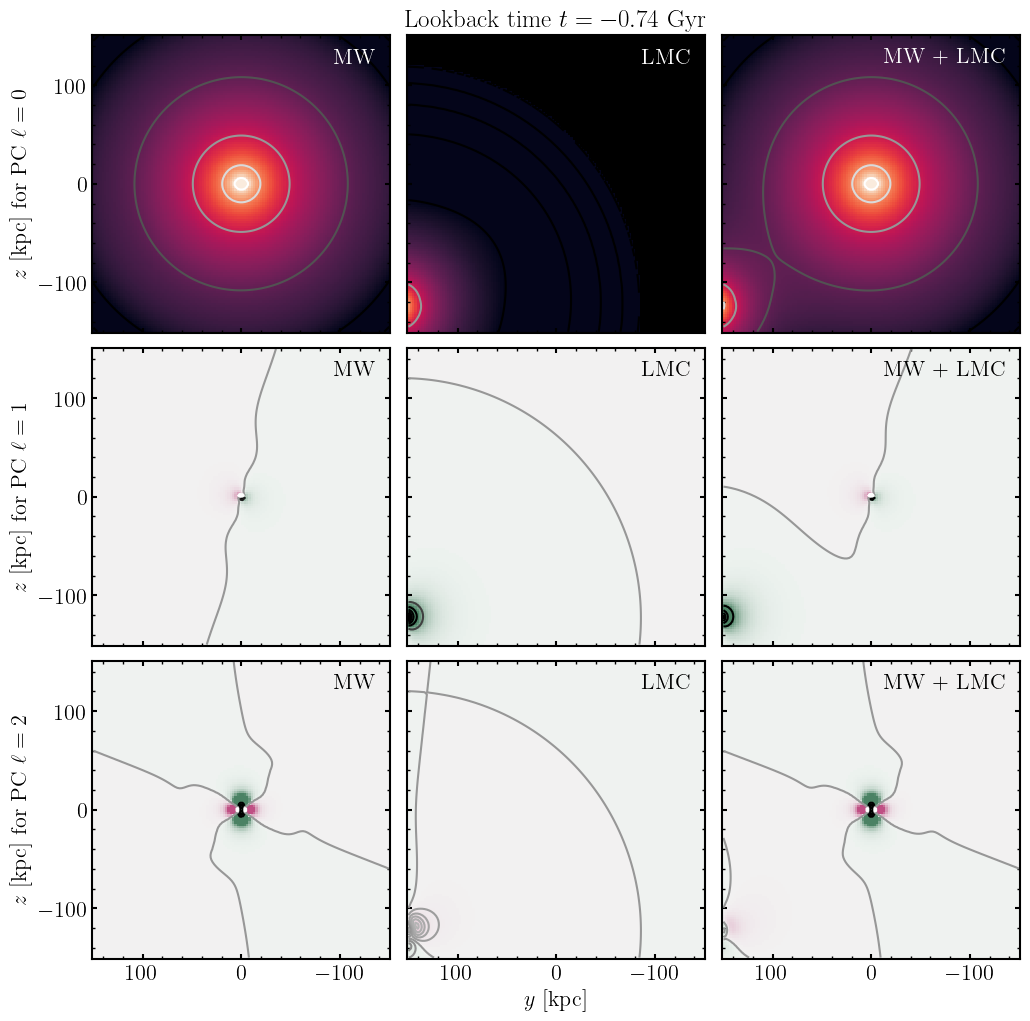

t = -0.7347680672268906


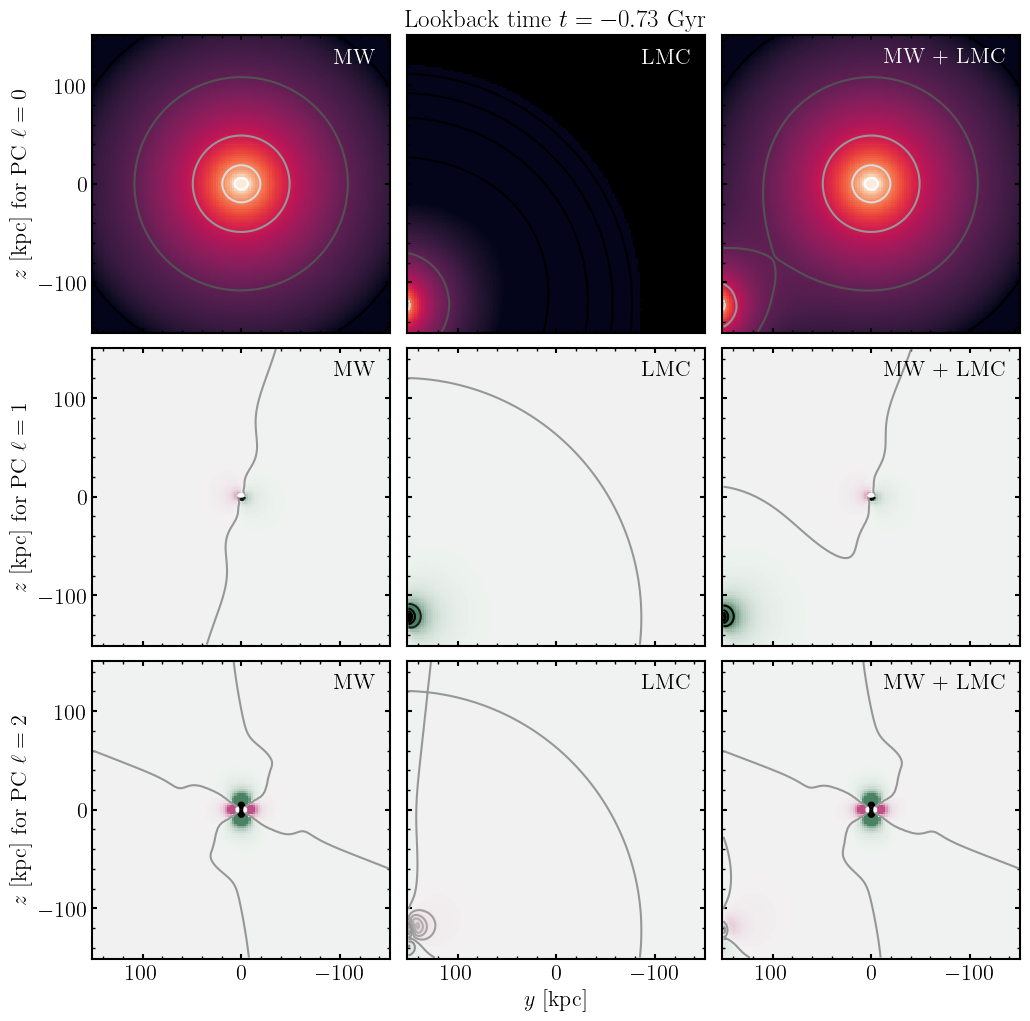

t = -0.7331277310924368
t = -0.7314873949579832
t = -0.7298470588235293
t = -0.7282067226890755
t = -0.7265663865546217
t = -0.7249260504201679
t = -0.7232857142857142
t = -0.7216453781512604
t = -0.7200050420168066
t = -0.7183647058823528
t = -0.7167243697478989
t = -0.7150840336134453
t = -0.7134436974789915
t = -0.7118033613445377
t = -0.7101630252100838
t = -0.7085226890756302
t = -0.7068823529411764
t = -0.7052420168067226
t = -0.7036016806722688
t = -0.7019613445378149
t = -0.7003210084033613
t = -0.6986806722689075
t = -0.6970403361344537
t = -0.6953999999999998
t = -0.693759663865546
t = -0.6921193277310924
t = -0.6904789915966386
t = -0.6888386554621847
t = -0.6871983193277309
t = -0.6855579831932771
t = -0.6839176470588235
t = -0.6822773109243697
t = -0.6806369747899158
t = -0.678996638655462
t = -0.6773563025210082
t = -0.6757159663865546
t = -0.6740756302521007
t = -0.6724352941176469
t = -0.6707949579831931
t = -0.6691546218487393
t = -0.6675142857142856
t = -0.66587394957

/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.6511109243697478
t = -0.649470588235294
t = -0.6478302521008402
t = -0.6461899159663863
t = -0.6445495798319327
t = -0.6429092436974789


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.6412689075630251
t = -0.6396285714285713
t = -0.6379882352941174
t = -0.6363478991596638
t = -0.63470756302521
t = -0.6330672268907562


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.6314268907563023
t = -0.6297865546218485
t = -0.6281462184873949
t = -0.6265058823529411
t = -0.6248655462184872
t = -0.6232252100840334


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.6215848739495796
t = -0.619944537815126
t = -0.6183042016806722
t = -0.6166638655462183
t = -0.6150235294117645
t = -0.6133831932773107
t = -0.6117428571428571


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.6101025210084032
t = -0.6084621848739494
t = -0.6068218487394956
t = -0.605181512605042
t = -0.6035411764705881
t = -0.6019008403361343


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.6002605042016805
t = -0.5986201680672267
t = -0.5969798319327732
t = -0.5953394957983192
t = -0.5936991596638654
t = -0.5920588235294116


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.5904184873949578
t = -0.5887781512605041
t = -0.5871378151260503
t = -0.5854974789915965
t = -0.5838571428571427
t = -0.5822168067226888


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.5805764705882352
t = -0.5789361344537814
t = -0.5772957983193276
t = -0.5756554621848737
t = -0.5740151260504199
t = -0.5723747899159664


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.5707344537815126
t = -0.5690941176470588
t = -0.5674537815126048
t = -0.565813445378151
t = -0.5641731092436975
t = -0.5625327731092437


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.5608924369747897
t = -0.5592521008403359
t = -0.5576117647058821
t = -0.5559714285714286
t = -0.5543310924369746
t = -0.5526907563025208


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.551050420168067
t = -0.5494100840336135
t = -0.5477697478991597
t = -0.5461294117647058
t = -0.544489075630252
t = -0.5428487394957981


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.5412084033613446
t = -0.5395680672268907
t = -0.5379277310924369
t = -0.536287394957983
t = -0.5346470588235293
t = -0.5330067226890756


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.5313663865546218
t = -0.529726050420168
t = -0.5280857142857142
t = -0.5264453781512602
t = -0.5248050420168067
t = -0.5231647058823529


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.5215243697478991
t = -0.5198840336134453
t = -0.5182436974789913
t = -0.5166033613445378
t = -0.514963025210084
t = -0.5133226890756302


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.5116823529411763
t = -0.5100420168067225
t = -0.5084016806722689
t = -0.5067613445378151
t = -0.5051210084033612
t = -0.5034806722689074
t = -0.5018403361344538


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.5002
t = -0.4985596638655461
t = -0.4969193277310923
t = -0.49527899159663846
t = -0.4936386554621849
t = -0.491998319327731


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.4903579831932772
t = -0.48871764705882337
t = -0.48707731092436957
t = -0.48543697478991593
t = -0.48379663865546213
t = -0.4821563025210083


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.48051596638655447
t = -0.47887563025210067
t = -0.47723529411764704
t = -0.47559495798319323
t = -0.4739546218487394
t = -0.4723142857142856


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.4706739495798317
t = -0.46903361344537814
t = -0.4673932773109243
t = -0.4657529411764705
t = -0.4641126050420166
t = -0.4624722689075628


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.4608319327731092
t = -0.4591915966386554
t = -0.4575512605042016
t = -0.4559109243697477
t = -0.45427058823529415
t = -0.4526302521008403


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.4509899159663865
t = -0.44934957983193263
t = -0.44770924369747883
t = -0.4460689075630252
t = -0.4444285714285714
t = -0.44278823529411754


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.44114789915966374
t = -0.4395075630252099
t = -0.4378672268907563
t = -0.4362268907563025
t = -0.43458655462184864
t = -0.43294621848739484


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.431305882352941
t = -0.4296655462184874
t = -0.42802521008403355
t = -0.42638487394957975
t = -0.4247445378151259
t = -0.4231042016806721


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.42146386554621845
t = -0.41982352941176465
t = -0.4181831932773108
t = -0.416542857142857
t = -0.41490252100840314
t = -0.41326218487394956


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.41162184873949575
t = -0.4099815126050419
t = -0.4083411764705881
t = -0.40670084033613424
t = -0.40506050420168066
t = -0.4034201680672268
t = -0.401779831932773


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.40013949579831914
t = -0.39849915966386557
t = -0.3968588235294117
t = -0.3952184873949579
t = -0.39357815126050405
t = -0.39193781512605025


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.39029747899159667
t = -0.3886571428571428
t = -0.387016806722689
t = -0.38537647058823515
t = -0.38373613445378135
t = -0.3820957983193277


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.3804554621848739
t = -0.37881512605042006
t = -0.37717478991596626
t = -0.3755344537815124
t = -0.3738941176470588
t = -0.37225378151260496


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.37061344537815116
t = -0.3689731092436973
t = -0.3673327731092435
t = -0.3656924369747899
t = -0.36405210084033607
t = -0.36241176470588227


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.3607714285714284
t = -0.3591310924369746
t = -0.357490756302521
t = -0.35585042016806717
t = -0.3542100840336133
t = -0.3525697478991595


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.3509294117647059
t = -0.3492890756302521
t = -0.3476487394957982
t = -0.3460084033613444
t = -0.34436806722689056
t = -0.342727731092437


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.3410873949579832
t = -0.3394470588235293
t = -0.3378067226890755
t = -0.33616638655462167
t = -0.3345260504201681
t = -0.33288571428571423


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.33124537815126043
t = -0.32960504201680657
t = -0.32796470588235277
t = -0.32632436974789913
t = -0.32468403361344533
t = -0.3230436974789915


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.3214033613445377
t = -0.3197630252100839
t = -0.31812268907563024
t = -0.31648235294117644
t = -0.3148420168067226
t = -0.3132016806722688


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.3115613445378149
t = -0.30992100840336134
t = -0.3082806722689075
t = -0.3066403361344537
t = -0.3049999999999998
t = -0.303359663865546


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.3017193277310924
t = -0.3000789915966386
t = -0.2984386554621848
t = -0.29679831932773093
t = -0.29515798319327735
t = -0.2935176470588235
t = -0.2918773109243697


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.29023697478991584
t = -0.28859663865546203
t = -0.2869563025210084
t = -0.2853159663865546
t = -0.28367563025210074
t = -0.28203529411764694


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.2803949579831931
t = -0.2787546218487395
t = -0.2771142857142857
t = -0.27547394957983184
t = -0.27383361344537804
t = -0.2721932773109242


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.2705529411764706
t = -0.26891260504201675
t = -0.26727226890756295
t = -0.2656319327731091
t = -0.2639915966386553
t = -0.26235126050420166


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.26071092436974785
t = -0.259070588235294
t = -0.2574302521008402
t = -0.25578991596638634
t = -0.25414957983193276
t = -0.25250924369747896


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.2508689075630251
t = -0.24922857142857127
t = -0.24758823529411766
t = -0.24594789915966384
t = -0.24430756302521
t = -0.24266722689075618


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.24102689075630235
t = -0.23938655462184877
t = -0.23774621848739494
t = -0.2361058823529411
t = -0.23446554621848728
t = -0.23282521008403345


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.23118487394957984
t = -0.22954453781512602
t = -0.22790420168067219
t = -0.22626386554621836
t = -0.22462352941176453
t = -0.22298319327731092


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.2213428571428571
t = -0.21970252100840326
t = -0.21806218487394946
t = -0.21642184873949563
t = -0.21478151260504202
t = -0.2131411764705882


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.21150084033613437
t = -0.20986050420168054
t = -0.2082201680672267
t = -0.2065798319327731
t = -0.20493949579831927
t = -0.20329915966386544


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.2016588235294116
t = -0.20001848739495778
t = -0.19837815126050418
t = -0.19673781512605037
t = -0.19509747899159655
t = -0.19345714285714272
t = -0.1918168067226891


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.19017647058823528
t = -0.18853613445378145
t = -0.18689579831932762
t = -0.1852554621848738
t = -0.18361512605042019
t = -0.18197478991596636


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.18033445378151253
t = -0.1786941176470587
t = -0.17705378151260487
t = -0.1754134453781513
t = -0.17377310924369746
t = -0.17213277310924363


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.1704924369747898
t = -0.16885210084033597
t = -0.16721176470588237
t = -0.16557142857142854
t = -0.1639310924369747
t = -0.16229075630252088


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.16065042016806705
t = -0.15901008403361344
t = -0.1573697478991596
t = -0.15572941176470578
t = -0.15408907563025195
t = -0.15244873949579812


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.15080840336134455
t = -0.14916806722689072
t = -0.1475277310924369
t = -0.14588739495798306
t = -0.14424705882352945
t = -0.14260672268907562


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.1409663865546218
t = -0.13932605042016796
t = -0.13768571428571413
t = -0.13604537815126053
t = -0.1344050420168067
t = -0.13276470588235287


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.13112436974789904
t = -0.1294840336134452
t = -0.12784369747899163
t = -0.1262033613445378
t = -0.12456302521008396
t = -0.12292268907563013


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.1212823529411763
t = -0.1196420168067227
t = -0.11800168067226888
t = -0.11636134453781505
t = -0.11472100840336122
t = -0.11308067226890739


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.1114403361344538
t = -0.10979999999999997
t = -0.10815966386554614
t = -0.10651932773109231
t = -0.10487899159663848
t = -0.10323865546218487


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.10159831932773104
t = -0.09995798319327721
t = -0.0983176470588234
t = -0.09667731092436957
t = -0.09503697478991596
t = -0.09339663865546213
t = -0.0917563025210083


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.09011596638655447
t = -0.08847563025210088
t = -0.08683529411764705
t = -0.08519495798319322
t = -0.0835546218487394
t = -0.08191428571428556


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.08027394957983196
t = -0.07863361344537813
t = -0.07699327731092431
t = -0.07535294117647048
t = -0.07371260504201665
t = -0.07207226890756305


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.07043193277310922
t = -0.06879159663865539
t = -0.06715126050420156
t = -0.06551092436974773
t = -0.06387058823529414
t = -0.06223025210084031


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.06058991596638648
t = -0.05894957983193265
t = -0.05730924369747882
t = -0.05566890756302522
t = -0.05402857142857139
t = -0.05238823529411756


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.05074789915966373
t = -0.04910756302520991
t = -0.0474672268907563
t = -0.04582689075630248
t = -0.04418655462184865
t = -0.04254621848739482


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.04090588235294122
t = -0.03926554621848739
t = -0.037625210084033564
t = -0.035984873949579735
t = -0.034344537815125906
t = -0.032704201680672305


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.03106386554621848
t = -0.02942352941176465
t = -0.02778319327731082
t = -0.026142857142856992
t = -0.024502521008403392
t = -0.022862184873949563


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.021221848739495737
t = -0.019581512605041908
t = -0.01794117647058808
t = -0.01630084033613448
t = -0.01466050420168065
t = -0.013020168067226822


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.011379831932772993
t = -0.009739495798319165
t = -0.008099159663865565
t = -0.006458823529411736
t = -0.004818487394957907
t = -0.003178151260504079


/tmp/ipykernel_25370/2343667851.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
/tmp/ipykernel_25370/2343667851.py:117: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius,


t = -0.0015378151260502506
t = 0.00010252100840335004


In [ ]:
gals2 = ['MW halo', 'LMC halo', 'both']
pmin  = [0.0, -size,  -size]
pmax  = [0.0, size, size]
grid  = [ 0,  npix,  npix]
counter = 0

times = mwhalo_coefs.Times()

times_phys = timescale * (np.array(times)-tref)

for it, t in enumerate(times_vir):
    if t < 1.:
        continue
    if t > tref_vir:
        break
    fig, ax = plt.subplots(len(orders), len(gal_combs), figsize=(12, 12), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
    tmask = mwhcenter['t'] == t
    if t==0.0:
        continue
    if sum(tmask) > 1: 
        tmask[np.where(tmask)[0][1:]]=False
        
    print('t =', times_phys[it])
    for i, order in enumerate(orders):
        for j, gals in enumerate(gal_combs):
            # print(f"order: {order}") 
            # print(gals)
            mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
            lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
            
            gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                        'LMC halo': [lmchalo_coefs, lmchbasis, lmccenter_corr]}
            
            mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
            lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
            mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
            lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
            
            config = {
                "MW halo": (mwhalo_coefs, mwh_keys, []),
                "LMC halo": (lmchalo_coefs, lmch_keys, []),
                    } 
            
        
            # subconfig = {key: config[key] for key in gals}
            # print(subconfig)
            # startTime = time.time()
            # ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
            # ev = ssa.eigenvalues() # do the decomposition (expensive step)
            # pc = ssa.getPC() # also triggers the expensive step
            
            # ssas[gals2[j]][order[0]].reconstruct([*range(6)])
              
            # # reconstruct here
            # ssa.reconstruct([*range(npc)])

            
            ax[i,0].set_ylabel(rf'$z$ [kpc] for PC $\ell={order[0]}$')


            # Loop over galaxies
            title = ""
            
            for l, gal in enumerate(gals):
                # print(order, l, gal)

                    
                
                coefs, basis, center = gal_dict[gal]
                if order[0] == 0:
                    reconstruct = coefs
                else: 
                    # print(f'updating coefs for {gals2[j]} order {order[0]}')
                    reconstruct = ssas[gals2[j]][order[0]].getReconstructed()[gal]
                    reconstruct.zerodata()
                    ssas[gals2[j]][order[0]].getReconstructed()[gal]
                    # coefs.zerodata() 
                    # reconstruct = ssas[gals2[j]][order[0]].getReconstructed()[gal]
                
                    # print(reconstruct.Power())

                title += f'{gal.split(' ')[0]}'
                if len(gals)>1 and l == 0:
                    title += ' + '


                fields = pyEXP.field.FieldGenerator([t], pmin, pmax, grid)    
                surfaces = fields.slices(basis, reconstruct)
                
                # make lmc field if necessary, needs to be shifted by LMC center
                if gal == 'LMC halo':
                    
                    center_tmp = np.array([center['x'][tmask], center['y'][tmask], center['z'][tmask]])
                    pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
                    pmax_tmp  = [0.0, float(size-center_tmp[1]), float(size-center_tmp[2])]
                    # print(center_tmp*virialradius)
                    fields = pyEXP.field.FieldGenerator([t], pmin_tmp, pmax_tmp, grid)
                    surfaces = fields.slices(basis, reconstruct)

                keys = list(surfaces.keys())

                if l == 0:
                    # print('l=0')
                    nx = surfaces[keys[0]]['dens'].shape[0]
                    ny = surfaces[keys[0]]['dens'].shape[1]            
                    # Make the mesh
                    x = np.linspace(pmin[1], pmax[1], nx)
                    y = np.linspace(pmin[2], pmax[2], ny)
                    xv, yv = np.meshgrid(x, y)    
                    mat = surfaces[t]['dens'] * massscale / pow(virialradius,3)
                    
                else:
                    mat += surfaces[t]['dens'] * massscale / pow(virialradius,3)
                    
                
            # print(np.min(mat), np.max(mat))
            cont1 = ax[i, j].contour(xv*virialradius, yv*virialradius, 
                                    mat.transpose(), 
                                    norm=norms[order[0]],
                                    cmap=plt.cm.Greys_r, 
                                    )
            cont2 = ax[i, j].pcolormesh(xv*virialradius, yv*virialradius, 
                                        mat.transpose(),
                                        norm=norms[order[0]],
                                        cmap=cmaps[order[0]],
                                        )

            ax[i, j].text(0.95, 0.925, title, horizontalalignment='right', 
                    verticalalignment='center', transform=ax[i,j].transAxes, c= tc[order[0]], fontsize = 16)

        
            ax[i, j].invert_xaxis()
            ax[i, j].set_aspect('equal')
            ax[i, j].set_facecolor('k')
            
    # break

    # # same for ax2
    ax[-1,1].set_xlabel('$y$ [kpc]')
    # ax2[0,0].set_title("MW halo")
    ax[0,1].set_title(f"Lookback time $t = {times_phys[it]:.2f}$ Gyr")
    # ax2[0,2].set_title("MW halo + LMC halo")
    fig.align_ylabels()
    fig.savefig(f'{datadir}/plots/{runtag}/mwlmc_mssa_reconstructions_{it}.png')

    if counter < 2:
        plt.show()
    else: 
        plt.close()

    # if counter >2:
    #     break
    counter +=1
     

In [ ]:
# let's make the video 
import cv2 as cv
import glob
import re

### this function sorts your input files numerically (0,1,,...9,10,11...99, 100,...)
def sorted_nicely( l ):
    """Sorts the given iterable in the way that is expected.
        Required arguments:
        l -- The iterable to be sorted
    """

    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)
    
### prepare file list and load images
    
# read in files
files = [f for f in glob.glob(f'{datadir}/plots/{runtag}/mwlmc_mssa_reconstructions_*.png', recursive=True)] # images saved as png
files = sorted_nicely(files)

# files = files[624:]

img = cv.imread(cv.samples.findFile(files[0]))
rows, cols = img.shape[:2]


fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter(f'{datadir}/plots/{runtag}/reconstruction_{runtag}_yz.mp4', fourcc, 20.0, (cols, rows))
out2 = cv.VideoWriter(f'{datadir}/plots/{runtag}/reconstruction_{runtag}_yz.avi', fourcc, 20.0, (cols, rows))

for file in files:
    img = cv.imread(cv.samples.findFile(file))
    rows, cols = img.shape[:2]
    out.write(img)
    out2.write(img)
     
out.release() 
out2.release() 

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [ ]:
mwsphcoefs = ssas[gals2[j]][order[0]].getReconstructed()['MW halo']
mwsphcoefs.zerodata
reconstruct = ssas[gals2[j]][order[0]].getReconstructed()['MW halo']

In [ ]:
reconstruct = ssas[gals2[j]][order[0]].getReconstructed()['MW halo']

In [ ]:
ssas[gals2[j]][order[0]].getReconstructed()['MW halo'].Power()

array([[0.        , 0.        , 0.00235636, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00238938, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00242243, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00134685, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00134366, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00134042, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
reconstruct = ssas[gals2[j]][orders[1][0]].getReconstructed()['MW halo']


In [ ]:
reconstruct = ssas[gals2[j]][orders[1][0]].getReconstructed()['MW halo']
reconstruct.zerodata
ssas[gals2[j]][orders[1][0]].getReconstructed()['MW halo']



In [ ]:
reconstruct = ssas[gals2[j]][orders[1][0]].getReconstructed()['MW halo']
reconstruct.zerodata()
ssas[gals2[j]][orders[1][0]].getReconstructed()['MW halo']

reconstruct.Power()

array([[0.00000000e+00, 1.40220505e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.36655576e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.32780287e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.98993850e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.99355531e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.99847006e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
ssas[gals2[j]][orders[1][0]].getReconstructed()['MW halo'].Power()

array([[2.78879012e+01, 1.41386088e-06, 4.93344962e-08, ...,
        2.57922319e-08, 3.53889506e-08, 2.50443108e-08],
       [2.78877171e+01, 1.37654230e-06, 1.68726879e-06, ...,
        2.29282281e-07, 3.10856891e-08, 6.52454937e-08],
       [2.78872426e+01, 1.33605406e-06, 2.21820753e-05, ...,
        2.46330501e-06, 2.67471856e-08, 5.11027503e-07],
       ...,
       [2.78194696e+01, 4.03368750e-02, 1.31242494e-03, ...,
        5.73214651e-05, 1.06525422e-05, 6.09980028e-06],
       [2.78175380e+01, 4.03761750e-02, 1.31638879e-03, ...,
        5.64903132e-05, 1.07293538e-05, 6.07515371e-06],
       [2.78151826e+01, 4.04232057e-02, 1.29948533e-03, ...,
        5.54949902e-05, 1.06333672e-05, 6.11935460e-06]])

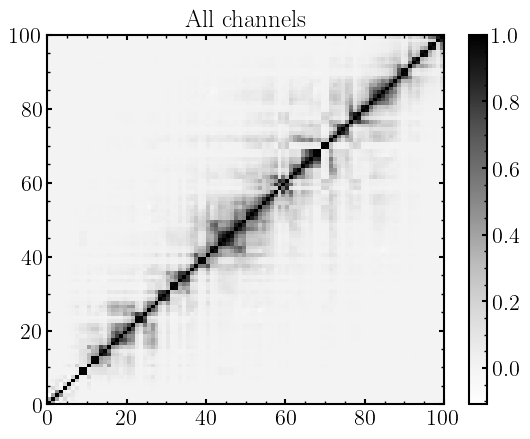

In [ ]:
x = plt.pcolormesh(corr_mat, cmap=plt.cm.Greys)
plt.title("All channels")
plt.colorbar(x)
plt.show()

In [ ]:
len(corr_mat.diagonal())

100

In [ ]:
coefs.zerodata() 
reconstruct = ssas[gals2[j]][order[0]].getReconstructed()[gal]

Docstring:
getReconstructed(self: pyEXP.mssa.expMSSA, reconstructmean: bool = True) -> dict[str, pyEXP.coefs.Coefs]


provide reconstructed time series

Parameters
----------
reconstructmean : bool, default=True
     include the detrended mean in the data channel reconstruction

Returns
-------
dict({id: Coefs},...)
     reconstructed time series in the original coefficient form

Notes
-----
The reconstructed data will overwrite the memory of the original coefficient 
data.  We suggest a deepcopy() if you wish to preserve the input coefficient db.

Setting 'reconstructmean=False' may be helpful to compare the variance between 
data channels.
Type:      method

In [ ]:
coefs.Power()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
itref = np.where(lmchcenter['t'] >= tref_vir)[0][0]

In [ ]:
lmchcenter['z'][itref]*virialradius

-44.27563

In [ ]:
# # make some reconstructions as it does not seem to be working in the for loop in the cell above
# # try MW LMC l=0 reconstructions
# order = [0]
# rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
# mwh_subcoefs = np.array(mwhalo_coefs.makeKeys(order))[rad_mask].tolist()[0][0]
# lmch_subcoefs = np.array(lmchalo_coefs.makeKeys(order))[rad_mask].tolist()[0][0]
# config = {
#     "MW halo": (mwhalo_coefs, mwh_subcoefs, []),
#     "LMC halo": (lmchalo_coefs, lmch_subcoefs, []),
#         } 
# startTime = time.time()
# ssa = pyEXP.mssa.expMSSA(config, window, npc, flags)
# ev = ssa.eigenvalues() # do the decomposition (expensive step)
# pc = ssa.getPC() # also triggers the expensive step
# print(f'\nComputed {order}, n={max_r_order} eigenvalues and PCs for {gals} in {time.time() - startTime:6.2f} seconds.')


In [ ]:
ssa.getReconstructed()['LMC halo'].Power()

array([[0.00000000e+00, 0.00000000e+00, 5.00285204e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00286317e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.35125568e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.37646188e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.37526480e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.36379464e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:

# # make reconstruction plot
# startTime = time.time()
# print('Calling reconstruction')
# ssa.reconstruct(order)
# print('Reconstruction took {:6.2f} seconds'.format(time.time() - startTime))


In [ ]:
# surfaces = fields.slices(mwhbasis, newdata['MW halo'])
# 

In [ ]:
# ssa.reconstruct([0])

In [ ]:
# ssa.getReconstructed()['LMC/ halo'] 

In [ ]:
# %%
# print("Window={} PC number={}".format(window, npc))



In [ ]:
# ev = ssa.eigenvalues() # do the decomposition (expensive step)
# print('Computed eigenvalues in {:6.2f} seconds'.format(time.time() - startTime))

In [ ]:
# startTime2 = time.time()
# pc = ssa.getPC() # also triggers the expensive step
# print('Computed PCs in {:6.2f} seconds'.format(time.time() - startTime2))

In [ ]:
# look at EVs
# plt.plot(ev, '.-')
# plt.xlabel("Index")
# plt.ylabel("EV")
# plt.title("Eigenvalues by index")
# # plt.xlim(0, 40) 
# plt.show()

In [ ]:
# look at PCs


# times = mwhalo_coefs.Times()


# rows, cols = pc.shape



# for i in range(min(cols,6)):
#     plt.plot(times[0:rows], pc[:,i], '-', label="{:d}".format(i))

# plt.xlabel('Time')
# plt.ylabel('PC')
# plt.legend(ncols=2, fontsize=12, frameon=False)
# plt.title("Principal components (left-singular vectors)")
# plt.show()

In [ ]:
# ssa.getAllKeys()

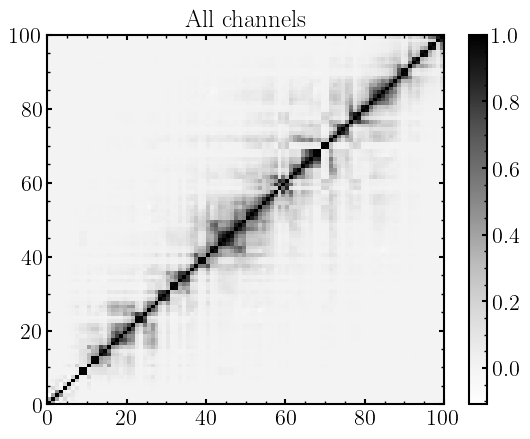

In [ ]:
# # plot the correlation matrix
mat = ssa.wCorrAll()
x = plt.pcolormesh(mat, cmap=plt.cm.Greys)
plt.title("All channels")
plt.colorbar(x)
plt.show()

In [ ]:
# file = f'{datadir_mssa}/G5/traj_LMCH'
# print('File={}'.format(file))
# if os.path.exists(file+"_mssa.h5"):
#     print('Restore file={}'.format(file))
#     # ssa.restoreState(file)
#     # totPow = ssa.getTotPow()
#     # ev = ssa.eigenvalues()
#     # cum = ssa.cumulative()
# else:
#     print('not found')

In [ ]:
# ssa.reconstruct([0,2])
# 

In [ ]:
# totPow = ssa.getTotPow()

In [ ]:
# cum = ssa.cumulative()
# cum

In [ ]:
ev.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

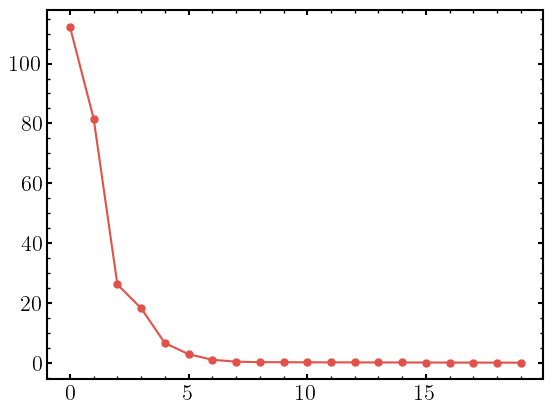

In [ ]:
plt.plot(ev[:20], '.-')
